# **Data Cleaning, Feature Selection, Modeling and Interpretability**

---



# MIT License
Copyright (c) 2023 Naman Gupta

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

# Abstract

Lung cancer is the most common cause of death by cancer globally. The majority of lung cancer cases are expected to be because of smoking. However, there have been many other factors like air possultion, occupational hazards etc, that may affect the health of the patient.

Through this assignment, we will identify which features (factors) that affect the patient's health most and causes lung cancer. The data for this assignment has been taken from Kaggle data sets (https://www.kaggle.com/datasets/thedevastator/cancer-patients-and-air-pollution-a-new-link?sort=published).


# Aim of the excercise
The aim is to develop an entire report which focuses on following:
- Data Cleaning
- Feature Selection
- Modeling
- Interpretability

# Column Description
- Age: The age of the patient. (Numeric)
- Gender: The gender of the patient. (Categorical)
- Air Pollution: The level of air pollution exposure of the patient. (Categorical)
- Alcohol use: The level of alcohol use of the patient. (Categorical)
- Dust Allergy: The level of dust allergy of the patient. (Categorical)
- OccuPational Hazards: The level of occupational hazards of the patient. (Categorical)
- Genetic Risk: The level of genetic risk of the patient. (Categorical)
- chronic Lung Disease: The level of chronic lung disease of the patient. (Categorical)
- Balanced Diet: The level of balanced diet of the patient. (Categorical)
- Obesity: The level of obesity of the patient. (Categorical)
- Smoking: The level of smoking of the patient. (Categorical)
- Passive Smoker: The level of passive smoker of the patient. (Categorical)
- Chest Pain: The level of chest pain of the patient. (Categorical)
- Coughing of Blood: The level of coughing of blood of the patient. (Categorical)
- Fatigue: The level of fatigue of the patient. (Categorical)
- Weight Loss: The level of weight loss of the patient. (Categorical)
- Shortness of Breath: The level of shortness of breath of the patient. (Categorical)
- Wheezing: The level of wheezing of the patient. (Categorical)
- Swallowing Difficulty: The level of swallowing difficulty of the patient. (Categorical)
- Clubbing of Finger Nails: The level of clubbing of finger nails of the patient. (Categorical)

- Level (target): The level of lung cancer extent - Low, Medium, High (Categorical)

# Installing dependencies

In [ ]:
!pip install eli5
!pip install h2o
!pip install fitter
!pip install shap
!pip install fancyimpute
!pip install skfeature-chappers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
import psutil
import warnings
import shap
from fitter import Fitter, get_common_distributions, get_distributions
from fancyimpute import KNN

import matplotlib.pylab as plt
from matplotlib import pyplot
%matplotlib inline
import matplotlib.cbook

from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

from sklearn.inspection import permutation_importance
from sklearn.model_selection import  train_test_split
from sklearn.feature_selection import SelectKBest, chi2, VarianceThreshold
from sklearn.preprocessing import StandardScaler, LabelBinarizer, LabelEncoder, MinMaxScaler, OrdinalEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.impute import KNNImputer
from sklearn import metrics
from skfeature.function.similarity_based import fisher_score
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier

import h2o
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch

In [ ]:
# Reading the data from Kaggle dataset for cancer patient data
data = pd.read_csv('https://raw.githubusercontent.com/namanatnew/DAMG/main/Data/cancer%20patient%20data%20sets.csv',index_col='index')
data.head()
data_copy = data.copy()

# Data Cleaning

In [ ]:
# Cleaning Column Names making them consistent
data.rename(columns=str.lower, inplace=True)
data.rename(columns={col: col.replace(" ", "_") for col in data.columns}, inplace=True)
data.head()

patient_id  age  gender  air_pollution  alcohol_use  dust_allergy  \
index                                                                     
0             P1   33       1              2            4             5   
1            P10   17       1              3            1             5   
2           P100   35       1              4            5             6   
3          P1000   37       1              7            7             7   
4           P101   46       1              6            8             7   

       occupational_hazards  genetic_risk  chronic_lung_disease  \
index                                                             
0                         4             3                     2   
1                         3             4                     2   
2                         5             5                     4   
3                         7             6                     7   
4                         7             7                     6   

       balanced_diet  ...  fatigue  weight_loss  shortness_of_breath  \
index                 ...                                              
0                  2  ...        3            4                    2   
1                  2  ...        1            3                    7   
2                  6  ...        8            7                    9   
3                  7  ...        4            2                    3   
4                  7  ...        3            2                    4   

       wheezing  swallowing_difficulty  clubbing_of_finger_nails  \
index                                                              
0             2                      3                         1   
1             8                      6                         2   
2             2                      1                         4   
3             1                      4                         5   
4             1                      4                         2   

       frequent_cold  dry_cough  snoring   level  
index                                             
0                  2          3        4     Low  
1                  1          7        2  Medium  
2                  6          7        2    High  
3                  6          7        5    High  
4                  4          2        3    High  

[5 rows x 25 columns]

In [ ]:
# the dependent variable is currently not maintained in a numerical form, and needs to be label encoded
data_enc = data.copy()
data_enc['level'] = data_enc['level'].map({'Low':0,'Medium':1,'High':2})
data_enc.head()

patient_id  age  gender  air_pollution  alcohol_use  dust_allergy  \
index                                                                     
0             P1   33       1              2            4             5   
1            P10   17       1              3            1             5   
2           P100   35       1              4            5             6   
3          P1000   37       1              7            7             7   
4           P101   46       1              6            8             7   

       occupational_hazards  genetic_risk  chronic_lung_disease  \
index                                                             
0                         4             3                     2   
1                         3             4                     2   
2                         5             5                     4   
3                         7             6                     7   
4                         7             7                     6   

       balanced_diet  ...  fatigue  weight_loss  shortness_of_breath  \
index                 ...                                              
0                  2  ...        3            4                    2   
1                  2  ...        1            3                    7   
2                  6  ...        8            7                    9   
3                  7  ...        4            2                    3   
4                  7  ...        3            2                    4   

       wheezing  swallowing_difficulty  clubbing_of_finger_nails  \
index                                                              
0             2                      3                         1   
1             8                      6                         2   
2             2                      1                         4   
3             1                      4                         5   
4             1                      4                         2   

       frequent_cold  dry_cough  snoring  level  
index                                            
0                  2          3        4      0  
1                  1          7        2      1  
2                  6          7        2      2  
3                  6          7        5      2  
4                  4          2        3      2  

[5 rows x 25 columns]

Now, the level column is encoded as follows:
- Low : 0
- Medium : 1
- High : 2

# Missing value checks

In [ ]:
# checking percentage of data missing in each column
total = data_enc.isnull().sum().sort_values(ascending=False)
percent = (data_enc.isnull().sum()/data_enc.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

Total  Percent
patient_id                    0      0.0
chest_pain                    0      0.0
snoring                       0      0.0
dry_cough                     0      0.0
frequent_cold                 0      0.0
clubbing_of_finger_nails      0      0.0
swallowing_difficulty         0      0.0
wheezing                      0      0.0
shortness_of_breath           0      0.0
weight_loss                   0      0.0
fatigue                       0      0.0
coughing_of_blood             0      0.0
passive_smoker                0      0.0
age                           0      0.0
smoking                       0      0.0
obesity                       0      0.0
balanced_diet                 0      0.0
chronic_lung_disease          0      0.0
genetic_risk                  0      0.0
occupational_hazards          0      0.0
dust_allergy                  0      0.0
alcohol_use                   0      0.0
air_pollution                 0      0.0
gender                        0      0.0
level                         0      0.0

Data does not have any missing data

# Exploratory Data Analysis

**Numeric:** age    

**Categorical:** gender, air_pollution, alcohol_use, dust_allergy,  occupational_hazards, genetic_risk, chronic_lung_disease,
balanced_diet, obesity, smoking, passive_smoker,
 chest_pain, coughing_of_blood, fatigue, weight_loss,
shortness_of_breath, wheezing, swallowing_difficulty,
clubbing_of_finger_nails, frequent_cold, dry_cough, snoring

In [ ]:
# getting basic infromation of dataset to check the datatypes
print(data_enc.dtypes)

patient_id                  object
age                          int64
gender                       int64
air_pollution                int64
alcohol_use                  int64
dust_allergy                 int64
occupational_hazards         int64
genetic_risk                 int64
chronic_lung_disease         int64
balanced_diet                int64
obesity                      int64
smoking                      int64
passive_smoker               int64
chest_pain                   int64
coughing_of_blood            int64
fatigue                      int64
weight_loss                  int64
shortness_of_breath          int64
wheezing                     int64
swallowing_difficulty        int64
clubbing_of_finger_nails     int64
frequent_cold                int64
dry_cough                    int64
snoring                      int64
level                        int64
dtype: object


In [ ]:
# getting statistical information for every column in dataset using describe() syntax
data_enc.describe()

age       gender  air_pollution  alcohol_use  dust_allergy  \
count  1000.000000  1000.000000      1000.0000  1000.000000   1000.000000   
mean     37.174000     1.402000         3.8400     4.563000      5.165000   
std      12.005493     0.490547         2.0304     2.620477      1.980833   
min      14.000000     1.000000         1.0000     1.000000      1.000000   
25%      27.750000     1.000000         2.0000     2.000000      4.000000   
50%      36.000000     1.000000         3.0000     5.000000      6.000000   
75%      45.000000     2.000000         6.0000     7.000000      7.000000   
max      73.000000     2.000000         8.0000     8.000000      8.000000   

       occupational_hazards  genetic_risk  chronic_lung_disease  \
count           1000.000000   1000.000000           1000.000000   
mean               4.840000      4.580000              4.380000   
std                2.107805      2.126999              1.848518   
min                1.000000      1.000000              1.000000   
25%                3.000000      2.000000              3.000000   
50%                5.000000      5.000000              4.000000   
75%                7.000000      7.000000              6.000000   
max                8.000000      7.000000              7.000000   

       balanced_diet      obesity  ...      fatigue  weight_loss  \
count    1000.000000  1000.000000  ...  1000.000000  1000.000000   
mean        4.491000     4.465000  ...     3.856000     3.855000   
std         2.135528     2.124921  ...     2.244616     2.206546   
min         1.000000     1.000000  ...     1.000000     1.000000   
25%         2.000000     3.000000  ...     2.000000     2.000000   
50%         4.000000     4.000000  ...     3.000000     3.000000   
75%         7.000000     7.000000  ...     5.000000     6.000000   
max         7.000000     7.000000  ...     9.000000     8.000000   

       shortness_of_breath     wheezing  swallowing_difficulty  \
count          1000.000000  1000.000000            1000.000000   
mean              4.240000     3.777000               3.746000   
std               2.285087     2.041921               2.270383   
min               1.000000     1.000000               1.000000   
25%               2.000000     2.000000               2.000000   
50%               4.000000     4.000000               4.000000   
75%               6.000000     5.000000               5.000000   
max               9.000000     8.000000               8.000000   

       clubbing_of_finger_nails  frequent_cold    dry_cough      snoring  \
count               1000.000000    1000.000000  1000.000000  1000.000000   
mean                   3.923000       3.536000     3.853000     2.926000   
std                    2.388048       1.832502     2.039007     1.474686   
min                    1.000000       1.000000     1.000000     1.000000   
25%                    2.000000       2.000000     2.000000     2.000000   
50%                    4.000000       3.000000     4.000000     3.000000   
75%                    5.000000       5.000000     6.000000     4.000000   
max                    9.000000       7.000000     7.000000     7.000000   

             level  
count  1000.000000  
mean      1.062000  
std       0.815365  
min       0.000000  
25%       0.000000  
50%       1.000000  
75%       2.000000  
max       2.000000  

[8 rows x 24 columns]

<Axes: >

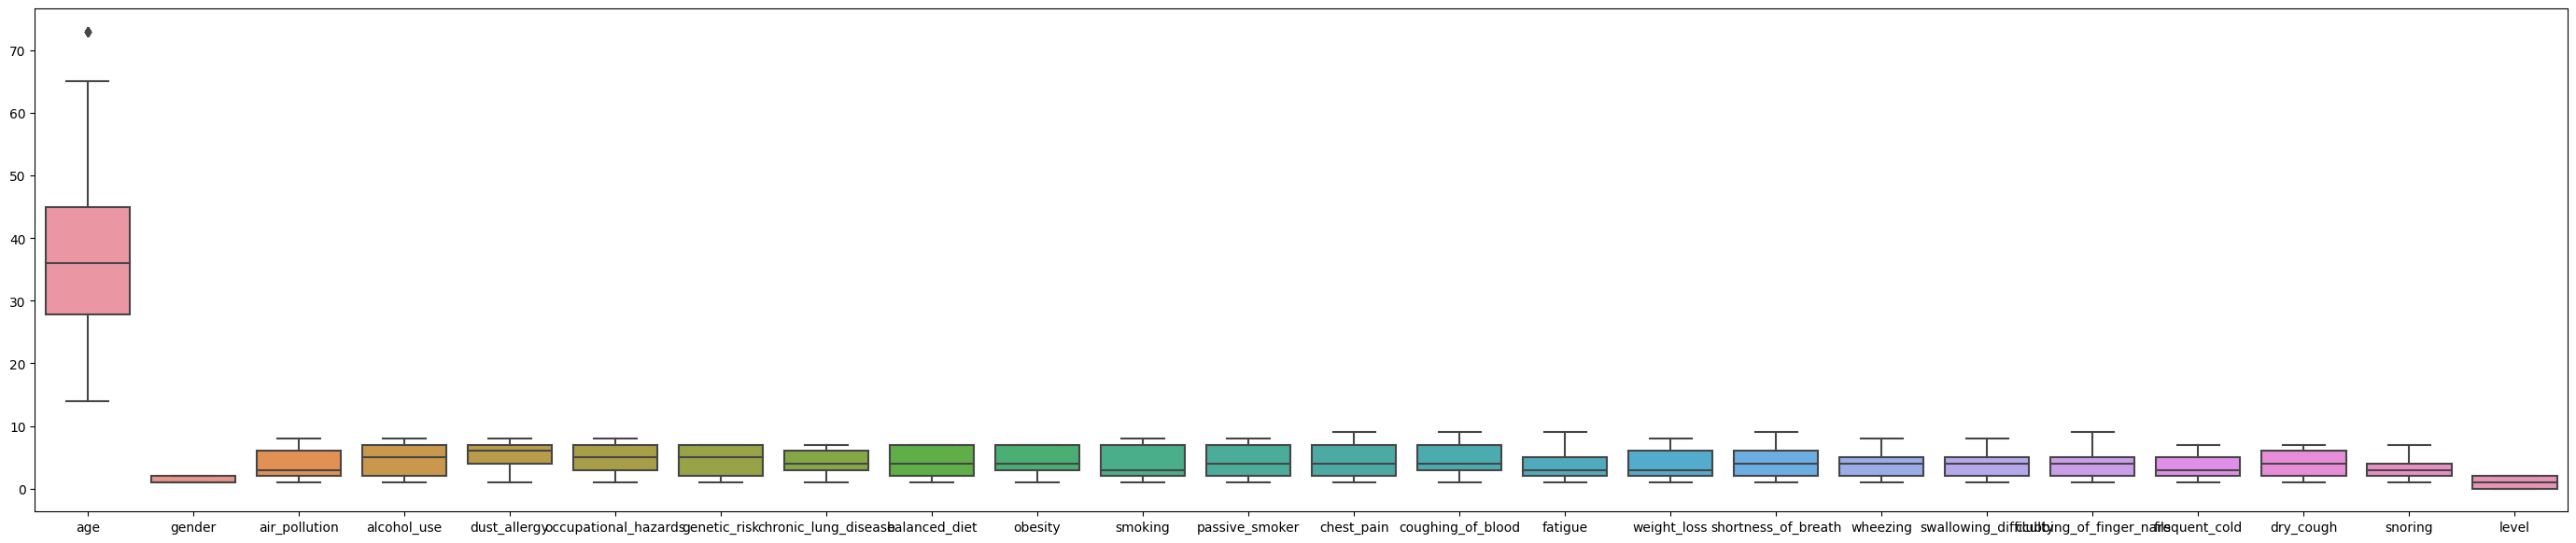

In [ ]:
# checking the range of values of the independent variables and dependent variable
plt.figure(figsize=(35,7))
sns.boxplot(data=data_enc)

1. Most of the independent variables fall in the range of 1 to 10 as it is rating given to understand the extent of exposure
2. In case of gender the range limits to 0 and 1 as the patient in data are defined only with 2 kinds of gender
3. The age of patient is the numerical independent variable and varies between 15 to 65 with few outliers of patient with age around 70. However, it should not be considered as an outlier as it is quite usual for a patient to have an age of 70
4. The dependent variable 'level' is limited to 0, 1 and 2 as it is encoded for three values

<Figure size 800x500 with 0 Axes>

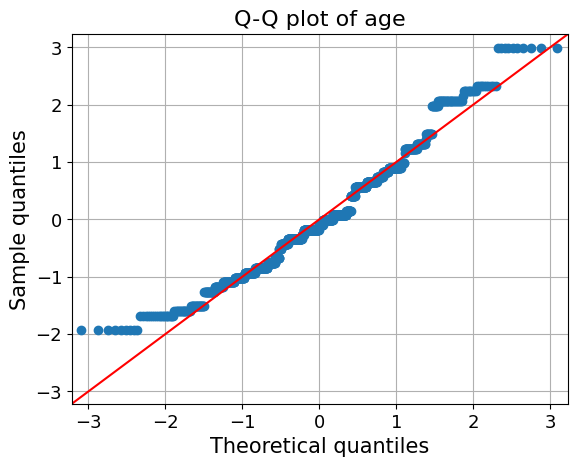

In [ ]:
# checking the distribution of independent variables
data_norm = data_enc[['age']]
for c in data_norm.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_norm[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

According to the QQ plot the data for age variable resembles to Normal distribution. Howerver, we can find the accurate distribution by fitter module.

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  7.44it/s]


          sumsquare_error         aic          bic  kl_div  ks_statistic  \
lognorm          0.070918  901.031096 -9533.259993     inf      0.065130   
gamma            0.070937  899.054484 -9532.997234     inf      0.064802   
chi2             0.070937  899.054551 -9532.997229     inf      0.064802   
rayleigh         0.071274  886.319277 -9535.170045     inf      0.080700   
norm             0.071728  913.997138 -9528.814200     inf      0.110560   

             ks_pvalue  
lognorm   3.936058e-04  
gamma     4.287049e-04  
chi2      4.287087e-04  
rayleigh  4.111489e-06  
norm      4.217366e-11  


Text(0.5, 0, 'age')

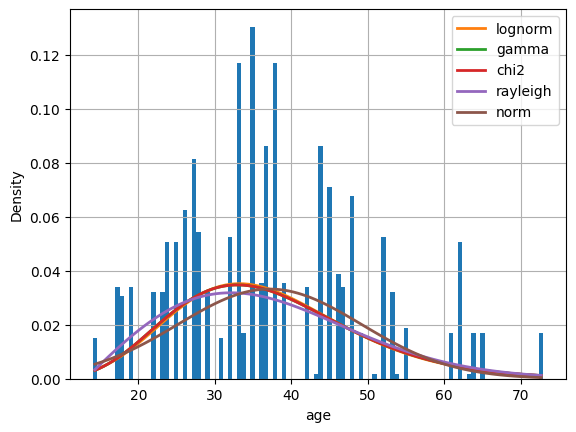

In [ ]:
# Distribution plot for Age
age = data_enc["age"].values
f = Fitter(age, distributions=get_common_distributions())
f.fit()
print(f.summary())
plt.ylabel("Density")
plt.xlabel("age")

The age variable does not follow normal distribution exaclt but shows log normal distribution as the sum square error shows least and p-value as highest for this distribution.

In [ ]:
# Decoding the category columns for EDA
labels = {
    0: "extremely low",
    1: "very low",
    2: "low",
    3: "below medium",
    4: "medium",
    5: "above medium",
    6: "high",
    7: "very high",
    8: "extremely high",
    9: "Maximum"
}
decode_cols = ['air_pollution', 'alcohol_use',
       'dust_allergy', 'occupational_hazards', 'genetic_risk',
       'chronic_lung_disease', 'balanced_diet', 'obesity', 'smoking',
       'passive_smoker', 'chest_pain', 'coughing_of_blood', 'fatigue',
       'weight_loss', 'shortness_of_breath', 'wheezing',
       'swallowing_difficulty', 'clubbing_of_finger_nails', 'frequent_cold',
       'dry_cough', 'snoring']

data_eda = data_enc.copy()

# decoding the categorical values in predictors for EDA purpose
data_eda["gender"] = data["gender"].replace([1,2],["Female","Male"])

for col in decode_cols:
  data_eda[col] = data[col].replace([1,2,3,4,5,6,7,8,9],
                                        [labels[1],labels[2],labels[3],labels[4],
                                         labels[5],labels[6],labels[7],labels[8],labels[9]])


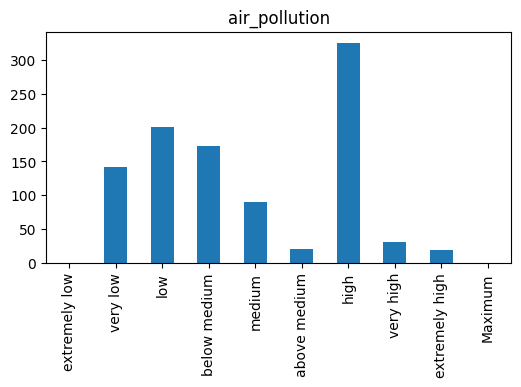

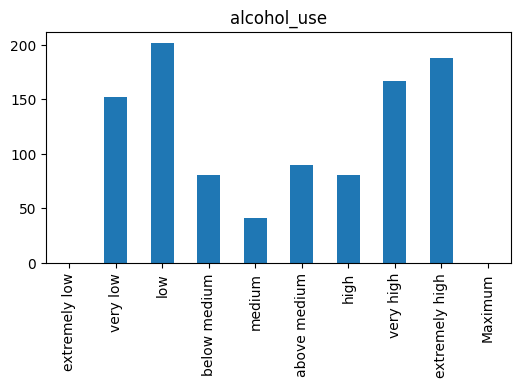

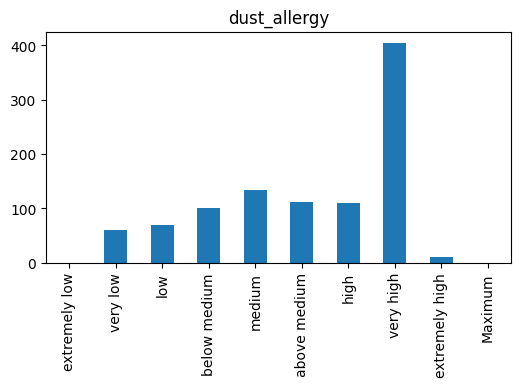

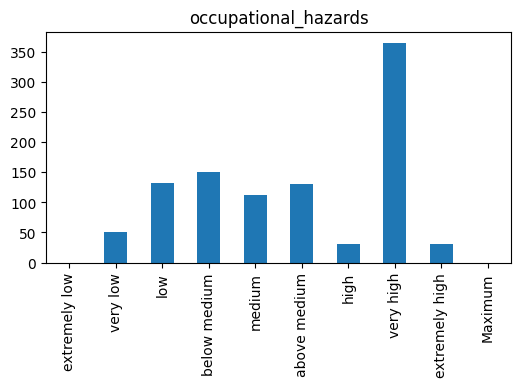

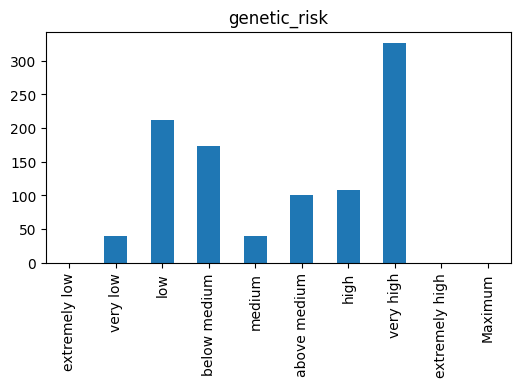

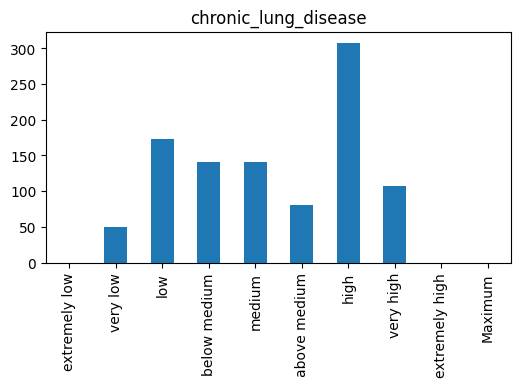

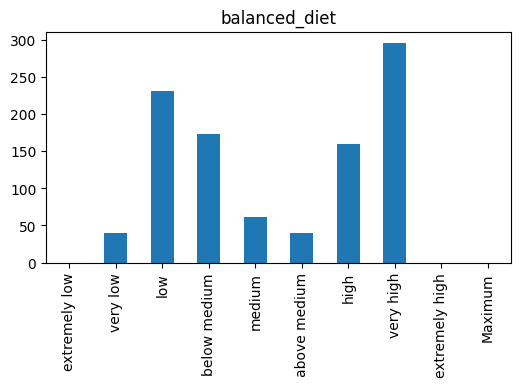

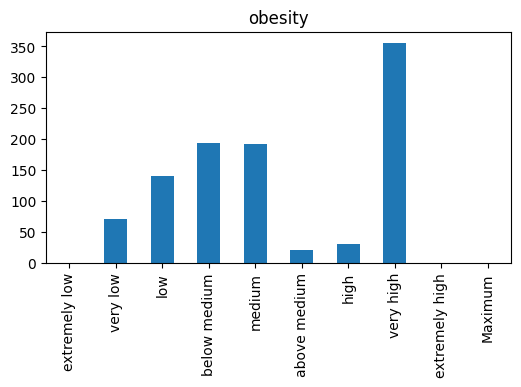

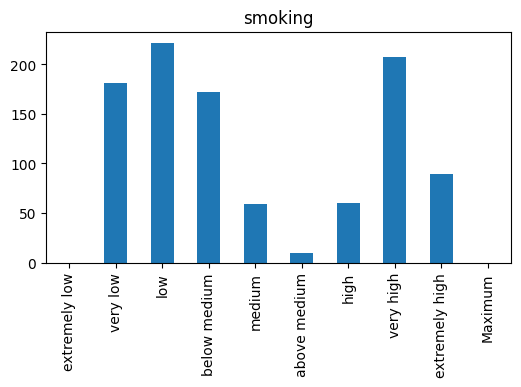

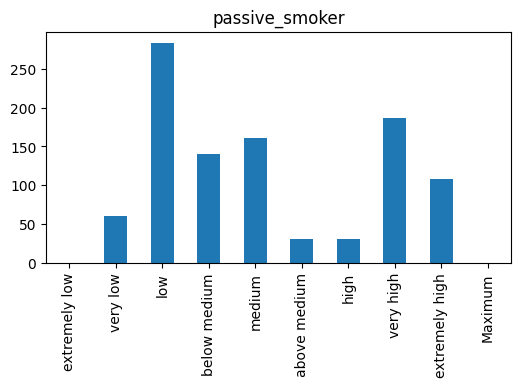

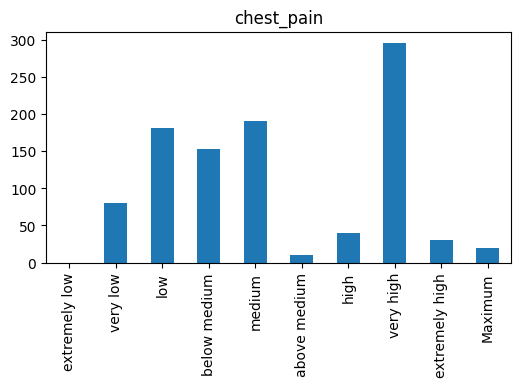

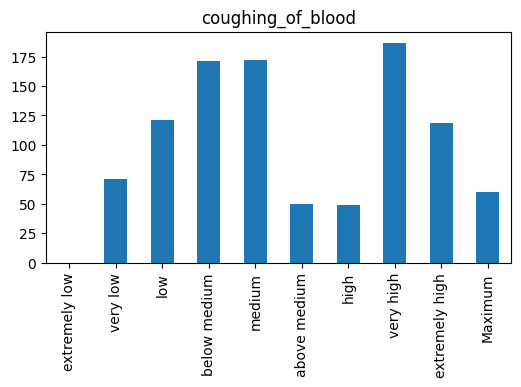

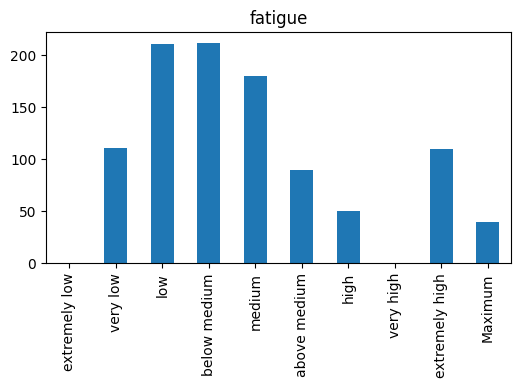

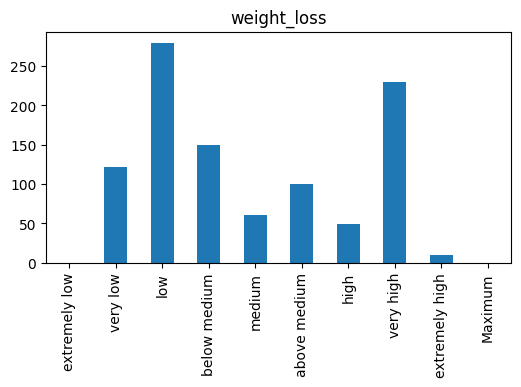

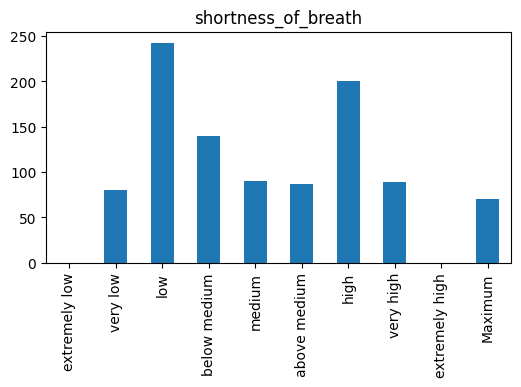

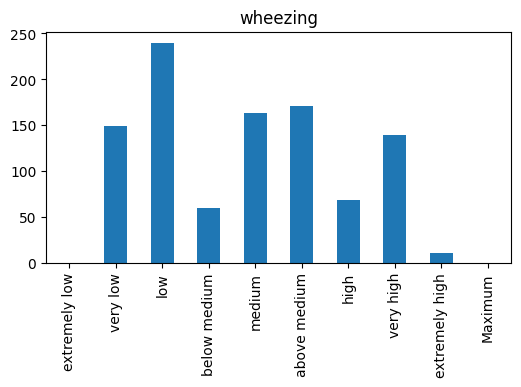

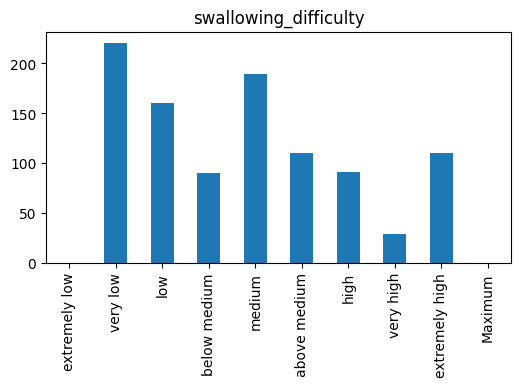

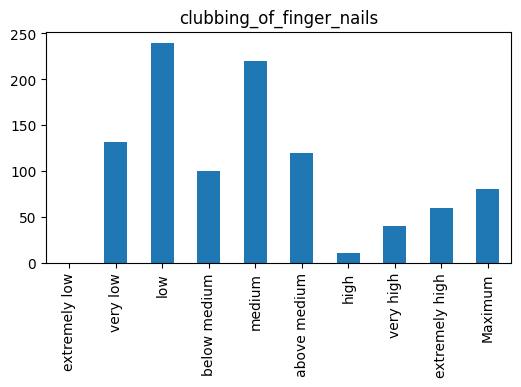

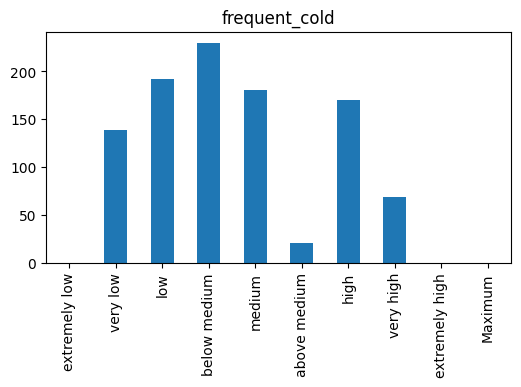

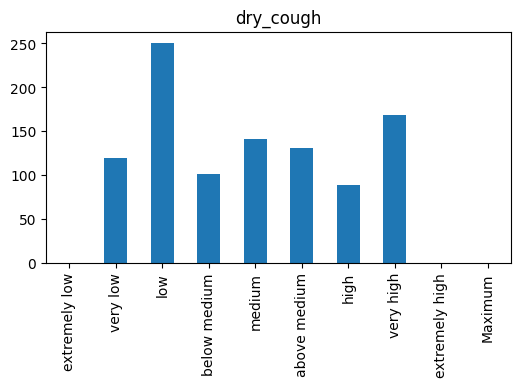

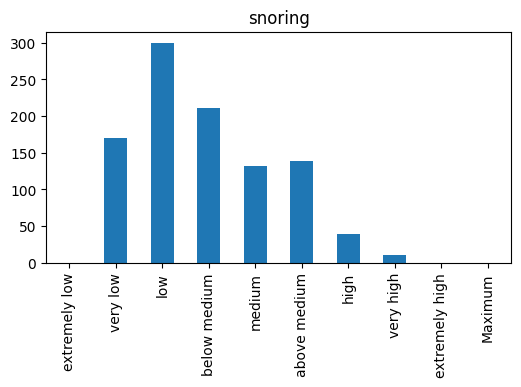

In [ ]:
# Distribution plot for features
for c in decode_cols:
  plt.figure(figsize=(6,3))
  plt.title(c)
  data_eda[c].value_counts().reindex(labels.values(), fill_value=0).plot(kind="bar")
  plt.show()

Now, we would do a correlation check to find out which all predictor variables are related to the target variable

In [ ]:
# Finding the relevant independent variables useful to predict the dependent variable
#checking the correlation between all the features in the data
data_enc.corr()

age    gender  air_pollution  alcohol_use  \
age                       1.000000 -0.202086       0.099494     0.151742   
gender                   -0.202086  1.000000      -0.246912    -0.227636   
air_pollution             0.099494 -0.246912       1.000000     0.747293   
alcohol_use               0.151742 -0.227636       0.747293     1.000000   
dust_allergy              0.035202 -0.204312       0.637503     0.818644   
occupational_hazards      0.062177 -0.192343       0.608924     0.878786   
genetic_risk              0.073151 -0.222727       0.705276     0.877210   
chronic_lung_disease      0.128952 -0.205061       0.626701     0.763576   
balanced_diet             0.004863 -0.099741       0.524873     0.653352   
obesity                   0.034337 -0.123813       0.601468     0.669312   
smoking                   0.075333 -0.206924       0.481902     0.547035   
passive_smoker            0.004908 -0.184826       0.606764     0.592576   
chest_pain                0.012864 -0.218426       0.585734     0.717242   
coughing_of_blood         0.053006 -0.146505       0.607829     0.667612   
fatigue                   0.095059 -0.116467       0.211724     0.237245   
weight_loss               0.106946 -0.057993       0.258016     0.207851   
shortness_of_breath       0.035329 -0.045972       0.269558     0.435785   
wheezing                 -0.095354 -0.076304       0.055368     0.180817   
swallowing_difficulty    -0.105833 -0.058324      -0.080918    -0.114073   
clubbing_of_finger_nails  0.039258 -0.034219       0.241065     0.414992   
frequent_cold            -0.012706 -0.000526       0.174539     0.180778   
dry_cough                 0.012128 -0.123001       0.261489     0.211277   
snoring                  -0.004700 -0.181618      -0.021343     0.122694   
level                     0.060048 -0.164985       0.636038     0.718710   

                          dust_allergy  occupational_hazards  genetic_risk  \
age                           0.035202              0.062177      0.073151   
gender                       -0.204312             -0.192343     -0.222727   
air_pollution                 0.637503              0.608924      0.705276   
alcohol_use                   0.818644              0.878786      0.877210   
dust_allergy                  1.000000              0.835860      0.787904   
occupational_hazards          0.835860              1.000000      0.893049   
genetic_risk                  0.787904              0.893049      1.000000   
chronic_lung_disease          0.619556              0.858284      0.836231   
balanced_diet                 0.647197              0.691509      0.679905   
obesity                       0.700676              0.722191      0.729826   
smoking                       0.358691              0.497693      0.543259   
passive_smoker                0.560002              0.555311      0.609071   
chest_pain                    0.639983              0.775619      0.831751   
coughing_of_blood             0.625291              0.645947      0.632236   
fatigue                       0.332472              0.267844      0.230530   
weight_loss                   0.321756              0.176226      0.271743   
shortness_of_breath           0.518682              0.366482      0.458200   
wheezing                      0.304850              0.178925      0.204973   
swallowing_difficulty         0.031141             -0.002853     -0.062948   
clubbing_of_finger_nails      0.345714              0.366447      0.357815   
frequent_cold                 0.219389              0.077166      0.087092   
dry_cough                     0.300195              0.159887      0.194399   
snoring                       0.052844              0.022916     -0.056831   
level                         0.713839              0.673255      0.701303   

                          chronic_lung_disease  balanced_diet   obesity  ...  \
age                                   0.128952       0.004863  0.034337  ...   
gender             

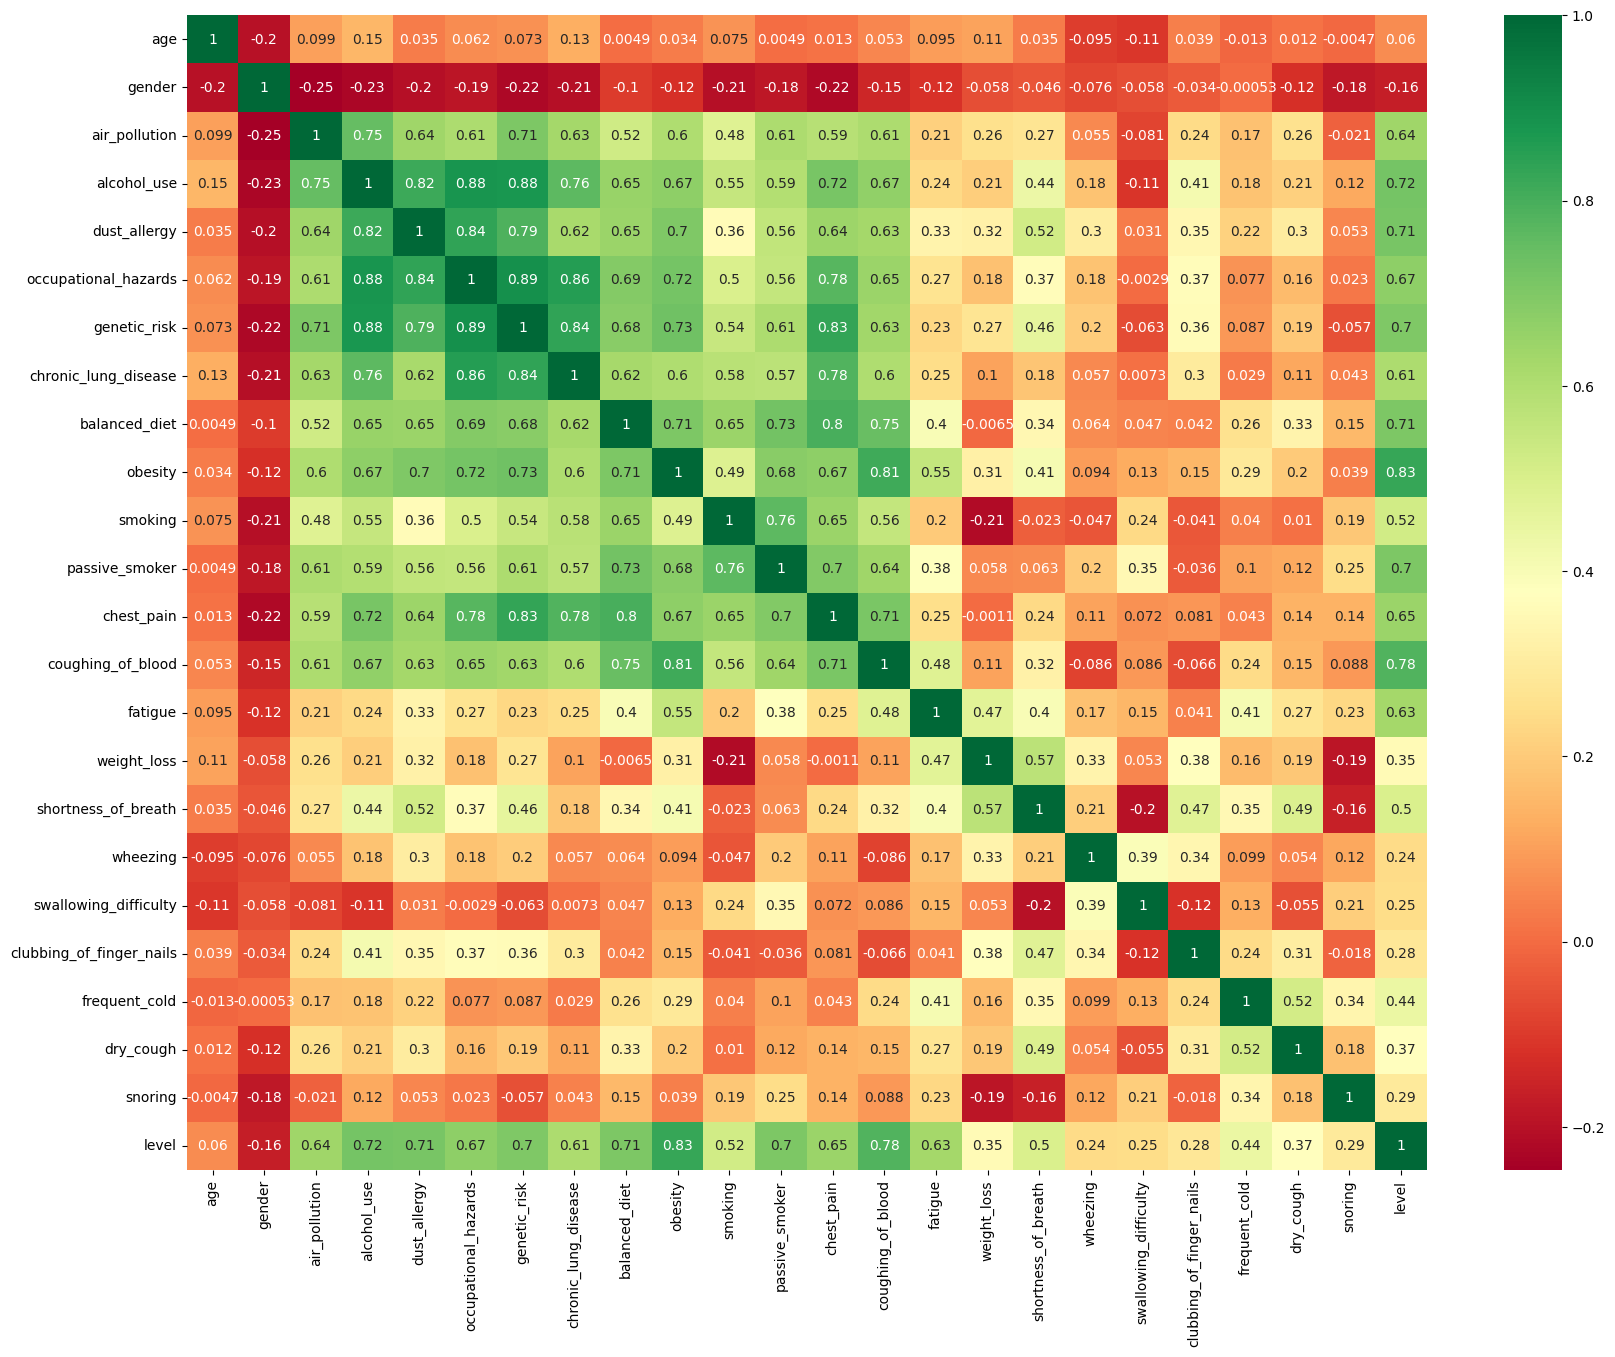

In [ ]:
# building a head map to identify correlation
plt.figure(figsize=(20,15))
sns.heatmap(data_enc.corr(), annot=True, cmap='RdYlGn')
plt.show()

As from th heat map above, we observed the following:
1. The independent variables correlation is highest between genetic risk and occupational hazard
2. The dependent variable is higly correlated with obesity and coughing of blood
3. Gender show negative corrrelation, which mean the chances of cancer are higher in gender '1' than gender '2'
4. Age shows nuetral correlation which mean this does not have any impact on the chances of cancer

Further we need to check for multicollinearity. This means to check if there is any correlation between multiple predictor variables, as this would affect our prediction.

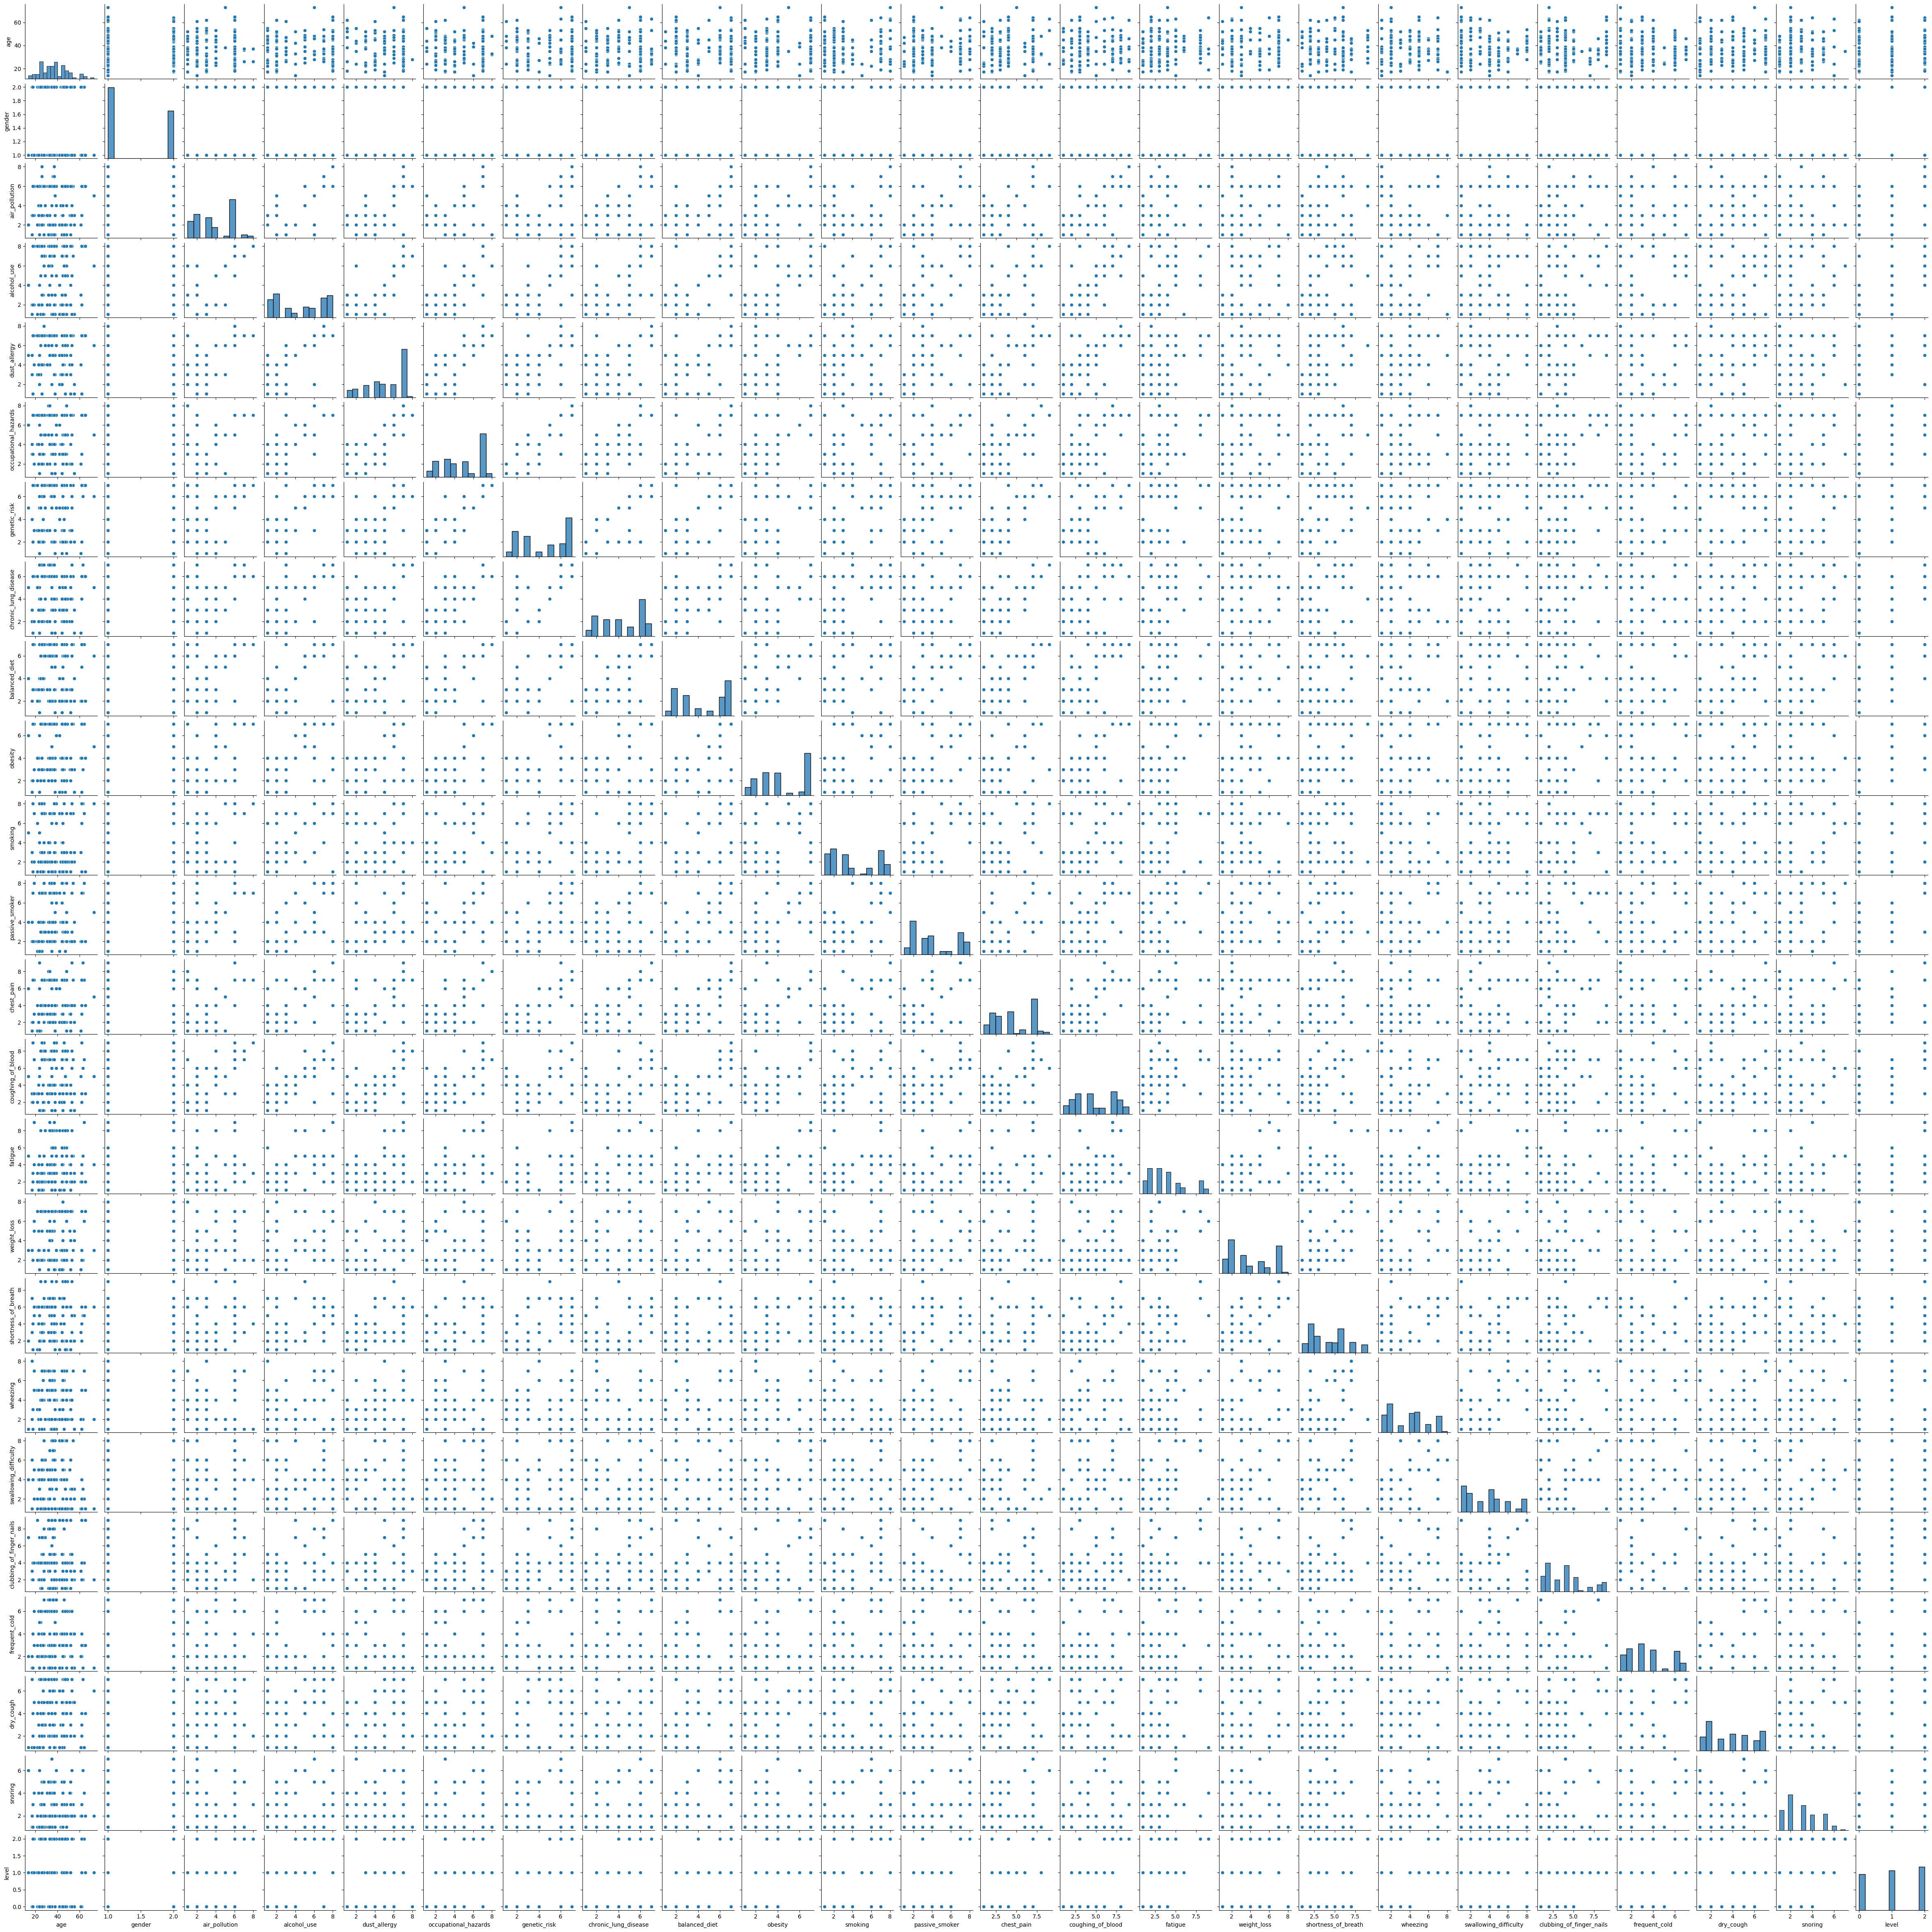

In [ ]:
#pair plot to check the colinearity
sns.pairplot(data_enc, height=2.0)

From the pairplot above, not much correlation can be identified as most of our variables are categorical

Let's check through Variance Inflation Factor (VIF)

In [ ]:
# creating a subset of data with only predictor variables
data_vif = data_enc[['age', 'gender', 'air_pollution', 'alcohol_use', 'dust_allergy',
       'occupational_hazards', 'genetic_risk', 'chronic_lung_disease',
       'balanced_diet', 'obesity', 'smoking', 'passive_smoker', 'chest_pain',
       'coughing_of_blood', 'fatigue', 'weight_loss', 'shortness_of_breath',
       'wheezing', 'swallowing_difficulty', 'clubbing_of_finger_nails',
       'frequent_cold', 'dry_cough', 'snoring']]

# creating an empty dataframe for VIF
vif_data = pd.DataFrame()
vif_data["feature"] = data_vif.columns

# calculating variance inflation factor for each of the predictor variable

vif_data["VIF"] = [variance_inflation_factor(data_vif.values, i)
                          for i in range(len(data_vif.columns))]

print(vif_data)

                     feature         VIF
0                        age    8.878553
1                     gender    7.229196
2              air_pollution   18.730416
3                alcohol_use   53.488354
4               dust_allergy   50.521043
5       occupational_hazards  124.714056
6               genetic_risk  112.607021
7       chronic_lung_disease   58.049623
8              balanced_diet   38.343194
9                    obesity   42.431869
10                   smoking   16.088311
11            passive_smoker   33.806212
12                chest_pain   39.990682
13         coughing_of_blood   38.681090
14                   fatigue   14.379270
15               weight_loss   15.035395
16       shortness_of_breath   20.944738
17                  wheezing   10.630942
18     swallowing_difficulty   11.949525
19  clubbing_of_finger_nails   10.794104
20             frequent_cold   11.774023
21                 dry_cough   10.309063
22                   snoring    8.787071


- Based on the study, a VIF above 4 indicates that multicollinearity may exist, and expecially when VIF is higher than 10 means that significant multicollinearity exists.
- As observed above that many of the predictor variables show VIF higher than 10, hence we can conclude that a strong multicollenearity exists in the data.

As we see that multicollinearity can affect our prediction in various ways:
- create inaccurate estimates of the regression coefficients
- inflate the standard errors of the
regression coefficients
- deflate the partial t-tests for the regression coefficients
- give false, nonsignificant p-values, and degrade the predictability of the model

The easiest approach to reduce multicollinearity would be dropping such columns however, in our case many columns have significant collinearity and dropping would mean loosing lots of training data.

# Handling missing data through Imputation techniques

Although we do not have missing data in this dataset however, let's see some data imputation techniques if we get any missing data in future.

Let's create missing data for the only numeric featrure in out dataset i.e. age. We will be testing the imputation techniques on three scenarios with missing 1%, 5% and 10% of the data and see how each technique perfroms in each scenario.

In [ ]:
# Create additional coloumns from age column for performing Data Imputation techniques at 1%, 5% and 10% missing values
data_imp = data_enc.copy()
data_imp["age_1perc"] = data_imp[["age"]]
data_imp["age_5perc"] = data_imp[["age"]]
data_imp["age_10perc"] = data_imp[["age"]]

data_imp.loc[data_imp.sample(frac=0.01).index, "age_1perc"] = np.nan
data_imp.loc[data_imp.sample(frac=0.05).index, "age_5perc"] = np.nan
data_imp.loc[data_imp.sample(frac=0.10).index, "age_10perc"] = np.nan

In [ ]:
# checking percentage of data missing in each column
total = data_imp.isnull().sum().sort_values(ascending=False)
percent = (data_imp.isnull().sum()/data_imp.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

Total  Percent
age_10perc                  100     0.10
age_5perc                    50     0.05
age_1perc                    10     0.01
age                           0     0.00
level                         0     0.00
snoring                       0     0.00
dry_cough                     0     0.00
frequent_cold                 0     0.00
clubbing_of_finger_nails      0     0.00
swallowing_difficulty         0     0.00
wheezing                      0     0.00
shortness_of_breath           0     0.00
weight_loss                   0     0.00
fatigue                       0     0.00
patient_id                    0     0.00
chest_pain                    0     0.00
passive_smoker                0     0.00
smoking                       0     0.00
obesity                       0     0.00
balanced_diet                 0     0.00
chronic_lung_disease          0     0.00
genetic_risk                  0     0.00
occupational_hazards          0     0.00
dust_allergy                  0     0.00
alcohol_use                   0     0.00
air_pollution                 0     0.00
gender                        0     0.00
coughing_of_blood             0     0.00

In [ ]:
def percentage_change(l1, l2):
    percent_change = abs(l2 - l1) / (l1 + 0.000000001)
    avg_change = (percent_change.sum() / percent_change.count()) * 100
    return avg_change

**Mean Imputation**

In [ ]:
# Imputation through mean method
def imputebymean(train_df):
  train_df_mean = train_df.copy()
  train_df_mean["age_1perc"] = train_df_mean["age_1perc"].fillna(train_df_mean["age"].mean())
  train_df_mean["age_5perc"] = train_df_mean["age_5perc"].fillna(train_df_mean["age"].mean())
  train_df_mean["age_10perc"] = train_df_mean["age_10perc"].fillna(train_df_mean["age"].mean())
  return train_df_mean

data_imp_meanimputed = imputebymean(data_imp)

In [ ]:
# average error percentage for missing data imputed using mean imputation
mean_1perc = percentage_change(data_imp_meanimputed["age"],data_imp_meanimputed["age_1perc"])
mean_5perc = percentage_change(data_imp_meanimputed["age"],data_imp_meanimputed["age_5perc"])
mean_10perc = percentage_change(data_imp_meanimputed["age"],data_imp_meanimputed["age_10perc"])

print(f"""Mean Imputation:\n\tAverage error% for 1% missing data is {mean_1perc}
\tAverage error% for 5% missing data is {mean_5perc}
\tAverage error% for 10% missing data is {mean_10perc}""")

Mean Imputation:
	Average error% for 1% missing data is 0.22323873962522817
	Average error% for 5% missing data is 1.4399824066802
	Average error% for 10% missing data is 3.193477696364275


**KNN Imputation**

In [ ]:
# Imputation through knn method
data_imp = data_imp.drop(['patient_id'],axis=1)
def imputebyknn(train_df):
  train_df_knn = train_df.copy()
  scaler = MinMaxScaler()
  train_df_knn_norm = pd.DataFrame(scaler.fit_transform(train_df_knn), columns = train_df_knn.columns)

  imputer = KNNImputer(n_neighbors=5)
  imputed_data = imputer.fit_transform(train_df_knn_norm)  # impute all the missing data
  df_temp = pd.DataFrame(imputed_data)
  df_temp.columns = train_df_knn.columns
  train_df_knn_norm['age_1perc'] = df_temp['age_1perc'].copy()
  train_df_knn_norm['age_5perc'] = df_temp['age_5perc'].copy()
  train_df_knn_norm['age_10perc'] = df_temp['age_10perc'].copy()
  return train_df_knn_norm

data_imp_knnimputed = imputebyknn(data_imp)

In [ ]:
# average error percentage for missing data imputed using knn imputation
knn_1perc = percentage_change(data_imp_knnimputed["age"],data_imp_knnimputed["age_1perc"])
knn_5perc = percentage_change(data_imp_knnimputed["age"],data_imp_knnimputed["age_5perc"])
knn_10perc = percentage_change(data_imp_knnimputed["age"],data_imp_knnimputed["age_10perc"])

print(f"""KNN Imputation:\n\tAverage error% for 1% missing data is {knn_1perc}
\tAverage error% for 5% missing data is {knn_5perc}
\tAverage error% for 10% missing data is {knn_10perc}""")

KNN Imputation:
	Average error% for 1% missing data is 1.3100631675118103e-17
	Average error% for 5% missing data is 0.15666666578603702
	Average error% for 10% missing data is 0.029047178468894857


**Mode Imputation**

In [ ]:
# Imputation through mode method
def imputebymode(train_df):
  train_df["age_1perc"] = train_df["age_1perc"].fillna(train_df["age"].mode()[0])
  train_df["age_5perc"] = train_df["age_5perc"].fillna(train_df["age"].mode()[0])
  train_df["age_10perc"] = train_df["age_10perc"].fillna(train_df["age"].mode()[0])
  return train_df

data_imp_modeimputed = imputebymode(data_imp)

In [ ]:
# average error percentage for missing data imputed using mode imputation
mode_1perc = percentage_change(data_imp_modeimputed["age"],data_imp_modeimputed["age_1perc"])
mode_5perc = percentage_change(data_imp_modeimputed["age"],data_imp_modeimputed["age_5perc"])
mode_10perc = percentage_change(data_imp_modeimputed["age"],data_imp_modeimputed["age_10perc"])

print(f"""Mode Imputation:\n\tAverage error% for 1% missing data is {mode_1perc}
\tAverage error% for 5% missing data is {mode_5perc}
\tAverage error% for 10% missing data is {mode_10perc}""")

Mode Imputation:
	Average error% for 1% missing data is 0.20404255956109718
	Average error% for 5% missing data is 1.340531246522585
	Average error% for 10% missing data is 2.984695101664976


We have used three methods of imputation as follows:

- Mean Imputation
- KNN Imputation
- Mode Imputation     

Based on the % error of residual above, KNN gives us the best imputation results from the three methods used.

# Feature Importance and Selection
Here, we are finding the most significant predictors for target prediction through various methods

**Ordinary least squares regression**   
We will be calculating the p-value for each predictor variable in terms of the relation with target variable. If the p-value turns out to be higher than the significance value (i.e. 0.05 or 5%) then the predictor is classified as the significant one.

In [ ]:
# Using Ordinary least squares regression method to check the significance of predictors
data_enc = data_enc.drop(['patient_id'],axis=1)
model = sm.OLS(data_enc['level'], data_enc[['age', 'gender', 'air_pollution', 'alcohol_use',
                                            'dust_allergy','occupational_hazards', 'genetic_risk',
                                            'chronic_lung_disease', 'balanced_diet', 'obesity',
                                            'smoking', 'passive_smoker', 'chest_pain',
                                            'coughing_of_blood', 'fatigue', 'weight_loss',
                                            'shortness_of_breath', 'wheezing',
                                            'swallowing_difficulty', 'clubbing_of_finger_nails',
                                            'frequent_cold', 'dry_cough', 'snoring']]).fit()

# Print out the statistics
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  level   R-squared (uncentered):                   0.949
Model:                            OLS   Adj. R-squared (uncentered):              0.948
Method:                 Least Squares   F-statistic:                              792.4
Date:                Mon, 10 Apr 2023   Prob (F-statistic):                        0.00
Time:                        01:42:03   Log-Likelihood:                         -221.44
No. Observations:                1000   AIC:                                      488.9
Df Residuals:                     977   BIC:                                      601.8
Df Model:                          23                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

The Predictor-Target relationship is stattistically significant as the p-value for many of the predictor variables comes higher than the significance level (i.e. 0.05). We have observed that air_pollution, dry_cough, and chronic_lung_disease predictor variables show strong relationship with the target variable

**Chi-square Test**    
We use this statistical method for feature selection especially for the categorical feartures in the data. We calculate Chi-square between each feature and the target variable and select the desired number of features with best Chi-square scores.

In [ ]:
# preparing predictor and target data for chi square test
X_cat = data.drop(['patient_id','level'],axis=1).astype(int)
Y_cat = data.level

# checking the feature importance for top 5 features
chi2_features = SelectKBest(chi2, k=5)
best_features = chi2_features.fit_transform(X_cat, Y_cat)

print(f'Original shape: {X_cat.shape}')
print(f'\nReduced feature shape: {best_features.shape}')

print('\n',list(X_cat.columns))
print('\n',list(chi2_features.get_support()))

Original shape: (1000, 23)

Reduced feature shape: (1000, 5)

 ['age', 'gender', 'air_pollution', 'alcohol_use', 'dust_allergy', 'occupational_hazards', 'genetic_risk', 'chronic_lung_disease', 'balanced_diet', 'obesity', 'smoking', 'passive_smoker', 'chest_pain', 'coughing_of_blood', 'fatigue', 'weight_loss', 'shortness_of_breath', 'wheezing', 'swallowing_difficulty', 'clubbing_of_finger_nails', 'frequent_cold', 'dry_cough', 'snoring']

 [False, False, False, True, False, False, False, False, False, True, True, True, False, True, False, False, False, False, False, False, False, False, False]


As per the chi-square test, the five most relevant features are:
1. alcohol_use
2. obesity
3. smoking
4. passive_smoker
5. coughing_of_blood

**Fisher's Score**    
This provides the ranking of features based the fisher's score. Based on the ranking we can then select the most important features and ignore the least important ones

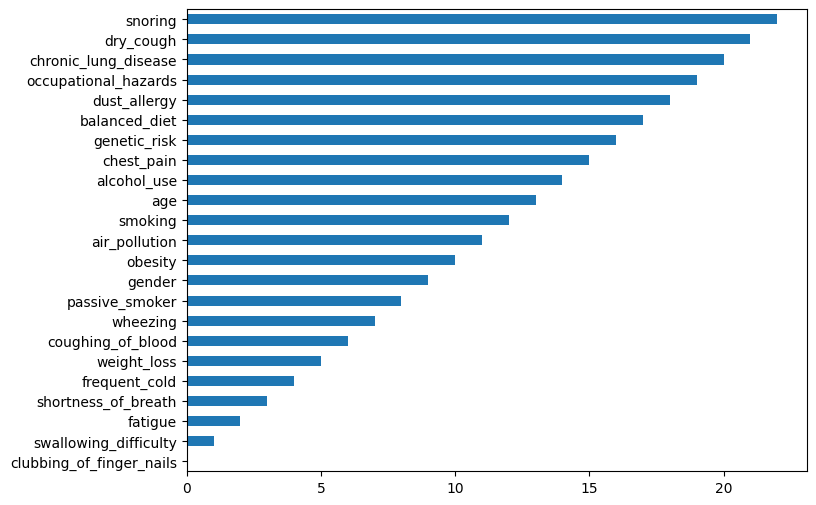

In [ ]:
# calculate scores
ranks = fisher_score.fisher_score(X_cat.values,Y_cat.values)
# plot the ranks
feature_imp = pd.Series(ranks,X_cat.columns).sort_values()
plt.figure(figsize = (8,6))
feature_imp.plot(kind='barh')
plt.show()

As per the fisher's score, following is the ranking of importance of features:

1. snoring
2. dry_cough                   
3. chronic_lung_disease        
4. occupational_hazards        
5. dust_allergy

**Variance Threshold**    
This stastical method removes all the features if there exist any with variance 0 by default, which means that the feature variable basically contains only one value for all records

In [ ]:
print(data_enc.shape)
var_th = VarianceThreshold(threshold = 0)
X_train_remove_variance = var_th.fit_transform(data_enc)
print(X_train_remove_variance.shape)

print(list(data_enc.columns))
print(var_th.get_support())

(1000, 24)
(1000, 24)
['age', 'gender', 'air_pollution', 'alcohol_use', 'dust_allergy', 'occupational_hazards', 'genetic_risk', 'chronic_lung_disease', 'balanced_diet', 'obesity', 'smoking', 'passive_smoker', 'chest_pain', 'coughing_of_blood', 'fatigue', 'weight_loss', 'shortness_of_breath', 'wheezing', 'swallowing_difficulty', 'clubbing_of_finger_nails', 'frequent_cold', 'dry_cough', 'snoring', 'level']
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True]


There is not feature with zero variance, hence, no feature is removed from the dataset

# Train-Test data split    
We split the dataset into train and test data with an 80:20 ratio. After splitting, we will use 80% of the data to train the learning model and then perfrom prediction. After perfroming prediction on test data, we use original target values in test dataset to calculate the accuracy of prediction model being used.

In [ ]:
# splitting data into target data and features data
target_var = ['level']
# X_exclude_var = ['patient_id','level']
dataY = data_enc.level
dataX = data_enc.drop(target_var,axis=1)

#Spliting data into Training 80% and Test set 20%
X_train, X_test, y_train, y_test = train_test_split(dataX, dataY, test_size=0.2, random_state=40)

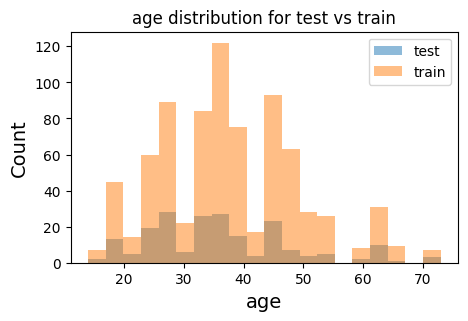

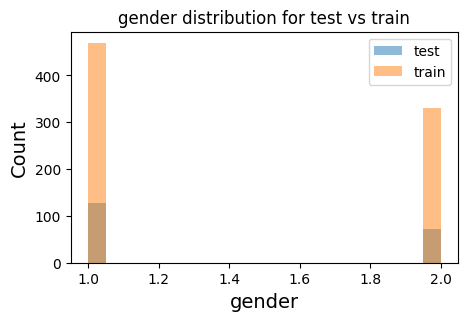

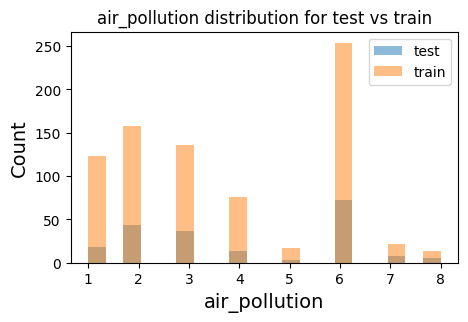

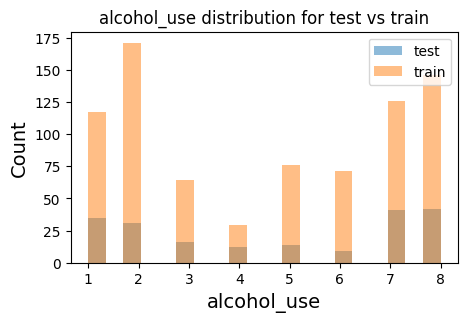

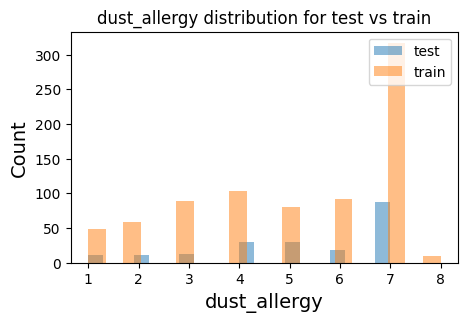

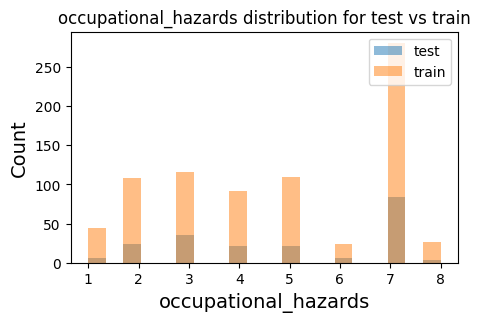

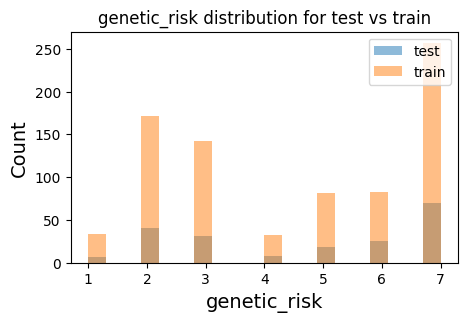

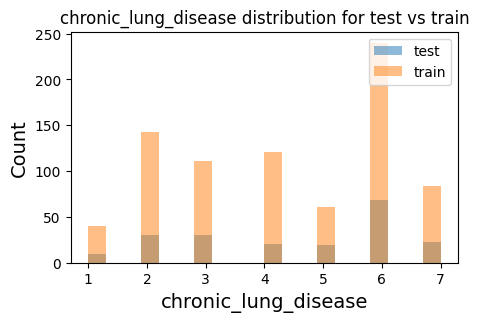

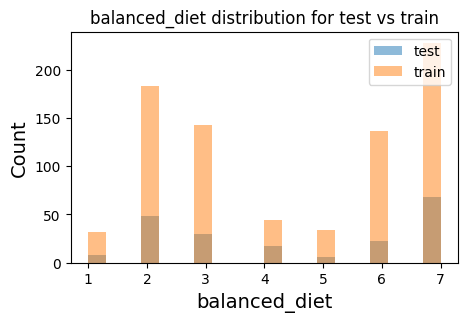

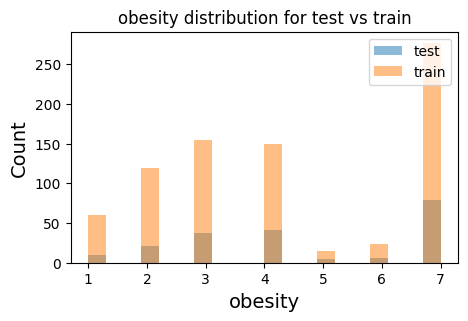

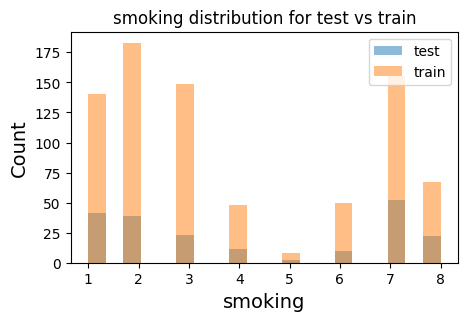

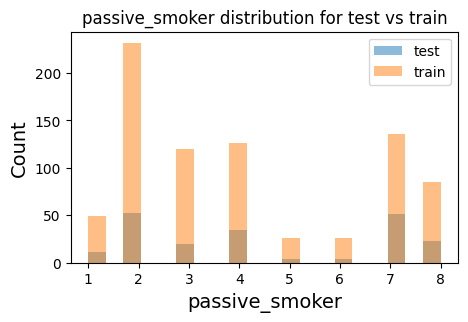

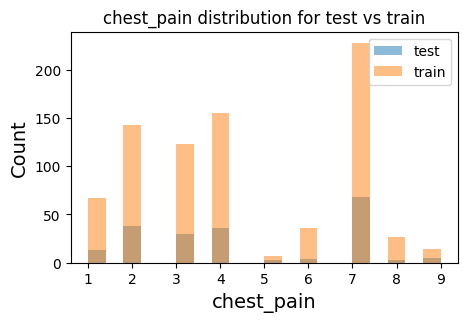

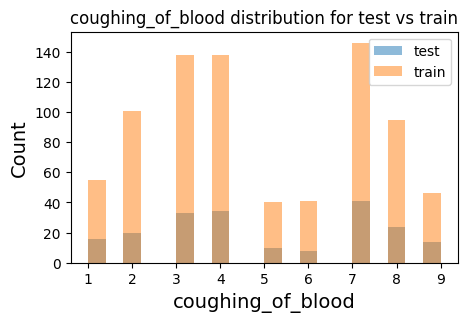

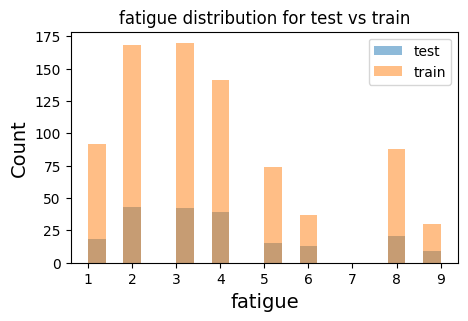

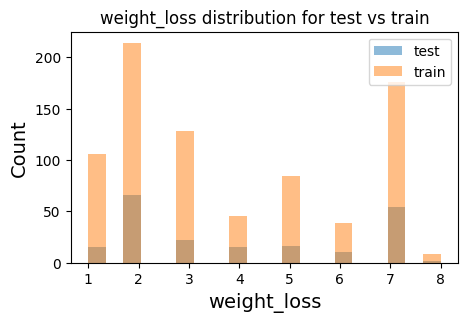

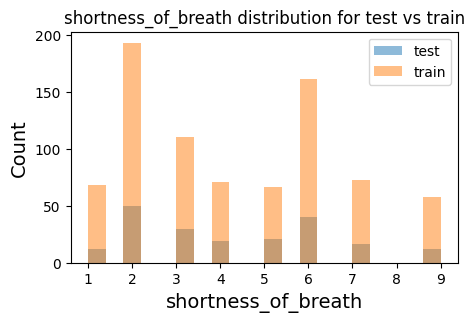

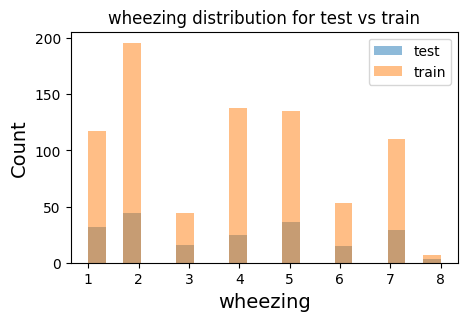

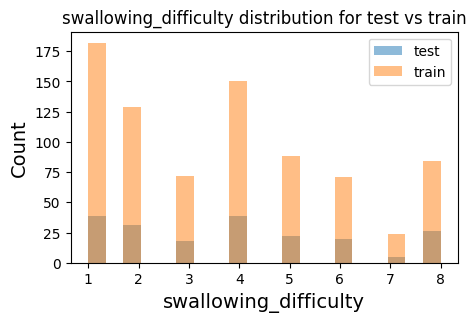

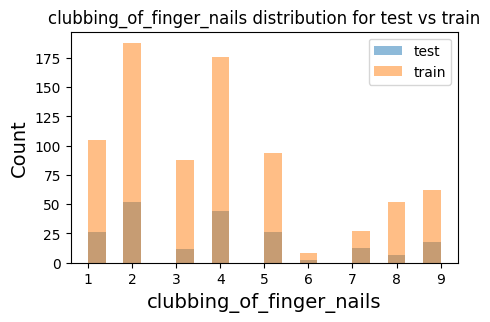

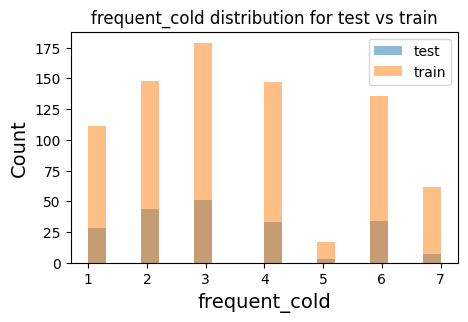

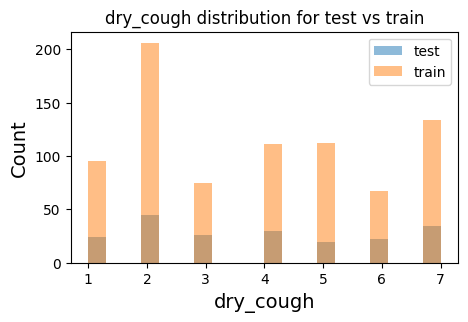

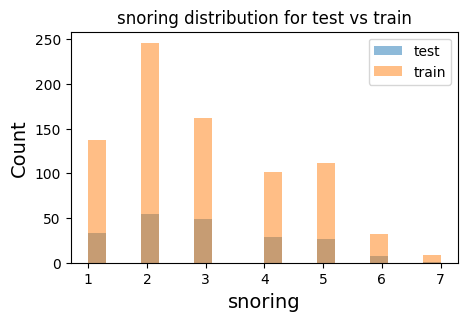

In [ ]:
X_cols = ['age', 'gender', 'air_pollution', 'alcohol_use',
       'dust_allergy', 'occupational_hazards', 'genetic_risk',
       'chronic_lung_disease', 'balanced_diet', 'obesity', 'smoking',
       'passive_smoker', 'chest_pain', 'coughing_of_blood', 'fatigue',
       'weight_loss', 'shortness_of_breath', 'wheezing',
       'swallowing_difficulty', 'clubbing_of_finger_nails', 'frequent_cold',
       'dry_cough', 'snoring']

X_test_plot = X_test[X_cols]
X_train_plot = X_train[X_cols]

# Plotting the data to see the histogram
for c in X_test_plot.columns[:]:
  plt.figure(figsize=(5,3))
  plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
  plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
  plt.xlabel(c, size=14)
  plt.ylabel("Count", size=14)
  plt.legend(loc='upper right')
  plt.title("{} distribution for test vs train".format(c))
  plt.show()

Train and test data has been splitted at 80:20 ratio from the dataset. Based on the histogram charts below, we can conclude that the split is done well and data is distributed consistently.

# Fitting a Linear Model

Logistic Regression is a classification and predictive analytics model, which estimates the probability of an event occurring based on a given dataset of independent variables. To perfrom the model fitting, we split our data into train and test data.
We are using "liblinear" solver here, as according to the documentation this solver is specifically designed for logistic regression with L1 and L2 regularization. It is recommended for smaller data sets.

In [ ]:
# checking if the data is balanced before prediction
total = data_enc['level'].count()
data_enc['level'].value_counts()/total

2    0.365
1    0.332
0    0.303
Name: level, dtype: float64

Based on the results, above it looks like data is balanced as all the three classifications of target contain aprroximately equal amount of data.

In [ ]:
# fitting the data for logistic regression
lr = LogisticRegression(solver = 'liblinear')
lr.fit(X_train , y_train)

LogisticRegression(solver='liblinear')

In [ ]:
lr.score(X_test, y_test)

0.985

The model is fit now with predictor and target training data, let's start predicting for test data now.

In [ ]:
# predicting target variable for pridictor test data through logistic regression
y_linearpred = lr.predict(X_test)

# Fit a tree-based model

We are using random forest classifier for this fit which is an ensemble tree-based learning algorithm. The random forest classifier is a set of decision trees from a randomly selected subset of the training set. It aggregates the votes from different decision trees to decide the final class of the test object.

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
rfc.score(X_train,y_train)

1.0

In [ ]:
y_rfcpred = rfc.predict(X_test)

# Initializing AutoML by H2O.ai

In [ ]:
# Setting up maximum runtime for the AutoML
min_mem_size = 6
run_time = 222

In [ ]:
pct_memory = 0.5
virtual_memory = psutil.virtual_memory()
min_mem_size = int(round(int(pct_memory * virtual_memory.available) / 1073741824, 0))
print(min_mem_size)

3


In [ ]:
# Start the H2O server on a random port
port_no = random.randint(5555, 55555)
try:
    h2o.init(
        strict_version_check=False, min_mem_size_GB=min_mem_size, port=port_no
    )  # start h2o
except:
    logging.critical("h2o.init")
    h2o.download_all_logs(dirname=logs_path, filename=logfile)
    h2o.cluster().shutdown()
    sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:20013..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.18" 2023-01-17; OpenJDK Runtime Environment (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1); OpenJDK 64-Bit Server VM (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.9/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp2gf1f_u5
  JVM stdout: /tmp/tmp2gf1f_u5/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp2gf1f_u5/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:20013
Connecting to H2O server at http://127.0.0.1:20013 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         03 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.40.0.3
H2O_cluster_version_age:    5 days
H2O_cluster_name:           H2O_from_python_unknownUser_vlzwh3
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.172 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:20013
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.9.16 final
--------------------------  -----------------------------------------------------------------------------------------

In [ ]:
# Converted Pandas Dataframe to H2O dataframe to proceed with AutoML
data_h20 = h2o.H2OFrame(data_enc)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
# Setting up the data split between training and test dataset
pct_rows = 0.80
data_train, data_test = data_h20.split_frame([pct_rows])

In [ ]:
# setting predictor and target data
y = 'level'
X = data_h20.columns
X.remove(y)
print(f'Target:{y}\nPredictor:{X}')

Target:level
Predictor:['age', 'gender', 'air_pollution', 'alcohol_use', 'dust_allergy', 'occupational_hazards', 'genetic_risk', 'chronic_lung_disease', 'balanced_diet', 'obesity', 'smoking', 'passive_smoker', 'chest_pain', 'coughing_of_blood', 'fatigue', 'weight_loss', 'shortness_of_breath', 'wheezing', 'swallowing_difficulty', 'clubbing_of_finger_nails', 'frequent_cold', 'dry_cough', 'snoring']


In [ ]:
# Initializing AutoML
automl = H2OAutoML(max_models=10, max_runtime_secs=run_time, seed=1)

In [ ]:
# Training the train data on various models
aml = automl.train(x=X, y=y, training_frame=data_train)
aml

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_3_AutoML_1_20230410_20241


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    204                204                         91573                  5            8            7.95098       9             43            30.9118

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 2.3151665645423502e-06
RMSE: 0.0015215671409906136
MAE: 0.0002914039270272912
RMSLE: 0.001119356981070636
Mean Residual Deviance: 2.3151665645423502e-06

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 1.653413529560468e-06
RMSE: 0.0012858512859426894
MAE: 0.0003549476208624491
RMSLE: 0.0010285284527708596
Mean Residual Deviance: 1.653413529560468e-06

Cross-Validation Metrics Summary: 
                        mean         sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  -----------  -----------  ------------  ------------  ------------  ------------  ------------
mae                     0.000353283  0.000178624  0.000410344   0.000553361   0.000450261   0.000254438   9.80101e-05
mean_residual_deviance  1.65213e-06  1.3448e-06   1.77043e-06   3.13956e-06   2.77415e-06   4.07192e-07   1.69332e-07
mse                     1.65213e-06  1.3448e-06   1.77043e-06   3.13956e-06   2.77415e-06   4.07192e-07   1.69332e-07
r2                      0.999997     2.05128e-06  0.999997      0.999995      0.999996      0.999999      1
residual_deviance       1.65213e-06  1.3448e-06   1.77043e-06   3.13956e-06   2.77415e-06   4.07192e-07   1.69332e-07
rmse                    0.00116353   0.000610667  0.00133057    0.00177188    0.00166558    0.000638116   0.0004115
rmsle                   0.000905594  0.000544289  0.00119528    0.00105762    0.00157586    0.000421858   0.000277338

Scoring History: 
     timestamp            duration    number_of_trees    training_rmse          training_mae            training_deviance
---  -------------------  ----------  -----------------  ---------------------  ----------------------  ----------------------
     2023-04-10 02:03:42  6.529 sec   0.0                0.8199176231365127     0.689453013470043       0.6722649087298286
     2023-04-10 02:03:42  6.546 sec   5.0                0.4898775973291813     0.4126643741911545      0.23998006036501152
     2023-04-10 02:03:42  6.564 sec   10.0               0.2964630251349717     0.25156266221621776     0.08789032527217885
     2023-04-10 02:03:42  6.584 sec   15.0               0.178935917947449      0.1514692643765238      0.032018062731696204
     2023-04-10 02:03:42  6.603 sec   20.0               0.10752032274316425    0.09125215166086514     0.011560619802794204
     2023-04-10 02:03:42  6.623 sec   25.0               0.06523758837505168    0.05513426933615874     0.004255942936992679
     2023-04-10 02:03:42  6.642 sec   30.0               0.040002957895542375   0.03355401650690462     0.001600236640392536
     2023-04-10 02:03:42  6.661 sec   35.0               0.025200553983560234   0.020575006602693263    0.0006350679210783336
     2023-04-10 02:03:42  6.681 sec   40.0               0.016650395257515216   0.012969688630266402    0.0002772356622314852
     2023-04-10 02:03:42  6.702 sec   45.0               0.011647623680497213   0.008404602887524147    0.00013566713740247946
---  ---                  ---         ---                ---                    ---                     ---
     2023-04-10 02:03:43  7.197 sec   160.0              0.0018600082589177152  0.0003771040180634496   3.4596307232421104e-06
     2023-04-10 02:03:43  7.217 sec   165.0              0.0018103306952571765  0.00035274014327877734  3.27729

In [ ]:
# View the AutoML Leaderboard
print(automl.leaderboard)

model_id                                                      rmse          mse          mae       rmsle    mean_residual_deviance
GBM_3_AutoML_1_20230410_20241                           0.00128585  1.65341e-06  0.000354948  0.00102853               1.65341e-06
GBM_4_AutoML_1_20230410_20241                           0.00157578  2.48308e-06  0.000394091  0.0012166                2.48308e-06
StackedEnsemble_BestOfFamily_1_AutoML_1_20230410_20241  0.00197064  3.88342e-06  0.00119477   0.00131303               3.88342e-06
StackedEnsemble_AllModels_1_AutoML_1_20230410_20241     0.00198515  3.9408e-06   0.000801245  0.00144863               3.9408e-06
XGBoost_3_AutoML_1_20230410_20241                       0.00213276  4.54867e-06  0.000261549  0.00108606               4.54867e-06
GBM_2_AutoML_1_20230410_20241                           0.00287176  8.24699e-06  0.000460358  0.00151267               8.24699e-06
DRF_1_AutoML_1_20230410_20241                           0.0033353   1.11242e-05  0.0

In [ ]:
best_model = automl.leader
best_model.model_performance(data_test)

ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 6.360828458437431e-05
RMSE: 0.007975480210267862
MAE: 0.001011875004703701
RMSLE: 0.004294622464139456
Mean Residual Deviance: 6.360828458437431e-05

In [ ]:
y_amlpred = automl.leader.predict(data_test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


# Hyperparameter Tuning of AutoML's Best Model

In [ ]:
from h2o.grid.grid_search import H2OGridSearch

In [ ]:
automl.leader.algo

'gbm'

In [ ]:
# define the hyperparameters to be tuned
hyper_params = {'learn_rate': [0.1, 0.01, 0.001],
                'max_depth': [5, 10, 15, 20],
                'sample_rate': [0.2, 0.4, 0.8, 0.9, 1.0]}

# create a grid search object with the hyperparameters and train it on the data
grid = h2o.grid.H2OGridSearch(model=best_model, hyper_params=hyper_params)
grid.train(y=y, training_frame=data_train)

# get the best model selected by grid search
best_gbm = grid.get_grid()[0]

gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


In [ ]:
best_gbm

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: Grid_GBM_py_14_sid_9f1c_model_python_1681092147713_13_model_46


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          21597                  4            14           8.84          12            49            29.64

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 4.310479590331062e-05
RMSE: 0.006565424274432736
MAE: 0.004690511116373261
RMSLE: 0.003875649522118458
Mean Residual Deviance: 4.310479590331062e-05

Scoring History: 
     timestamp            duration    number_of_trees    training_rmse         training_mae          training_deviance
---  -------------------  ----------  -----------------  --------------------  --------------------  ----------------------
     2023-04-10 02:04:56  13.657 sec  0.0                0.8199176231365127    0.689453013470043     0.6722649087298286
     2023-04-10 02:04:56  13.667 sec  1.0                0.7397619486713642    0.6235662158250208    0.5472477407020542
     2023-04-10 02:04:56  13.672 sec  2.0                0.6679271970598649    0.5642907207348485    0.44612674057224766
     2023-04-10 02:04:56  13.677 sec  3.0                0.6034014351104399    0.5107943813506542    0.3640932918933384
     2023-04-10 02:04:56  13.682 sec  4.0                0.545540340588615     0.4628410215491912    0.29761426320954204
     2023-04-10 02:04:56  13.688 sec  5.0                0.4919742154522771    0.417582237750517     0.24203862866988354
     2023-04-10 02:04:56  13.693 sec  6.0                0.44287977309019566   0.37584344573525397   0.1961424934124232
     2023-04-10 02:04:56  13.698 sec  7.0                0.398688671984039     0.3382258883651618    0.15895265716839665
     2023-04-10 02:04:56  13.708 sec  8.0                0.3589213911859288    0.3044279492471921    0.12882456505084253
     2023-04-10 02:04:56  13.713 sec  9.0                0.32318455228825604   0.27408799848118115   0.10444825483776052
---  ---                  ---         ---                ---                   ---                   ---
     2023-04-10 02:04:56  13.969 sec  41.0               0.013334260083407302  0.010731256961053055  0.0001778024919719493
     2023-04-10 02:04:56  13.984 sec  42.0               0.012348653158206647  0.009805306792259216  0.00015248923482168698
     2023-04-10 02:04:56  13.992 sec  43.0               0.011332910110500851  0.008905629354109167  0.00012843485157269243
     2023-04-10 02:04:56  14.005 sec  44.0               0.010426871637737648  0.008077257832451267  0.00010871965214985777
     2023-04-10 02:04:56  14.014 sec  45.0               0.00965517219064931   0.007370390712285898  9.322235003108781e-05
     2023-04-10 02:04:56  14.029 sec  46.0               0.008873232127458369  0.006680734504849394  7.873424838775937e-05
     2023-04-10 02:04:56  14.044 sec  47.0               0.008225177807027542  0.006109600516050228  6.765354995721841e-05
     2023-04-10 02:04:56  14.060 sec  48.0               0.007662748153221412  0.005594363983870678  5.8717709259698153e-05
     2023-04-10 02:04:56  14.071 sec  49.0               0.006981890830391034  0.005068927046183675  4.87467995674984e-05
     2023-04-10 02:04:56  14.080 sec  50.0               0.006565424274432736  0.004690511116373261  4.310479590331062e-05
[51 rows x 7 columns]


Variable Importances: 
variable                  relative_importance    scaled_importance       percentage
------------------------  ---------------------  ----------------------  ----------------------
obesity                   1220.677734375         1.0                     0.45303121262372514
passive_smoker           

In [ ]:
# evaluate the performance of the best model on the test set
best_gbm.model_performance(test_data=data_test)

ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 3.323350334239428e-05
RMSE: 0.00576485067823914
MAE: 0.0041863246102081106
RMSLE: 0.0035873974719500606
Mean Residual Deviance: 3.323350334239428e-05

In [ ]:
y_amlpred_tuned = best_gbm.predict(data_test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [ ]:
y_test_h2O = h2o.as_list(data_test["level"], use_pandas=False)

In [ ]:
def flatten(t):
    listt = [(item) for sublist in t for item in sublist][1:]
    listt = [float(x) for x in listt]
    x = pd.Series(listt)
    return x

y_test_h2O = flatten(y_test_h2O)
y_amlpred = flatten(y_amlpred)
y_amlpred_tuned = flatten(y_amlpred_tuned)

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


In [ ]:
print('accuracy of prediction through Linear model:', 100 - percentage_change(y_test, y_linearpred))

print('accuracy of prediction through Tree based model:', 100 - percentage_change(y_test, y_rfcpred))

print('accuracy of prediction through Automl best model:', 100 - percentage_change(y_test_h2O, y_amlpred))

print('accuracy of prediction through Automl best model after hyperparameter tuning:', 100 - percentage_change(y_test_h2O, y_amlpred_tuned))

accuracy of prediction through Linear model: 98.5000000015
accuracy of prediction through Tree based model: 100.0
accuracy of prediction through Automl best model: nan
accuracy of prediction through Automl best model after hyperparameter tuning: nan


As per the accuracy % above we can say that Tree based model and best model from Automl after hyperparamter tuning gives best results i.e. 100% accuracy.

# Model Selection

In [ ]:
# Taking 100 samples out for SHAP analysis as it is a computationally expensive process
X_train_100 = shap.utils.sample(
    X_train, 100
)
X_test_100 = shap.utils.sample(
    X_test, 100
)

Let's perform shap analysis on Linear Model, and identify and quantify the contribution of each input feature to the final prediction made by the model

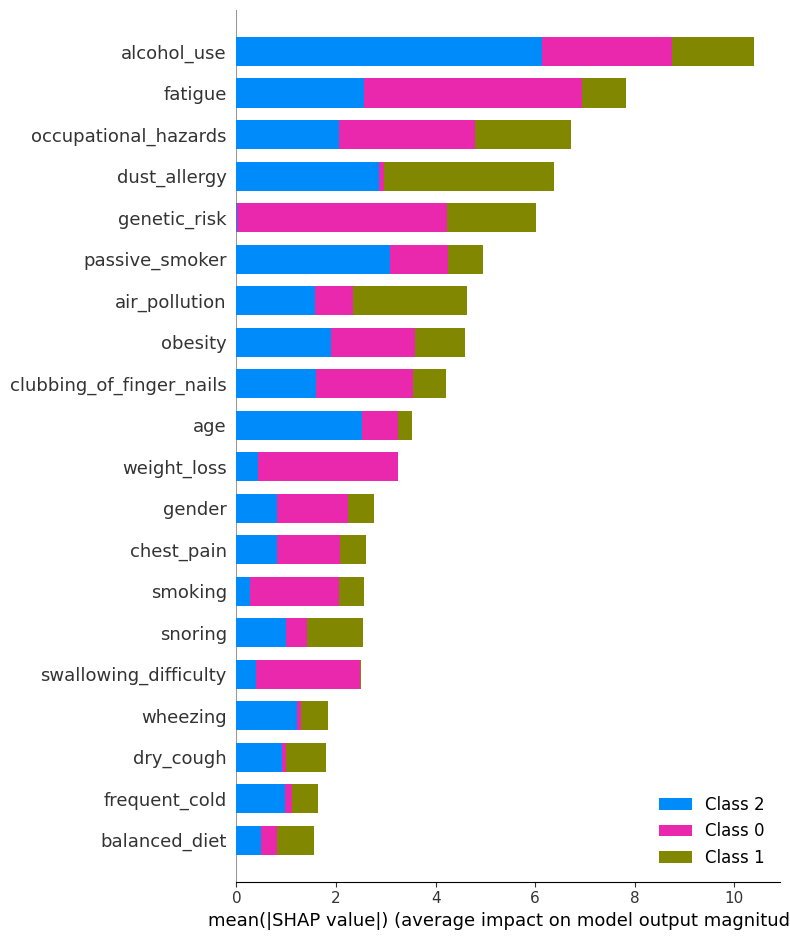

In [ ]:
explainer = shap.LinearExplainer(lr, X_train_100)
linearshap_values = explainer.shap_values(X_train_100)
shap.summary_plot(linearshap_values, X_train_100)

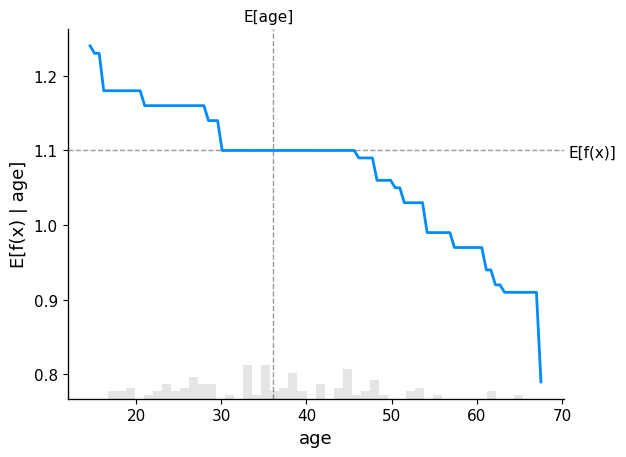

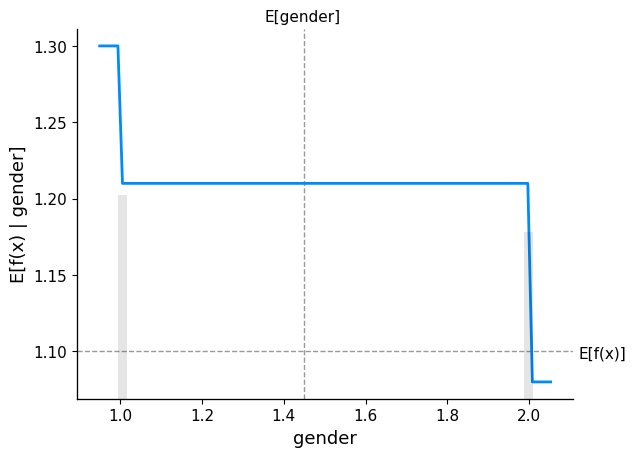

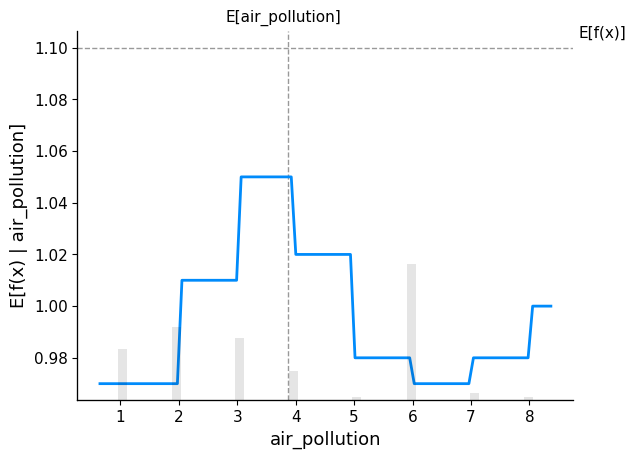

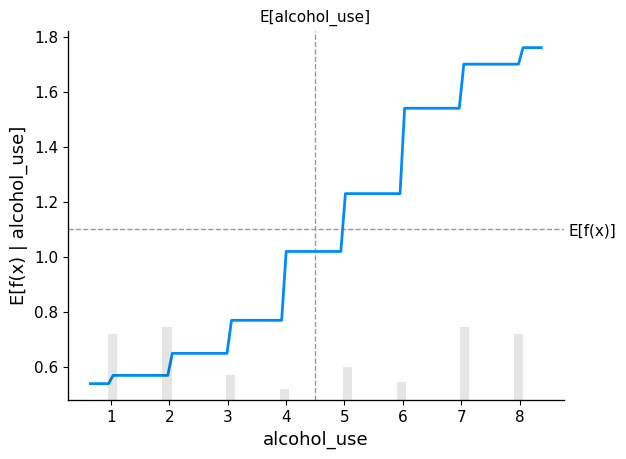

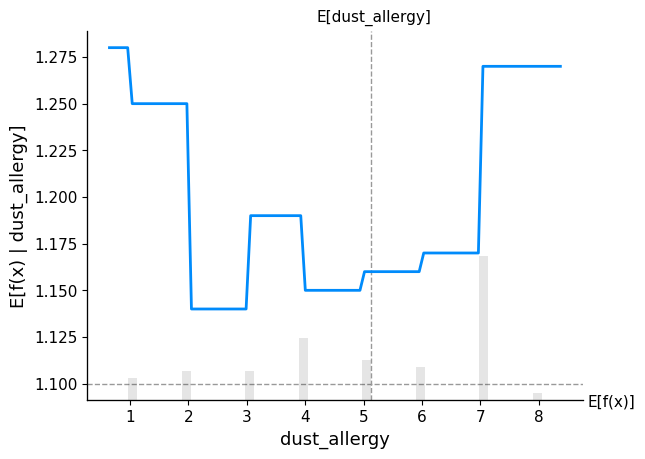

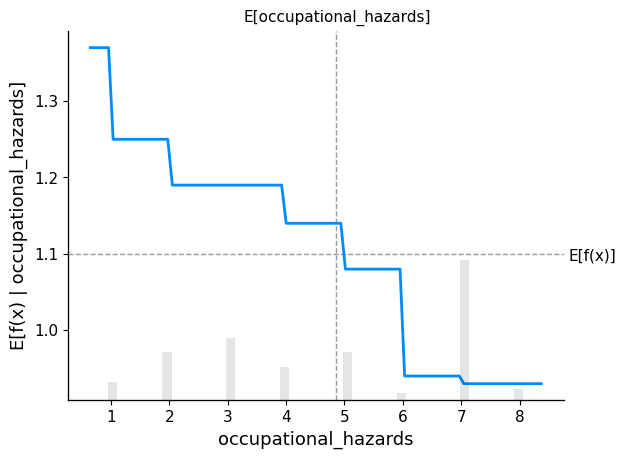

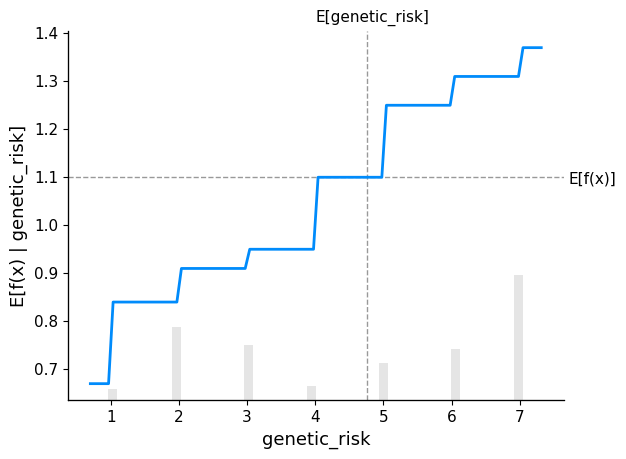

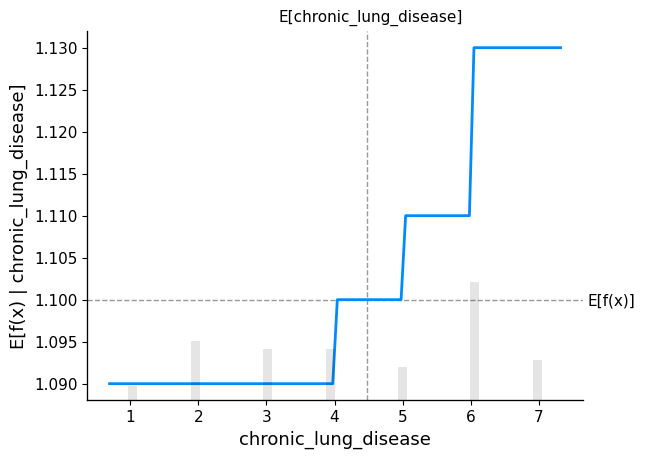

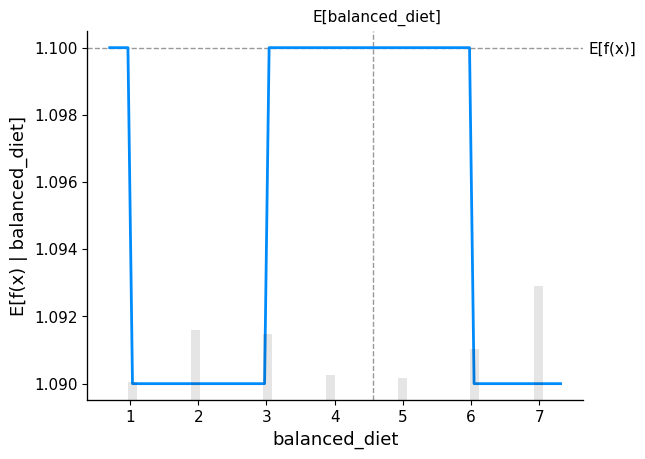

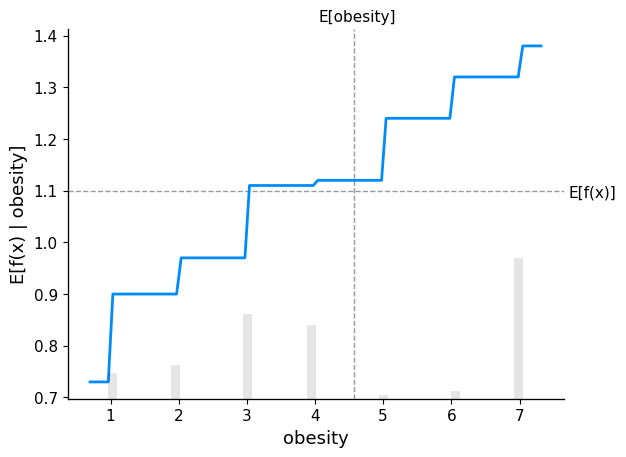

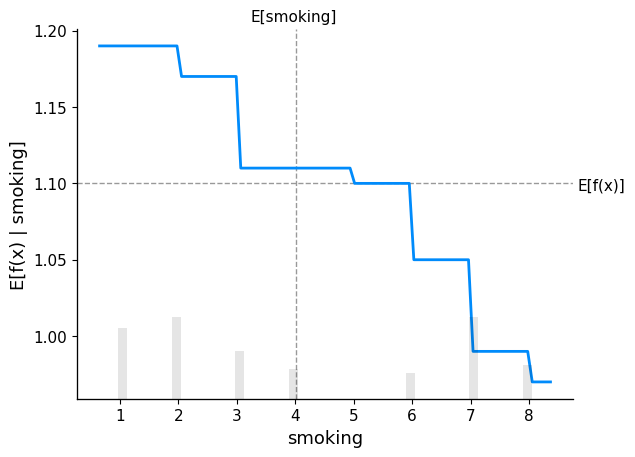

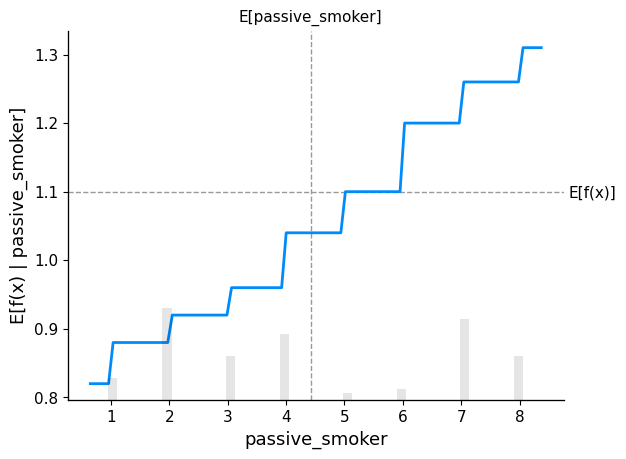

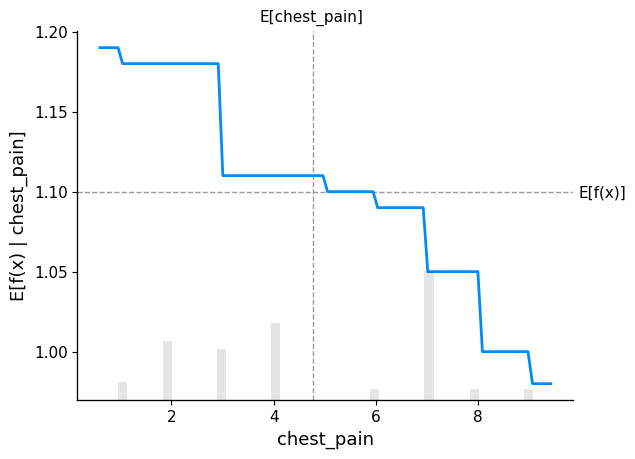

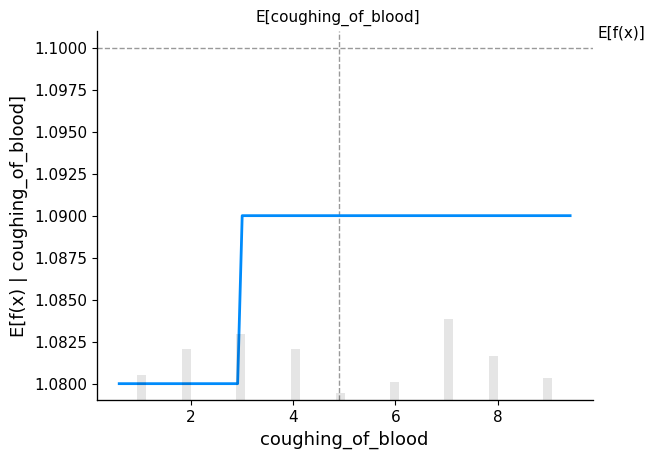

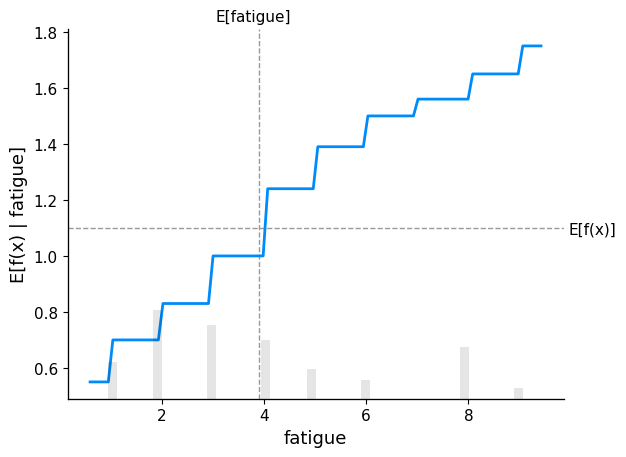

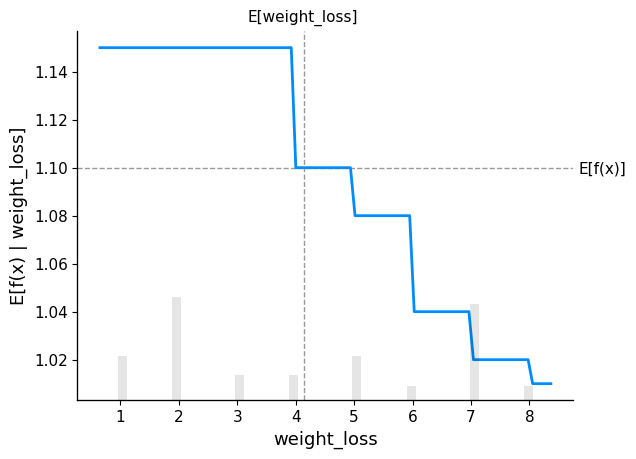

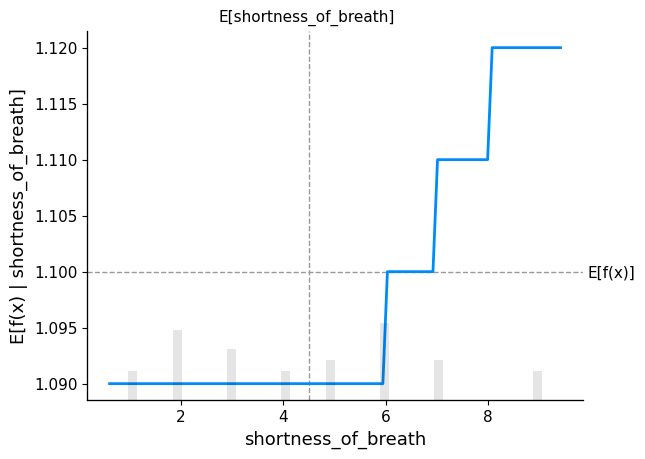

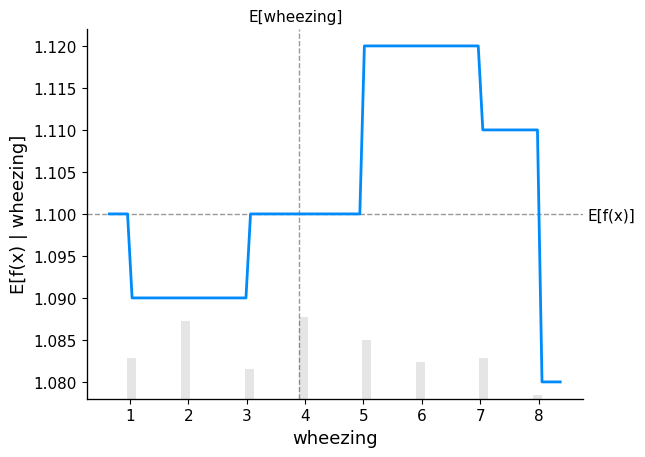

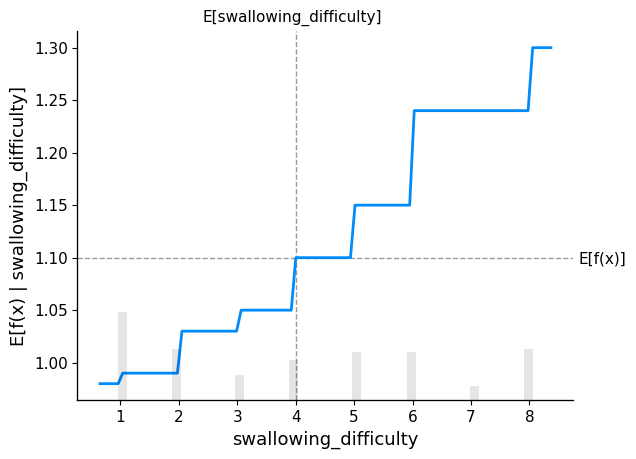

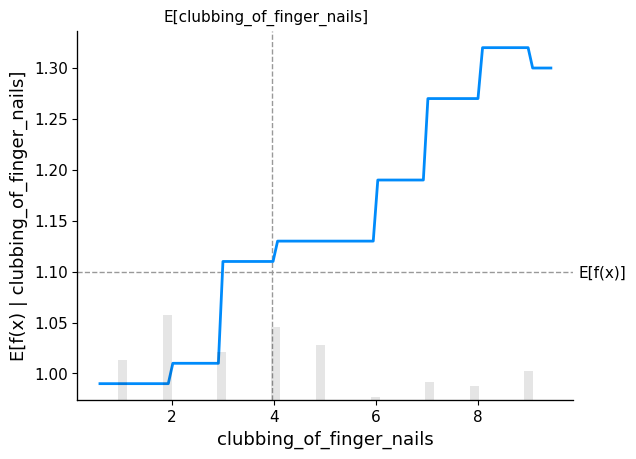

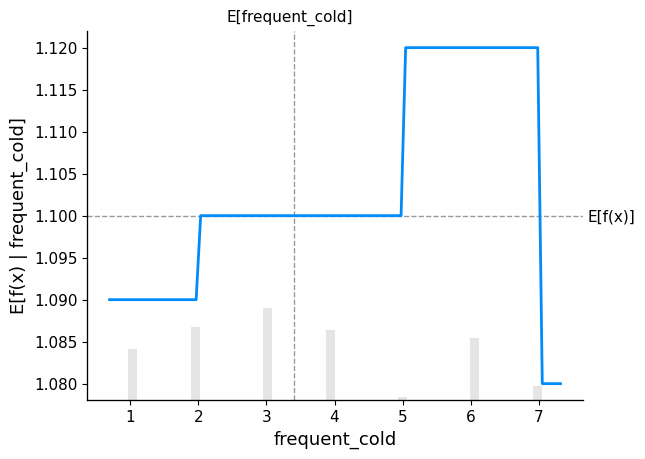

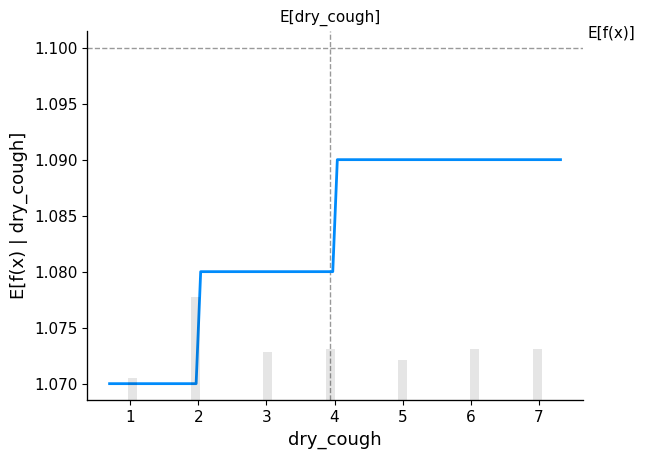

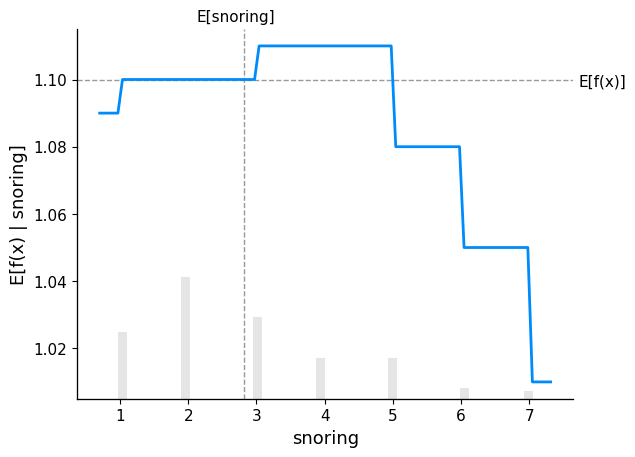

In [ ]:
for i in X_train_100.columns:
    # make a standard partial dependence plot
    shap.partial_dependence_plot(
        i,
        lr.predict,
        X_train_100,
        model_expected_value=True,
        feature_expected_value=True,
        ice=False
    )

Next we perform shap analysis on Tree based Model, and identify and quantify the contribution of each input feature to the final prediction made by the model

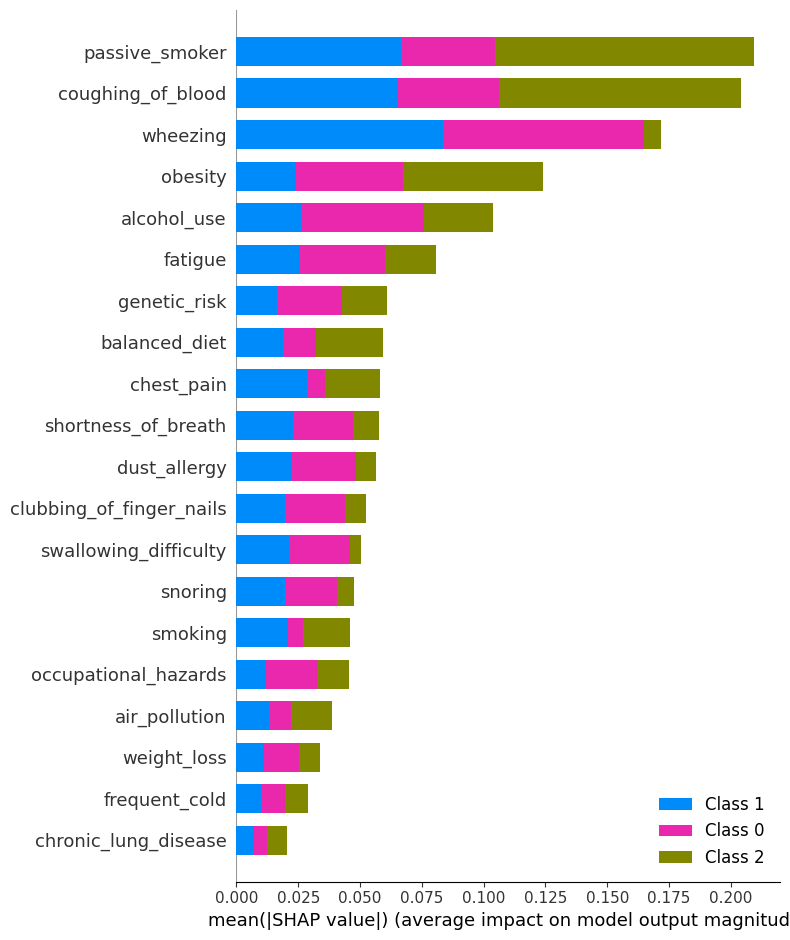

In [ ]:
explainer = shap.TreeExplainer(rfc, X_train_100)
treeshap_values = explainer.shap_values(X_test_100)
shap.summary_plot(treeshap_values, X_test_100)

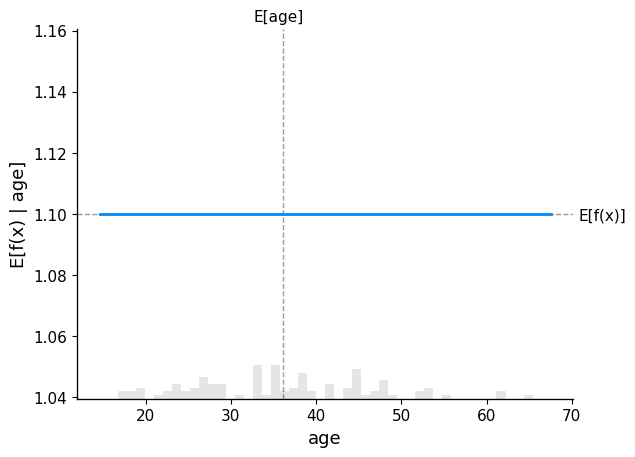

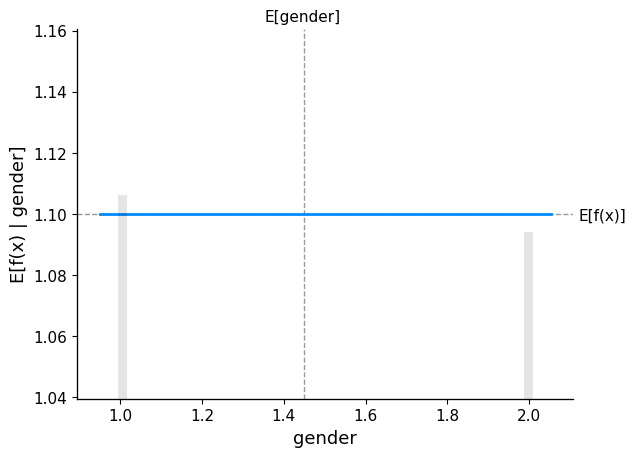

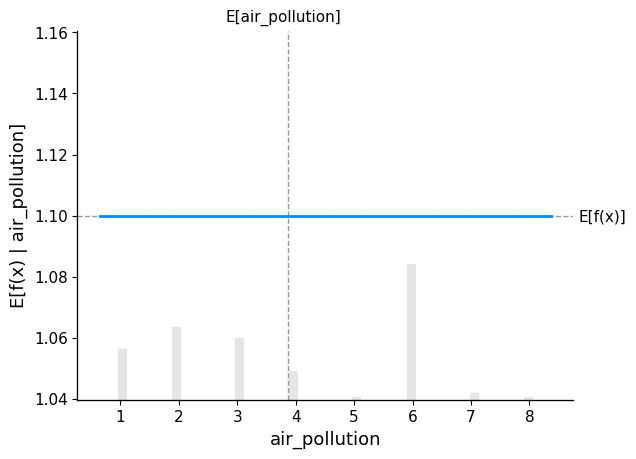

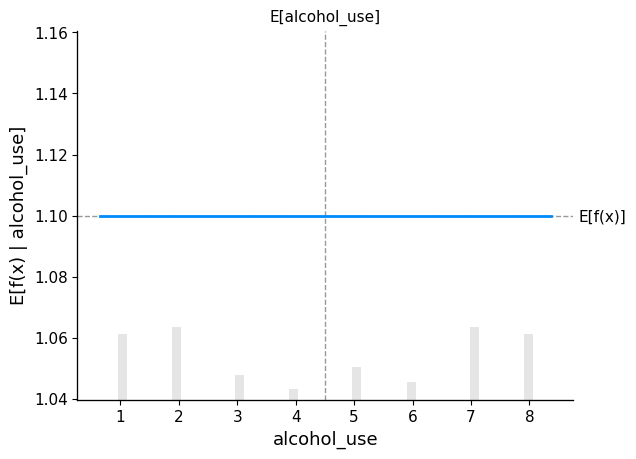

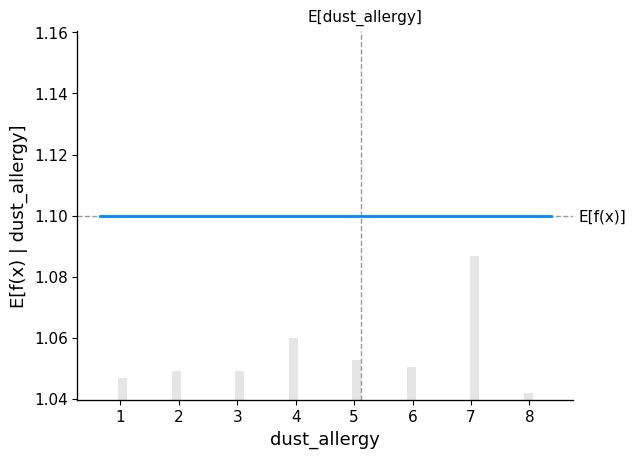

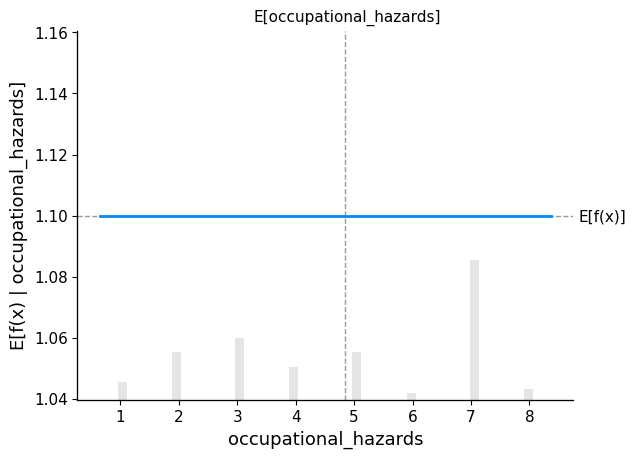

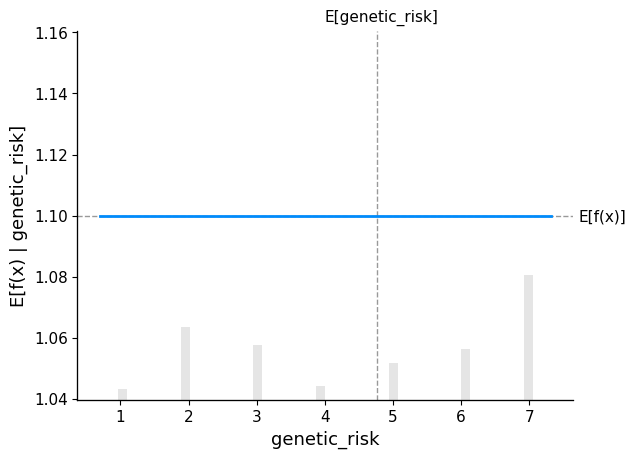

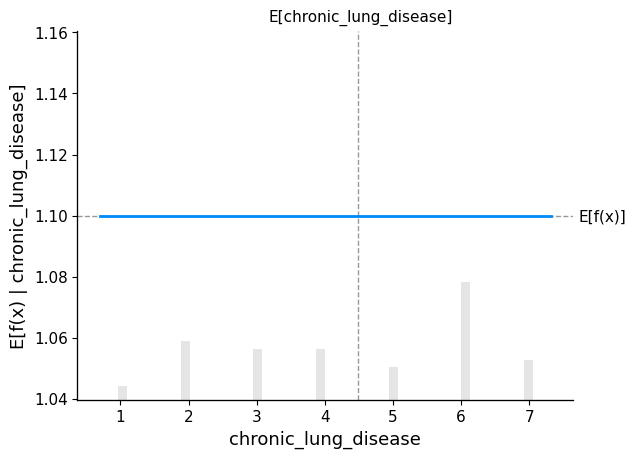

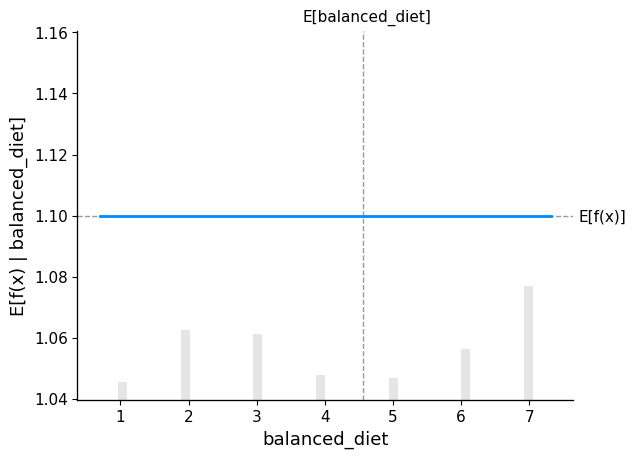

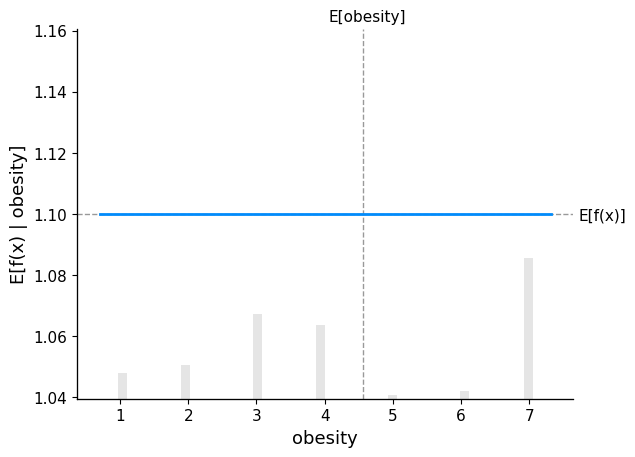

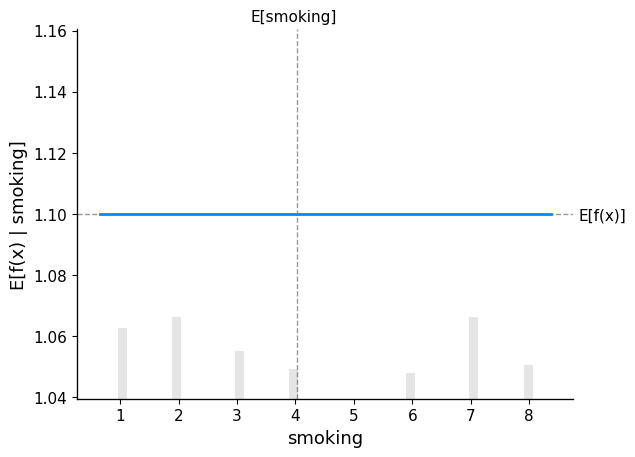

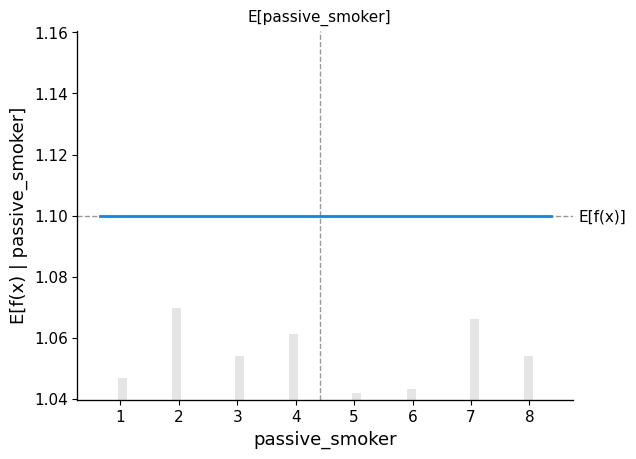

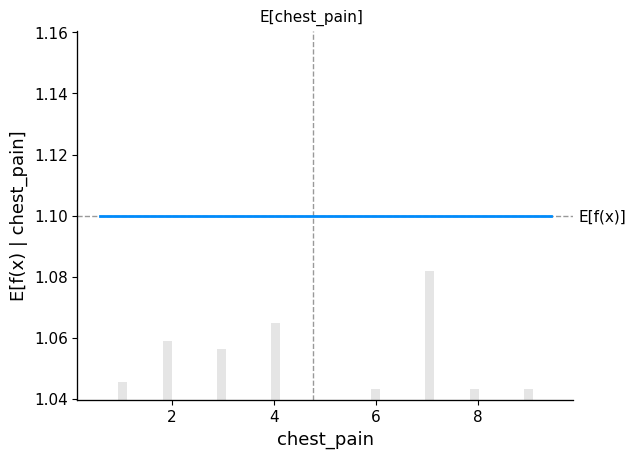

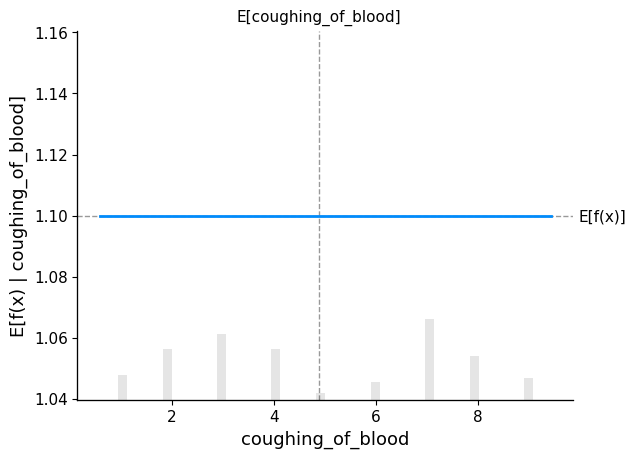

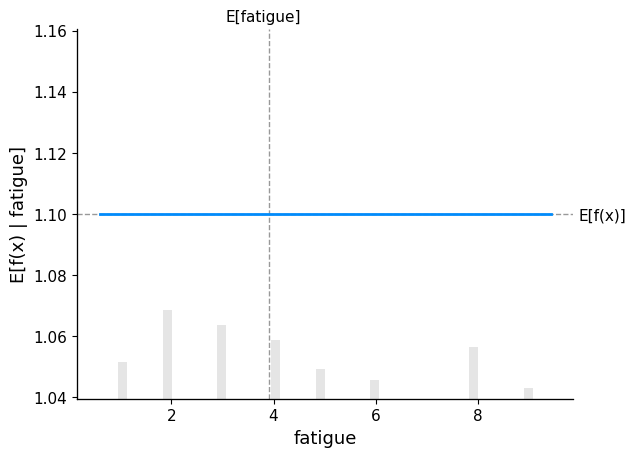

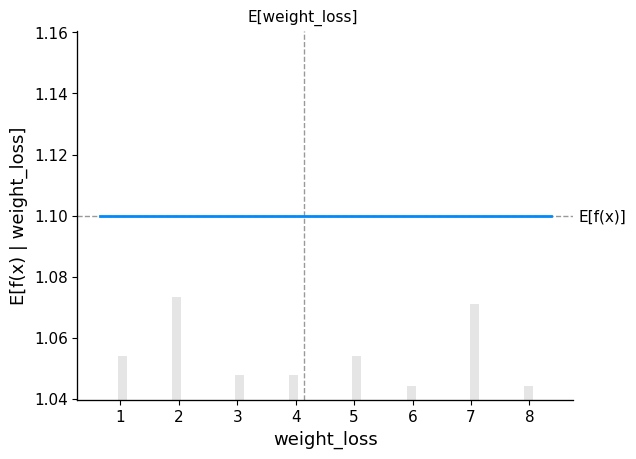

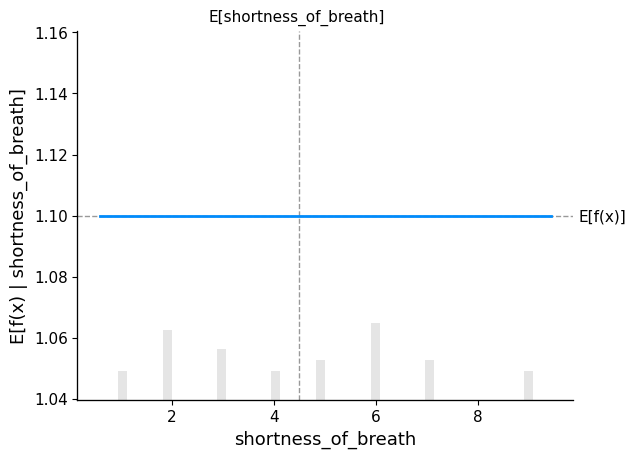

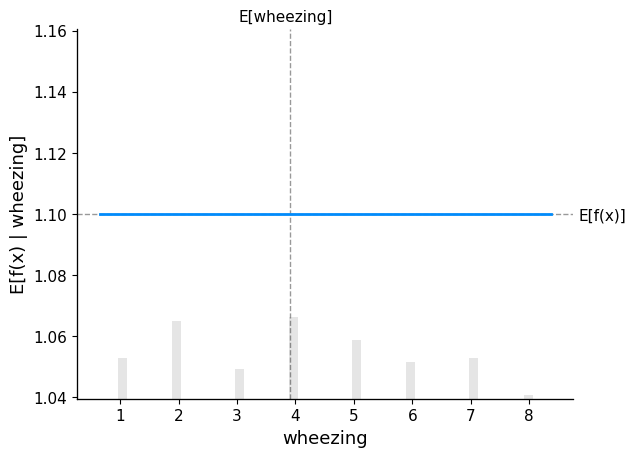

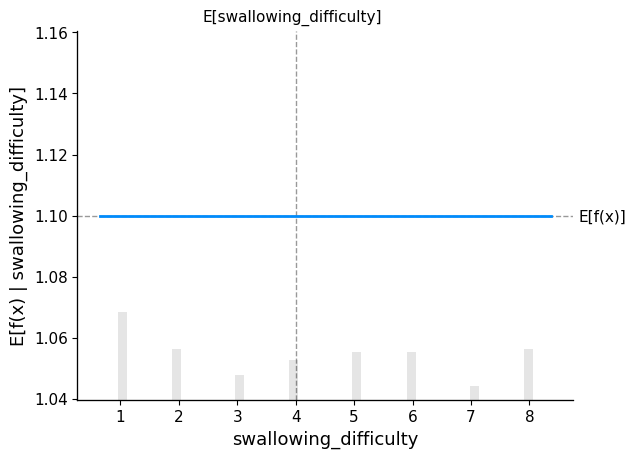

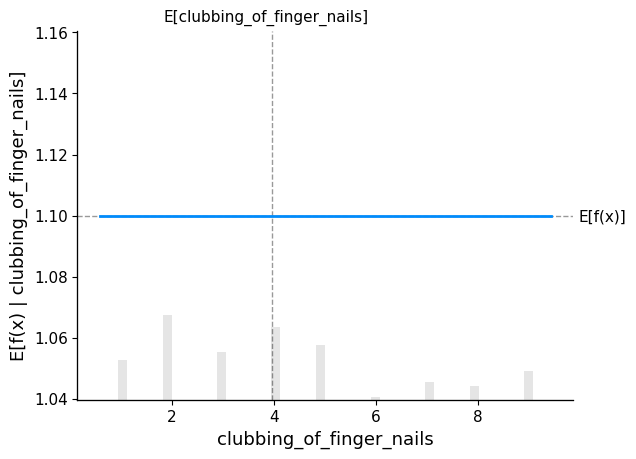

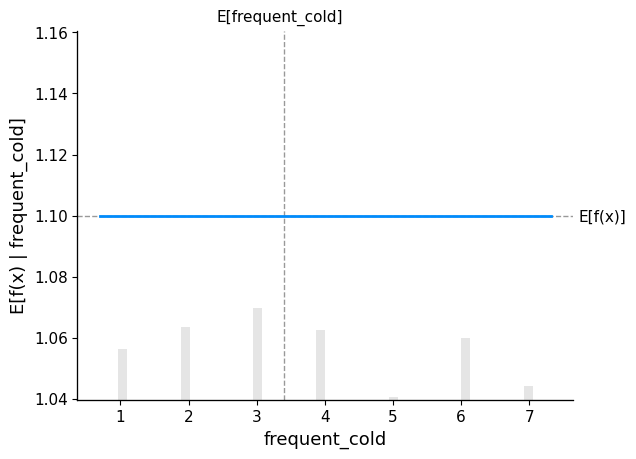

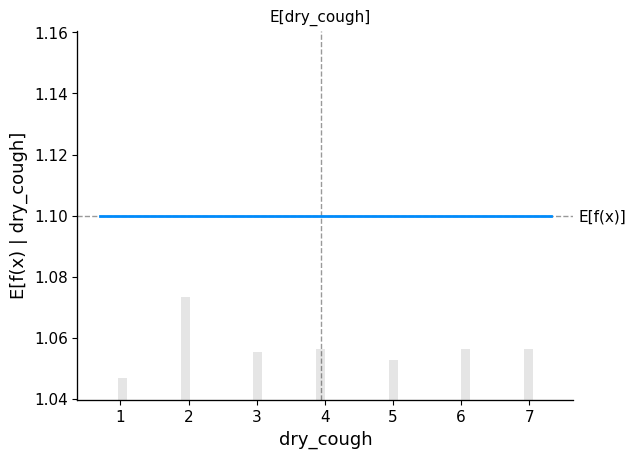

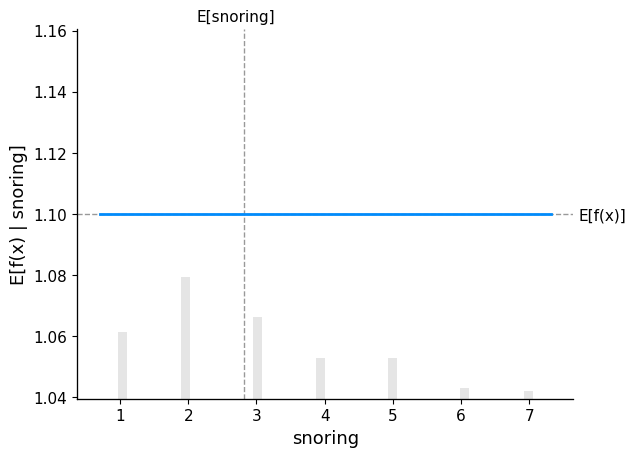

In [ ]:
for i in X_train_100.columns:
    # make a standard partial dependence plot
    shap.partial_dependence_plot(
        i,
        rfc.predict,
        X_train_100,
        model_expected_value=True,
        feature_expected_value=True,
        ice=False
    )

Now let's analyze auto ml's best model, and identify and quantify the contribution of each input feature to the final prediction made by the model

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                       rmse          mse          mae        rmsle    mean_residual_deviance    training_time_ms    predict_time_per_row_ms  algo
------------------------------------------------------  -----------  -----------  -----------  -----------  ------------------------  ------------------  -------------------------  ---------------
XGBoost_3_AutoML_1_20230410_20241                       0.000416312  1.73316e-07  0.000128727  0.000220359               1.73316e-07                 234                   0.005162  XGBoost
XGBoost_2_AutoML_1_20230410_20241                       0.000569721  3.24582e-07  0.000192125  0.00032898                3.24582e-07                 345                   0.005566  XGBoost
StackedEnsemble_AllModels_1_AutoML_1_20230410_20241     0.00069605   4.84486e-07  0.000305937  0.000465424               4.84486e-07                1609                   0.35744   StackedEnsemble
XGBoost_1_AutoML_1_20230410_20241                       0.00126785   1.60745e-06  0.000378062  0.000654332               1.60745e-06                 527                   0.009375  XGBoost
GBM_2_AutoML_1_20230410_20241                           0.00149536   2.2361e-06   0.000293456  0.00115258                2.2361e-06                  961                   0.109476  GBM
GBM_3_AutoML_1_20230410_20241                           0.00152155   2.3151e-06   0.00029133   0.00111935                2.3151e-06                  845                   0.053054  GBM
StackedEnsemble_BestOfFamily_1_AutoML_1_20230410_20241  0.00161337   2.60295e-06  0.00107762   0.00109313                2.60295e-06                1455                   0.126201  StackedEnsemble
GBM_4_AutoML_1_20230410_20241                           0.00166258   2.76418e-06  0.000359797  0.00136195                2.76418e-06                1028                   0.050857  GBM
GBM_1_AutoML_1_20230410_20241                           0.00268369   7.20222e-06  0.00171849   0.00196078                7.20222e-06                4034                   0.222654  GBM
DRF_1_AutoML_1_20230410_20241                           0.00280244   7.85369e-06  0.000269881  0.00140065                7.85369e-06                 154                   0.012543  DRF
XRT_1_AutoML_1_20230410_20241                           0.141214     0.0199413    0.104804     0.0865444                 0.0199413                   219                   0.015795  DRF
GLM_1_AutoML_1_20230410_20241                           0.22131      0.0489782    0.158211     0.165124                  0.0489782                    80                   0.001813  GLM
[12 rows x 9 columns]

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

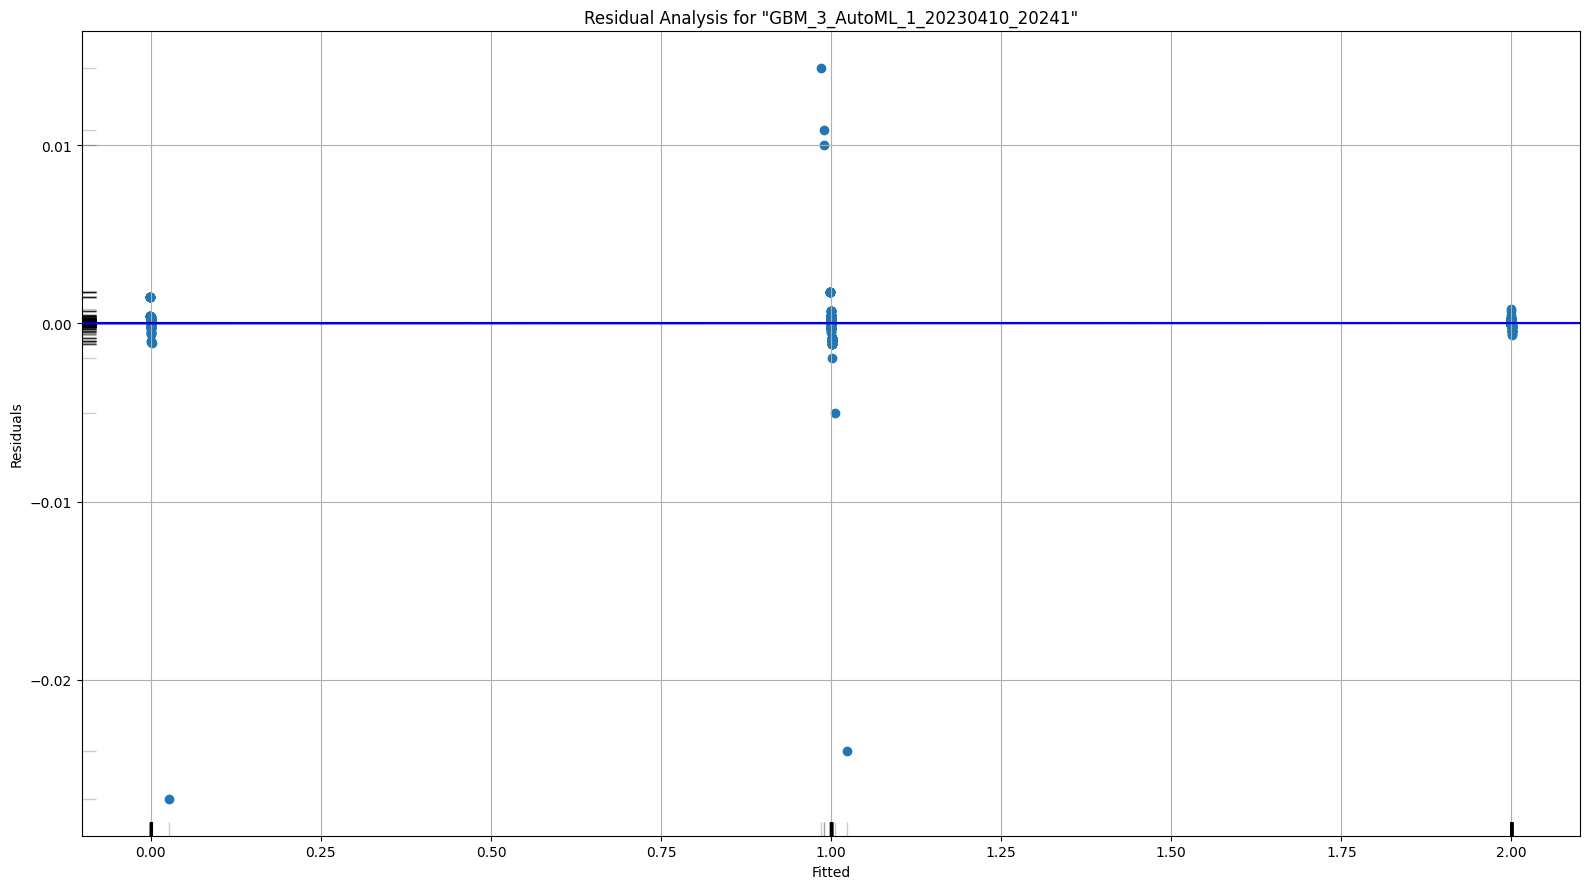

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

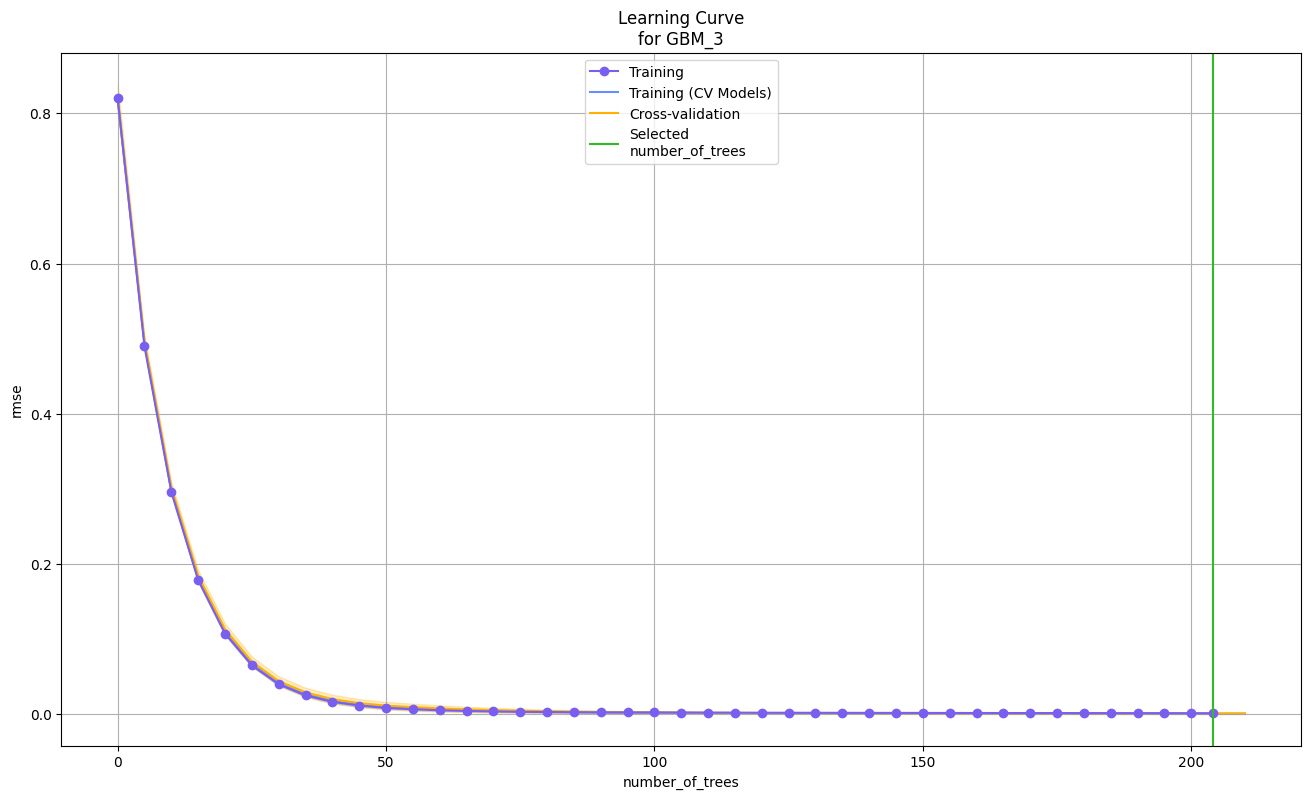

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

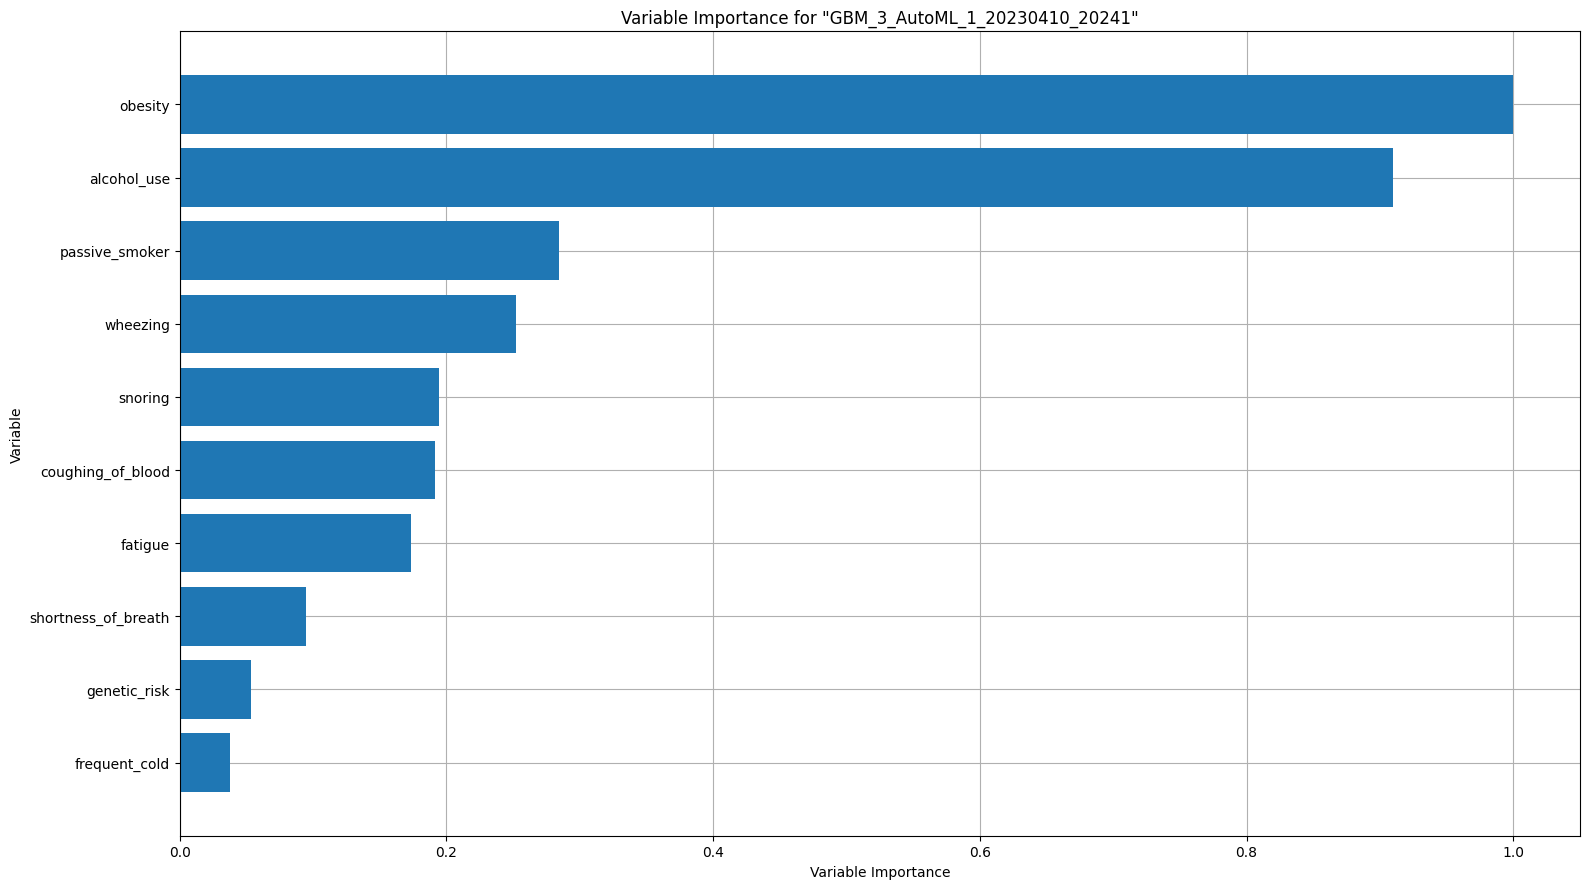

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

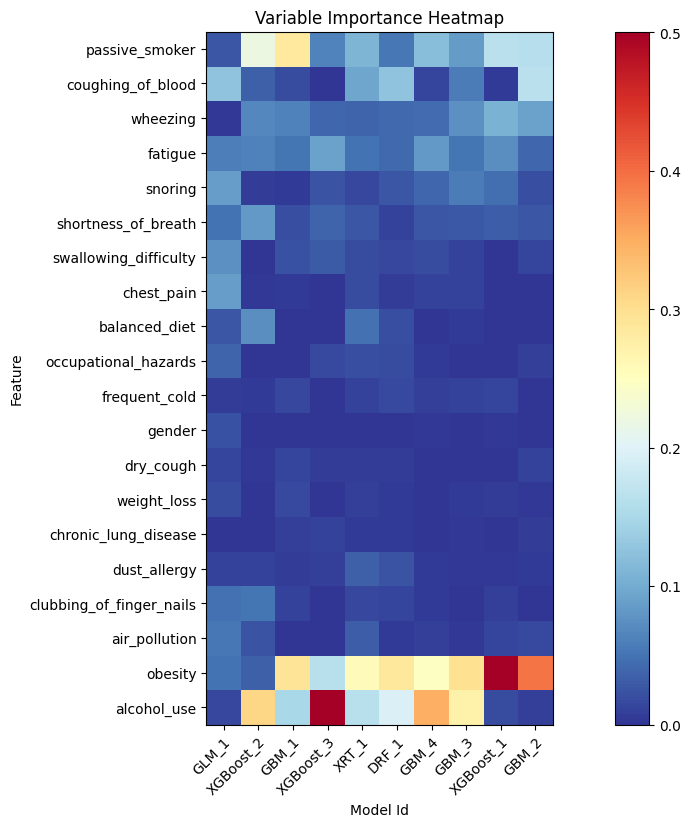

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

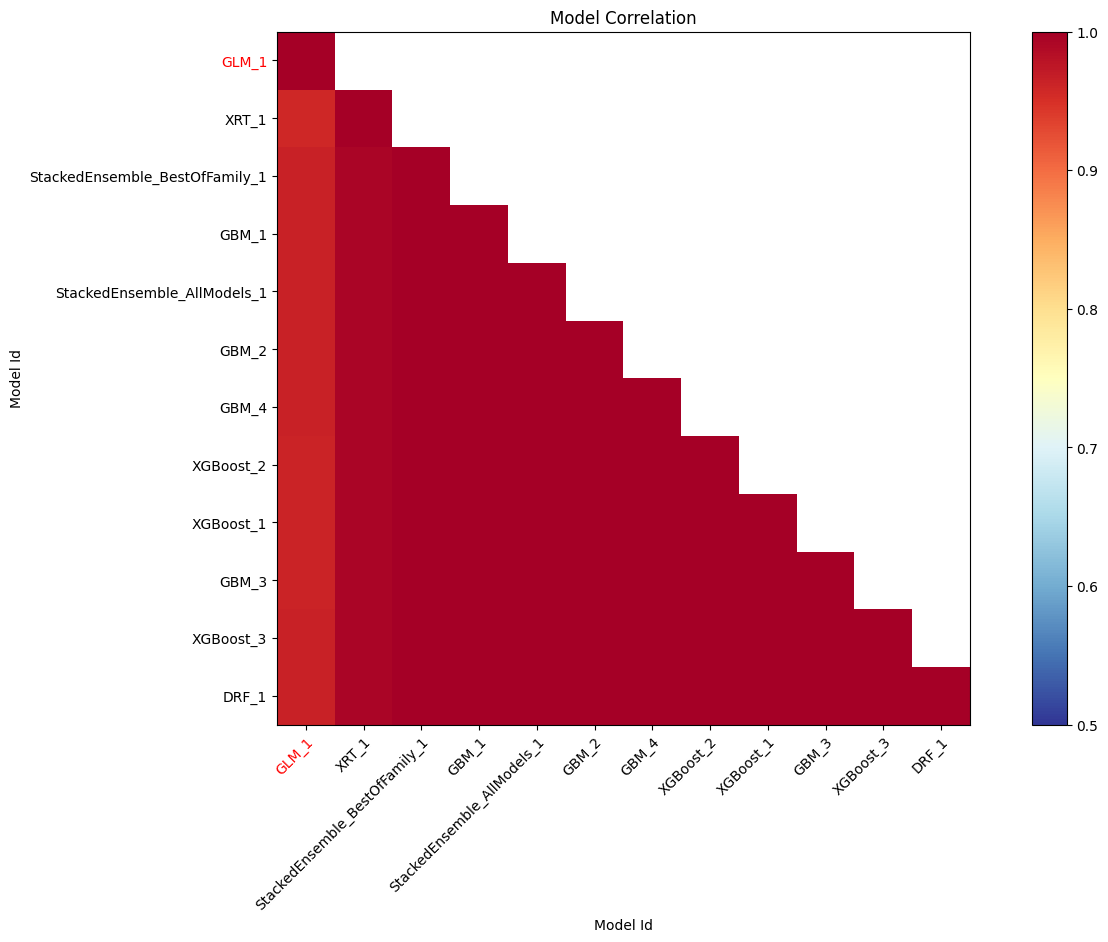

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

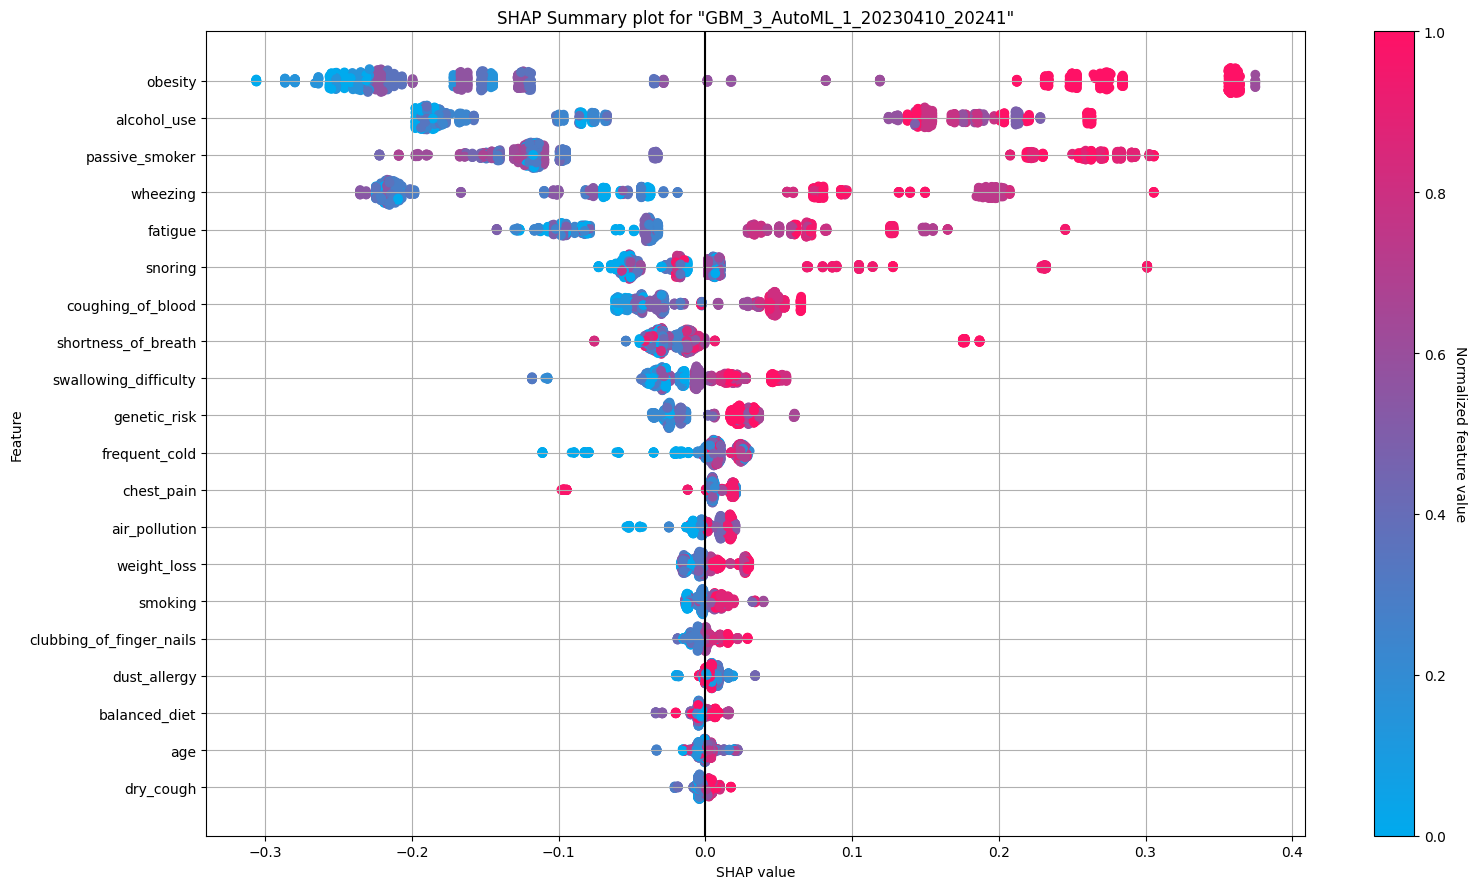

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

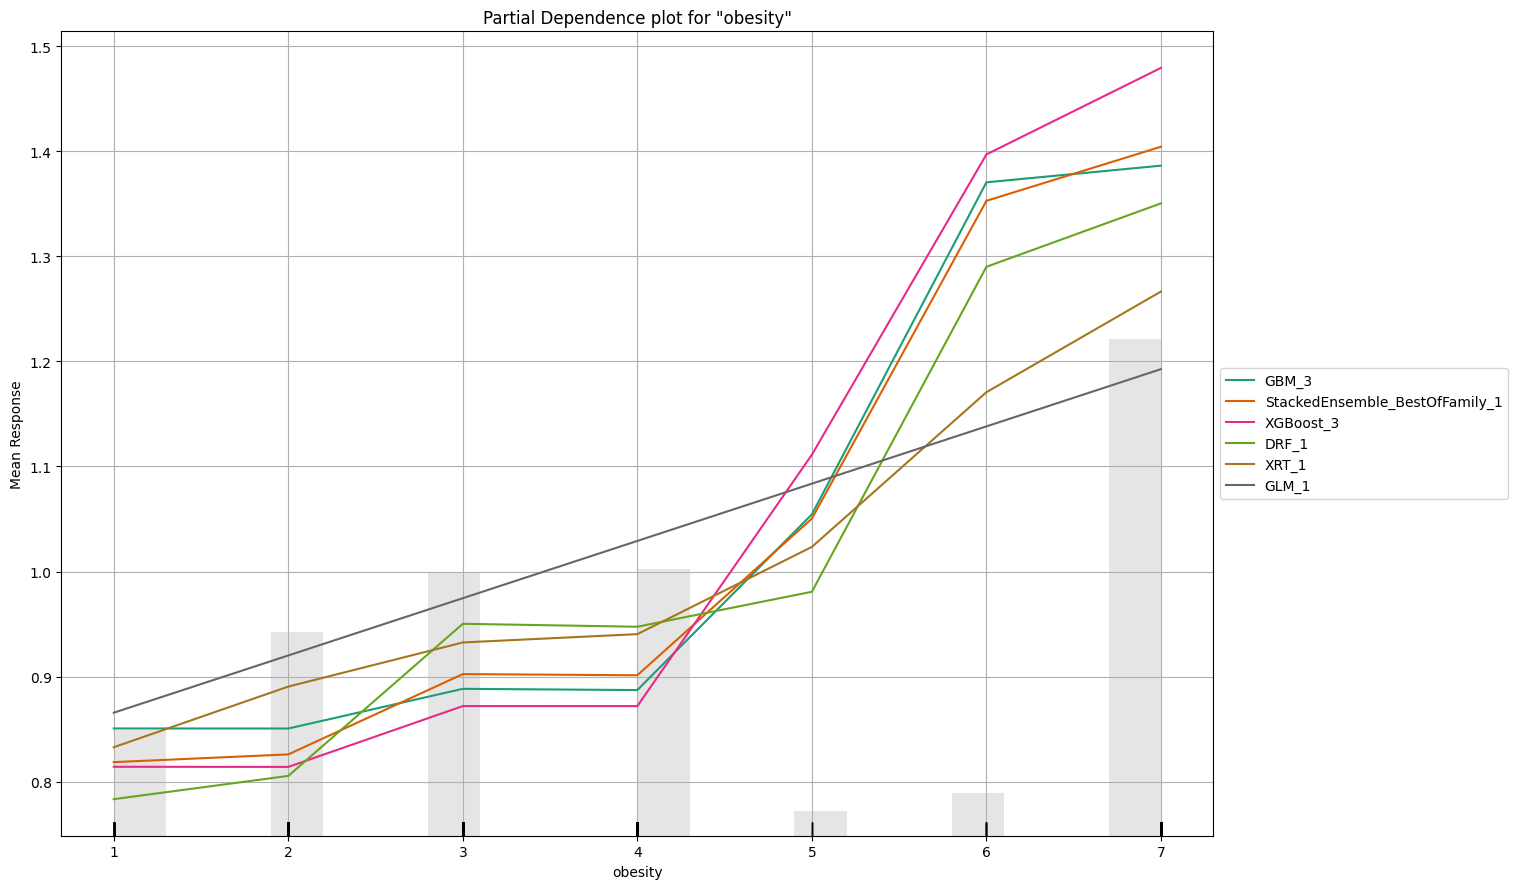

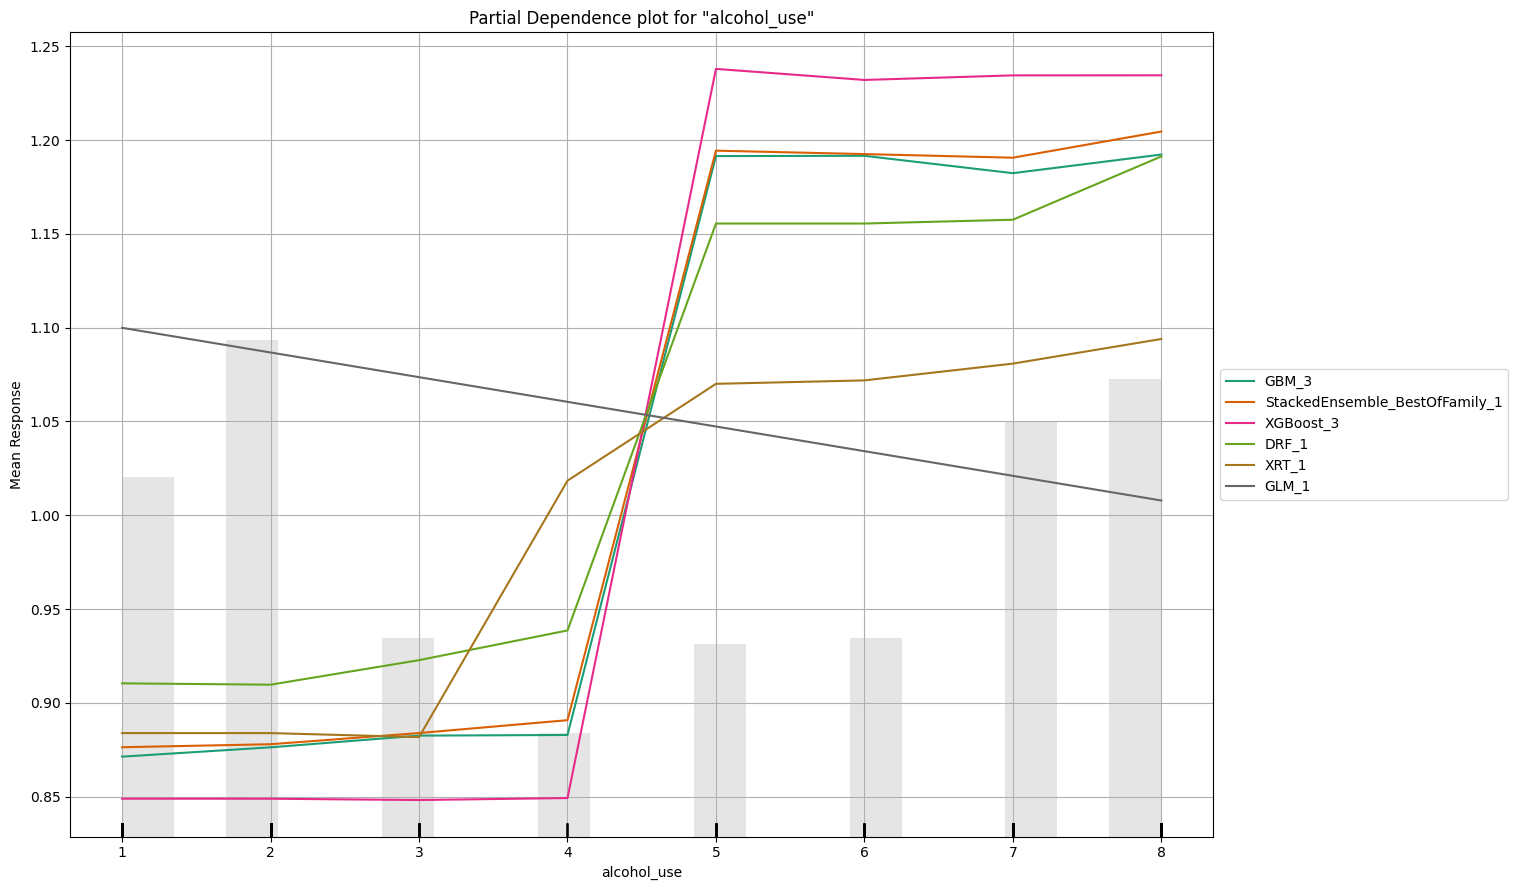

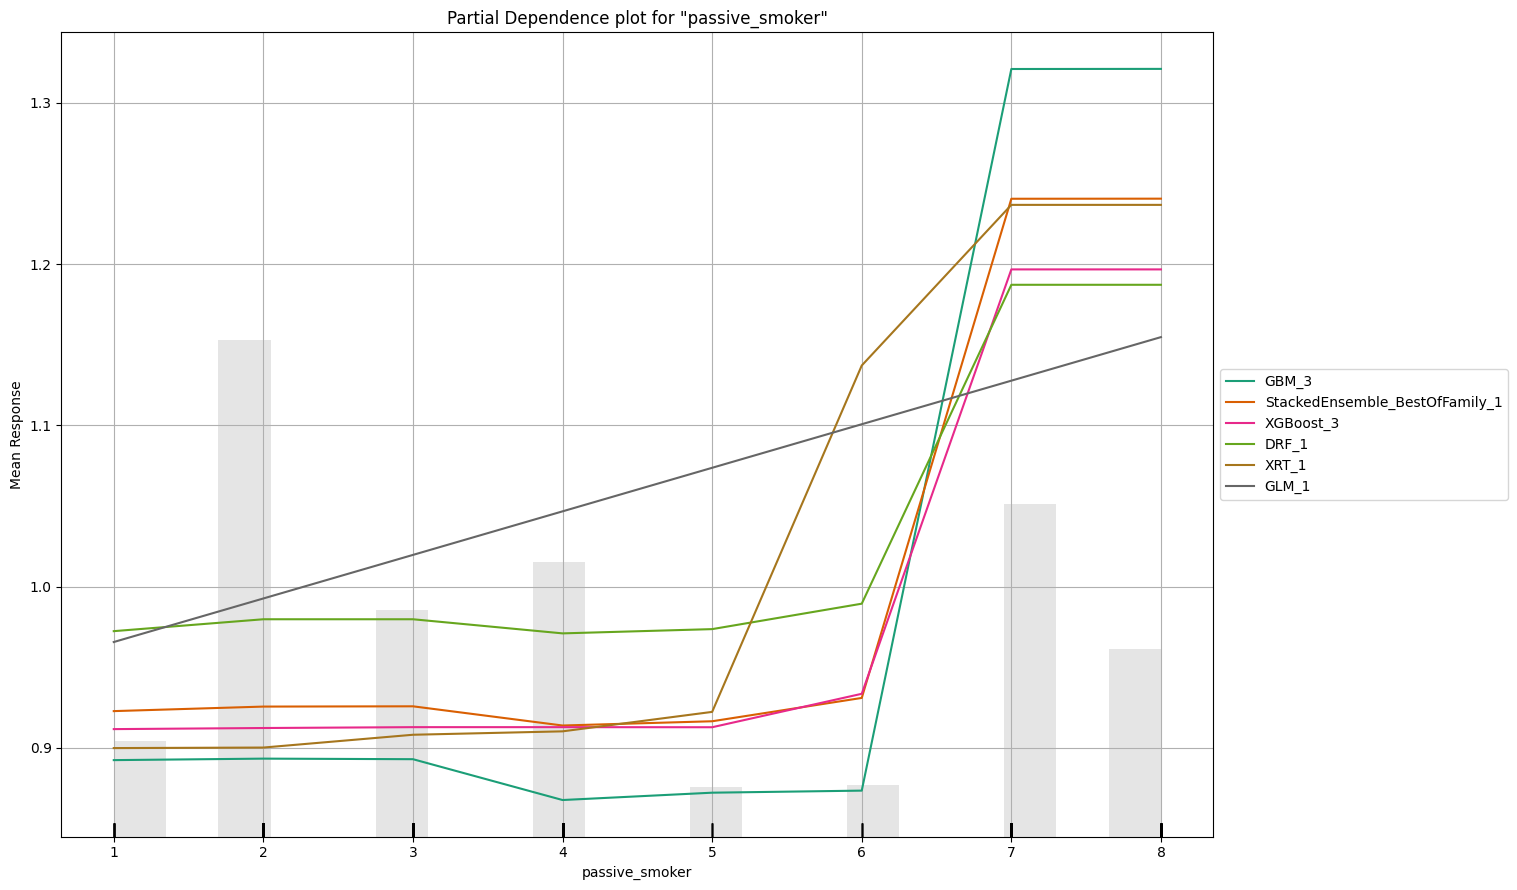

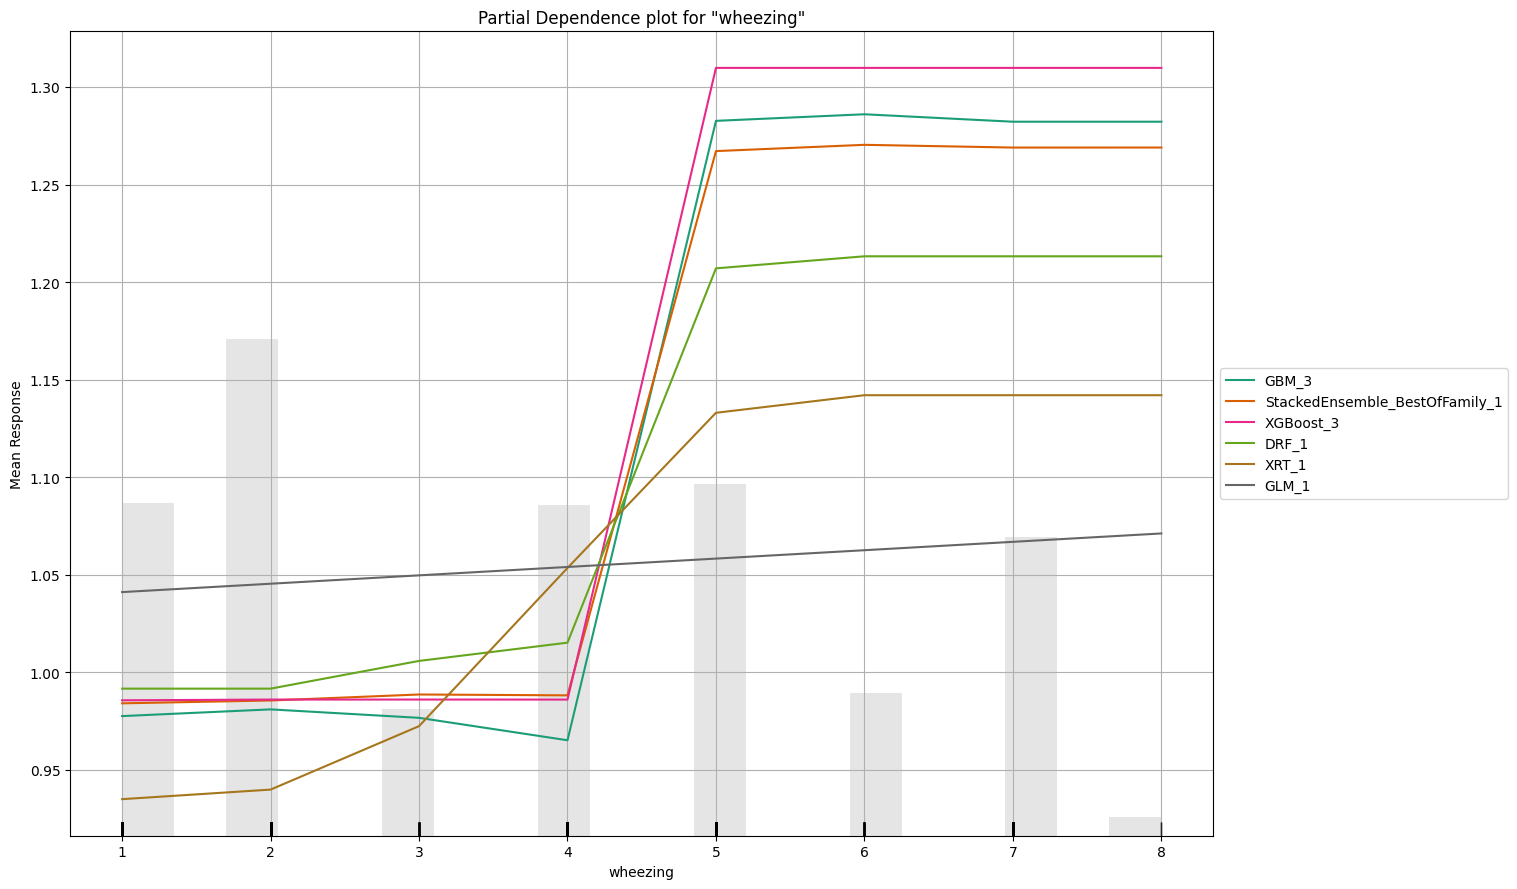

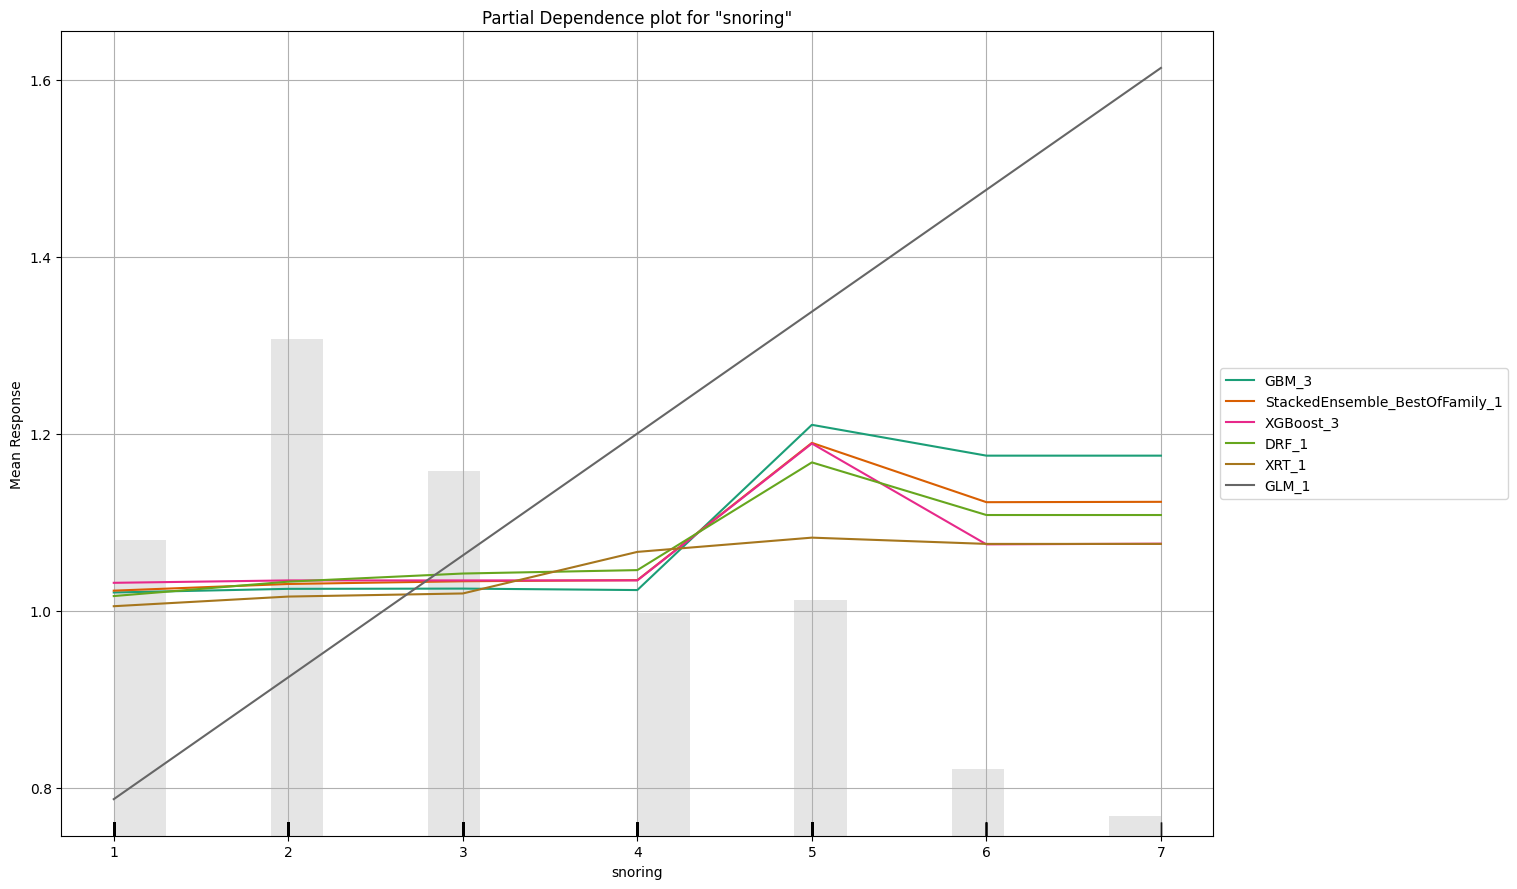

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

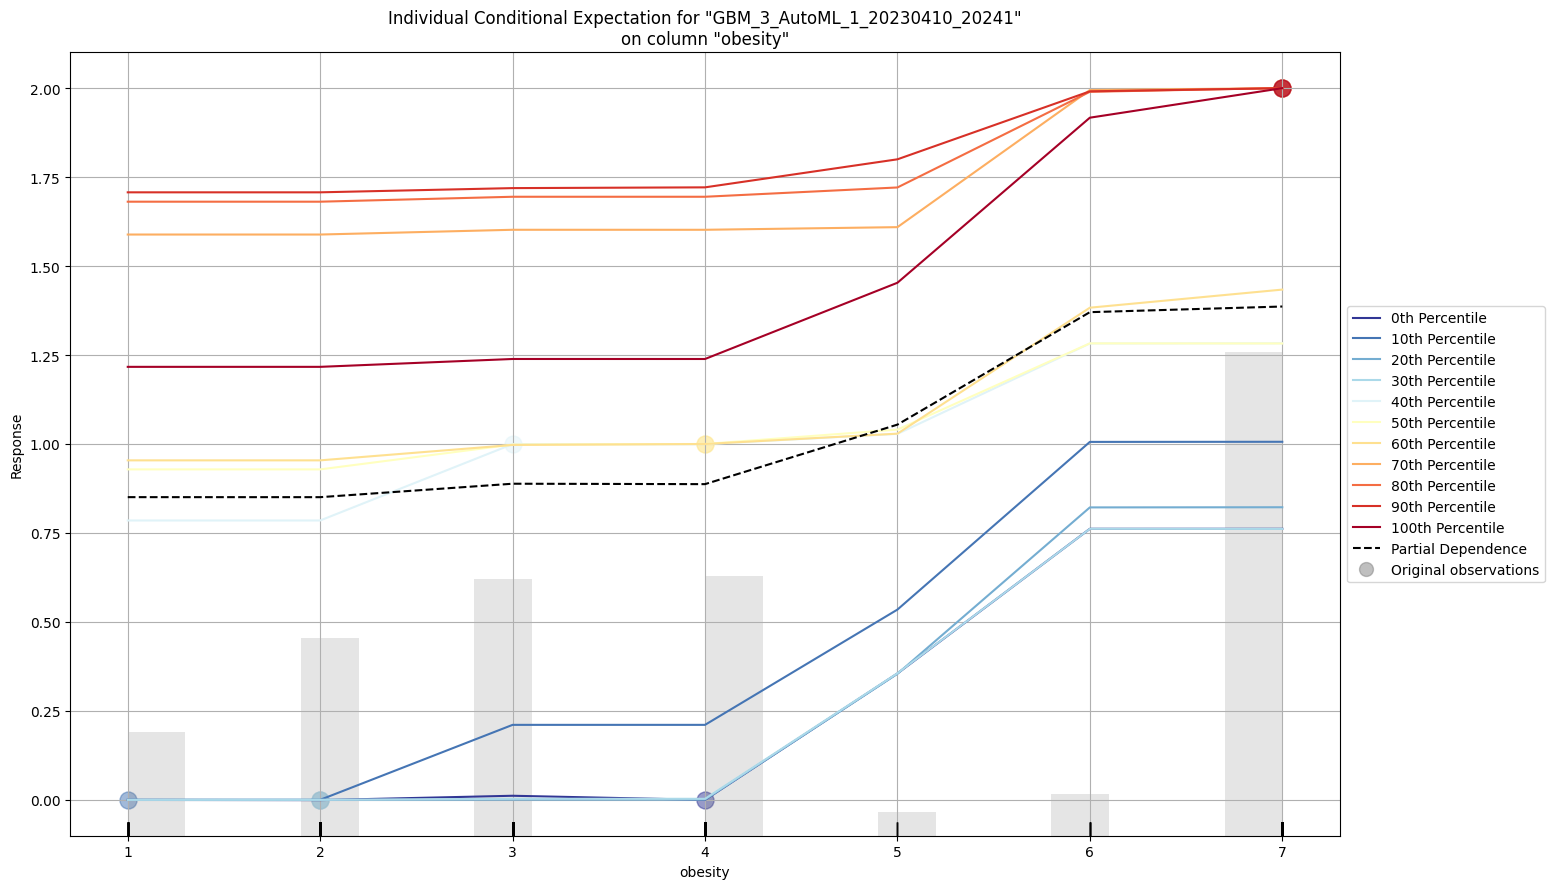

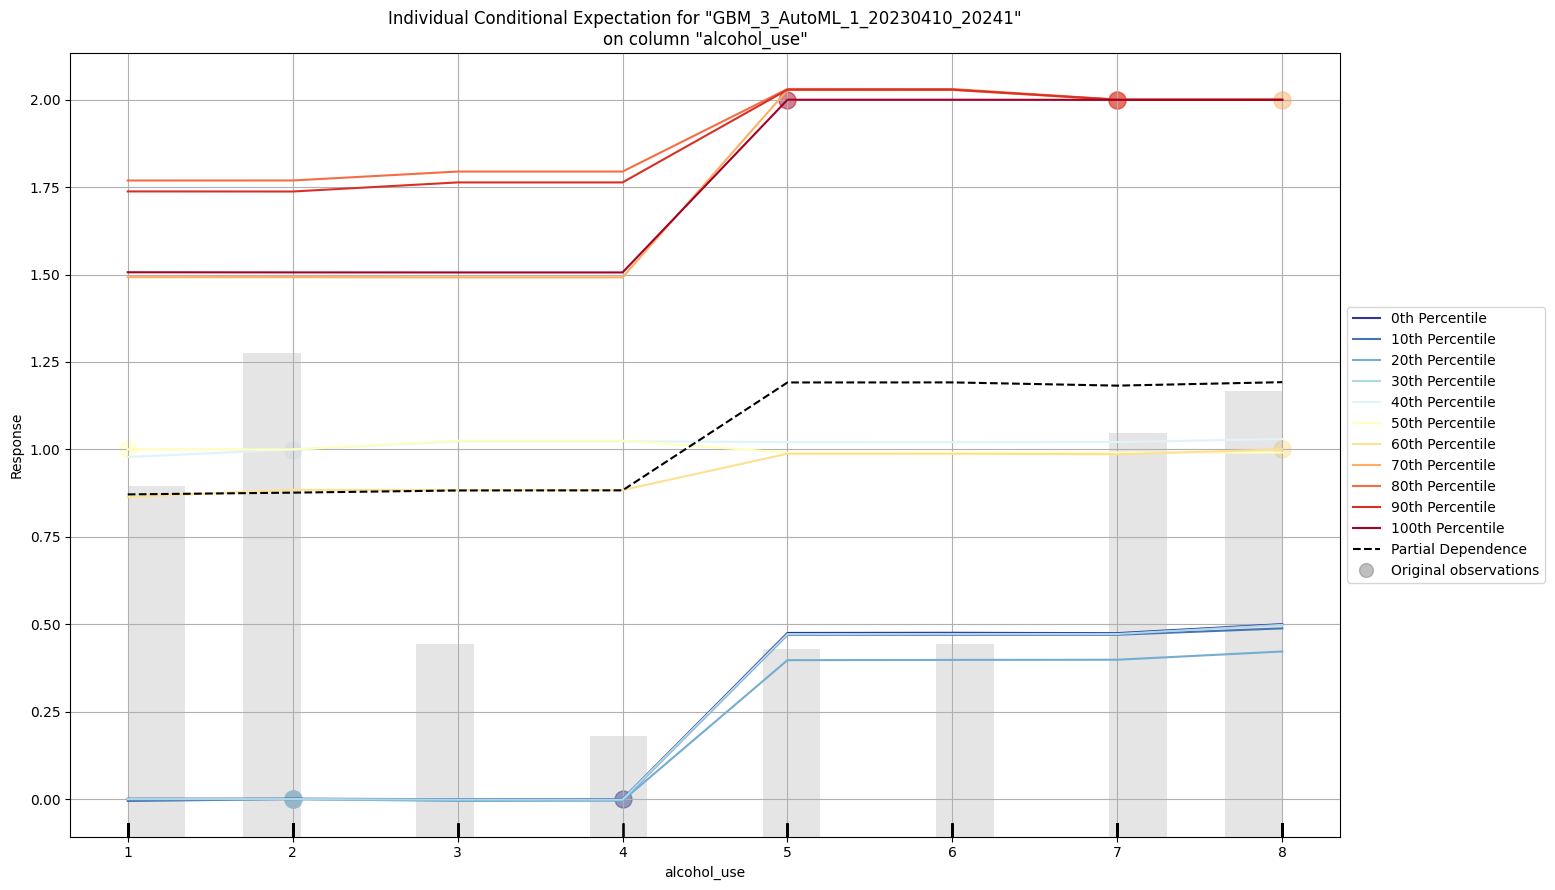

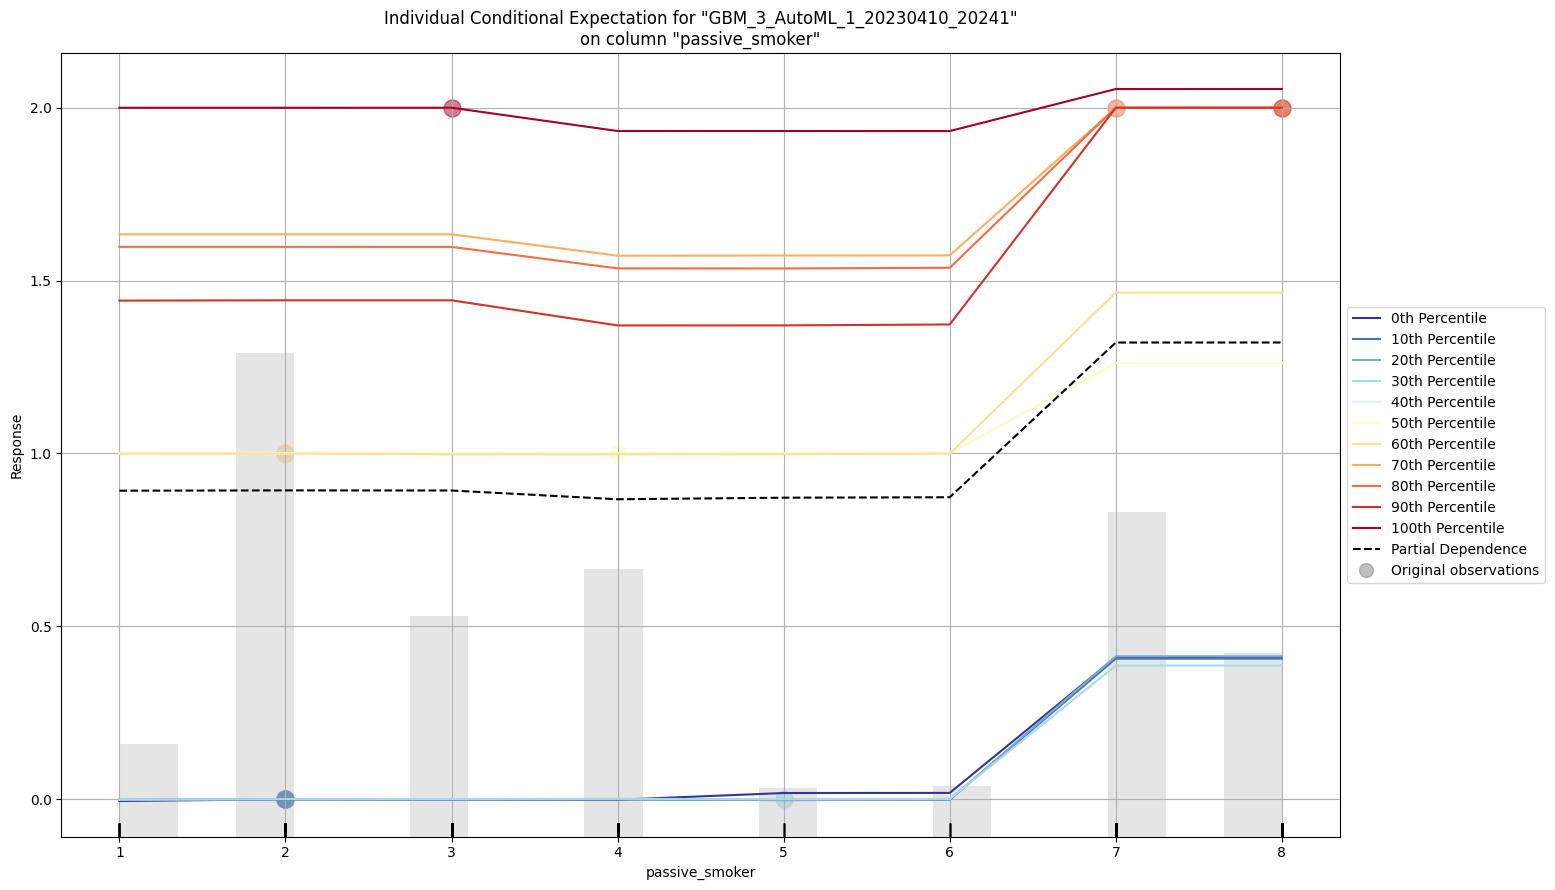

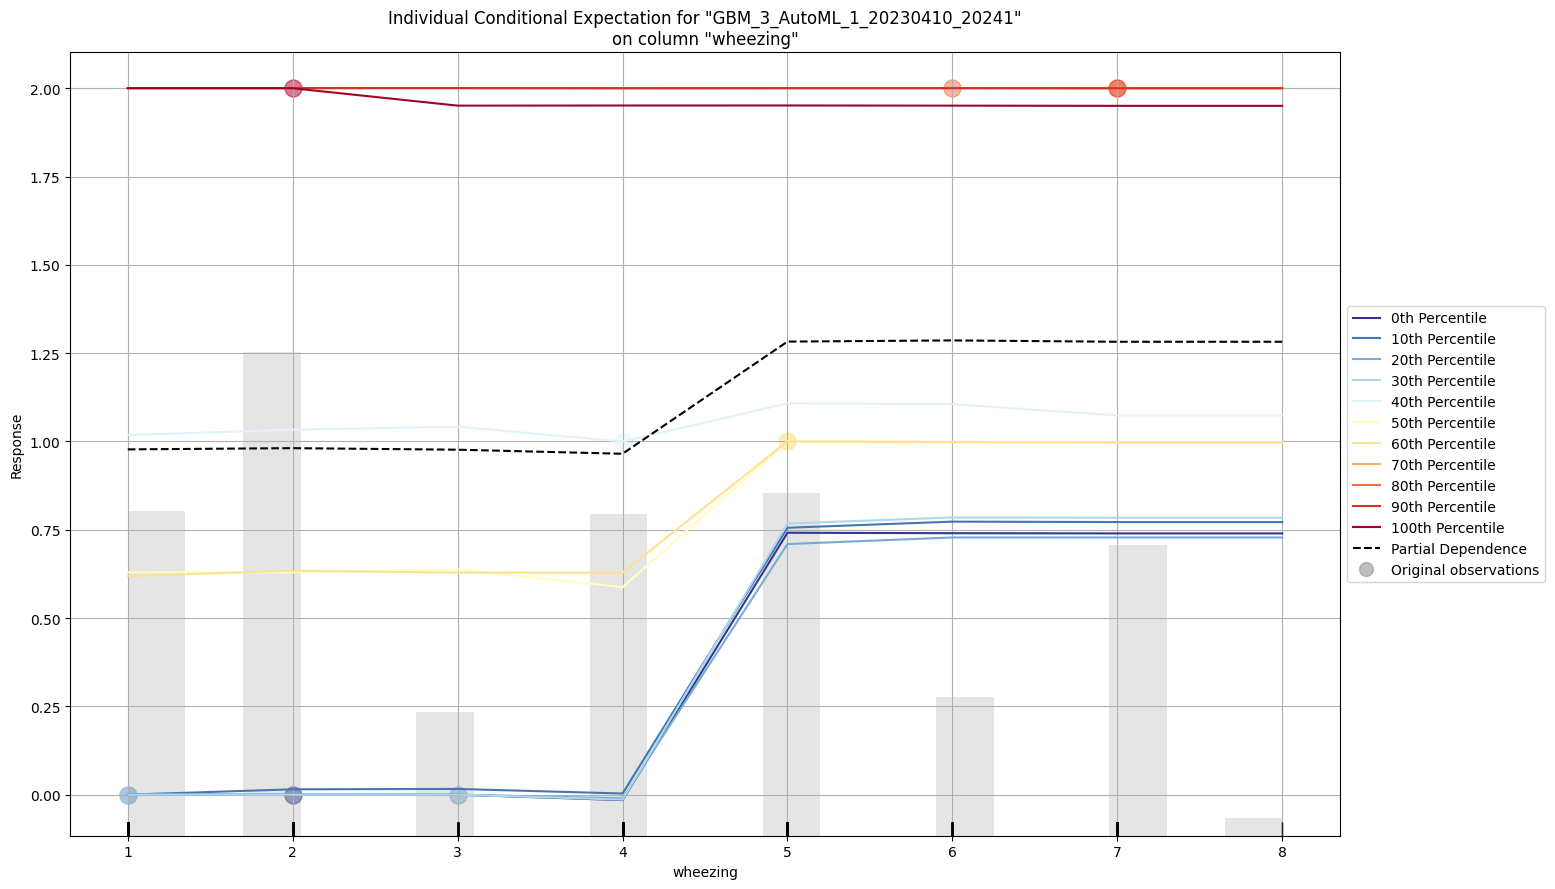

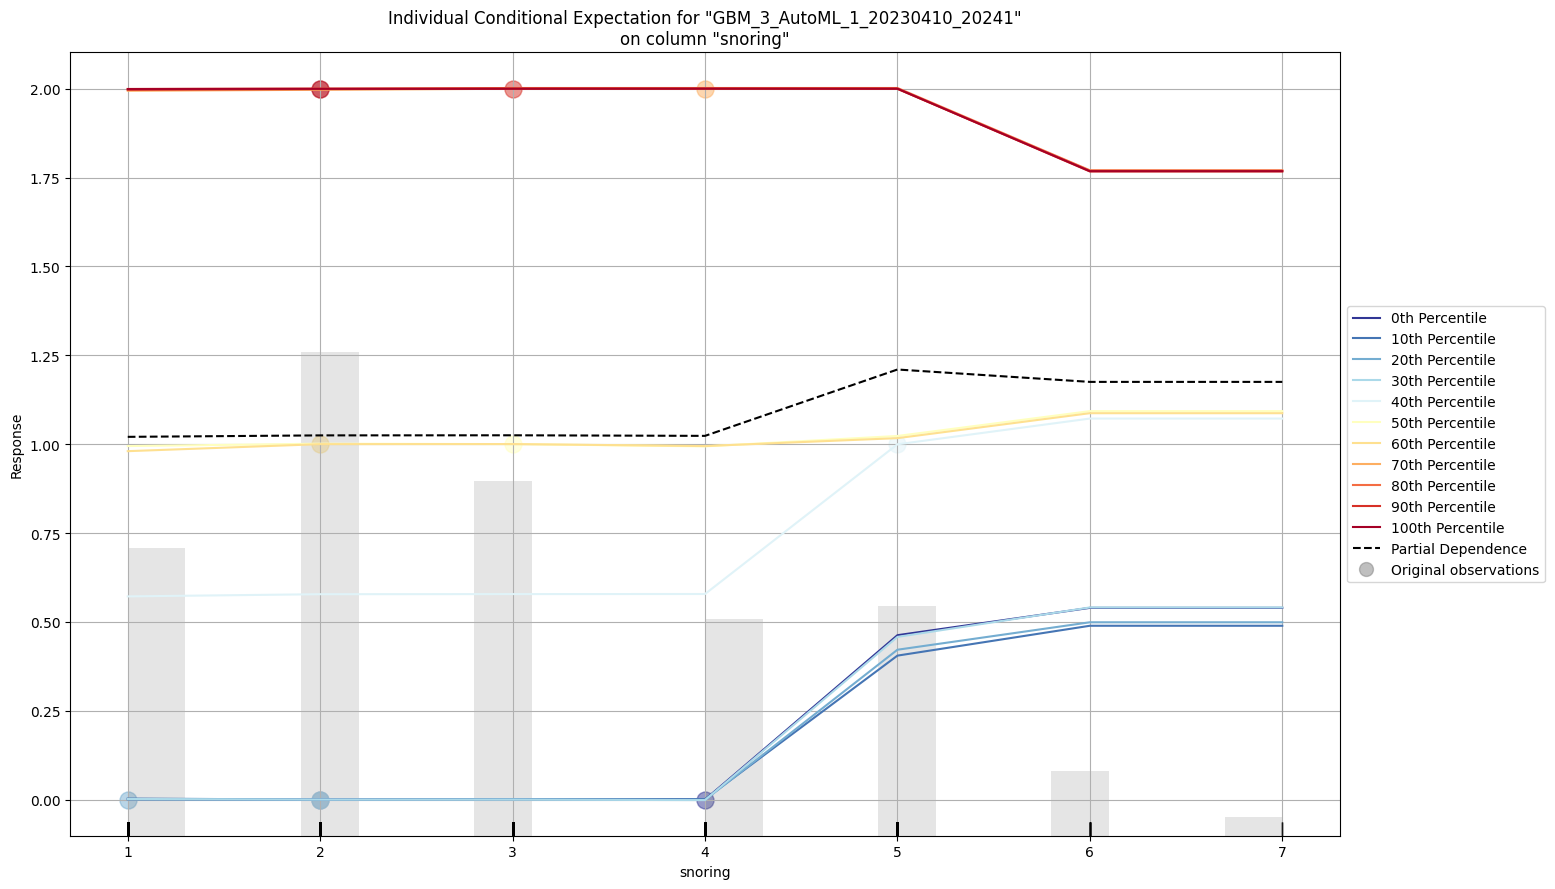

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                       rmse          mse          mae        rmsle    mean_residual_deviance    training_time_ms    predict_time_per_row_ms  algo
------------------------------------------------------  -----------  -----------  -----------  -----------  ------------------------  ------------------  -------------------------  ---------------
XGBoost_3_AutoML_1_20230410_20241                       0.000416312  1.73316e-07  0.000128727  0.000220359               1.73316e-07                 234                   0.005162  XGBoost
XGBoost_2_AutoML_1_20230410_20241                       0.000569721  3.24582e-07  0.000192125  0.00032898                3.24582e-07                 345                   0.005566  XGBoost
StackedEnsemble_AllModels_1_AutoML_1_20230410_20241     0.00069605   4.84486e-07  0.000305937  0.000465424               4.84486e-07                1609                   0.35744   StackedEnsemble
XGBoost_1_AutoML_1_20230410_20241                       0.00126785   1.60745e-06  0.000378062  0.000654332               1.60745e-06                 527                   0.009375  XGBoost
GBM_2_AutoML_1_20230410_20241                           0.00149536   2.2361e-06   0.000293456  0.00115258                2.2361e-06                  961                   0.109476  GBM
GBM_3_AutoML_1_20230410_20241                           0.00152155   2.3151e-06   0.00029133   0.00111935                2.3151e-06                  845                   0.053054  GBM
StackedEnsemble_BestOfFamily_1_AutoML_1_20230410_20241  0.00161337   2.60295e-06  0.00107762   0.00109313                2.60295e-06                1455                   0.126201  StackedEnsemble
GBM_4_AutoML_1_20230410_20241                           0.00166258   2.76418e-06  0.000359797  0.00136195                2.76418e-06                1028                   0.050857  GBM
GBM_1_AutoML_1_20230410_20241                           0.00268369   7.20222e-06  0.00171849   0.00196078                7.20222e-06                4034                   0.222654  GBM
DRF_1_AutoML_1_20230410_20241                           0.00280244   7.85369e-06  0.000269881  0.00140065                7.85369e-06                 154                   0.012543  DRF
XRT_1_AutoML_1_20230410_20241                           0.141214     0.0199413    0.104804     0.0865444                 0.0199413                   219                   0.015795  DRF
GLM_1_AutoML_1_20230410_20241                           0.22131      0.0489782    0.158211     0.165124                  0.0489782                    80                   0.001813  GLM
[12 rows x 9 columns]

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

In [ ]:
automl.explain(data_train)

Next we analyze auto ml's best model after tuning the hyperparameters, and identify and quantify the contribution of each input feature to the final prediction made by the model

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

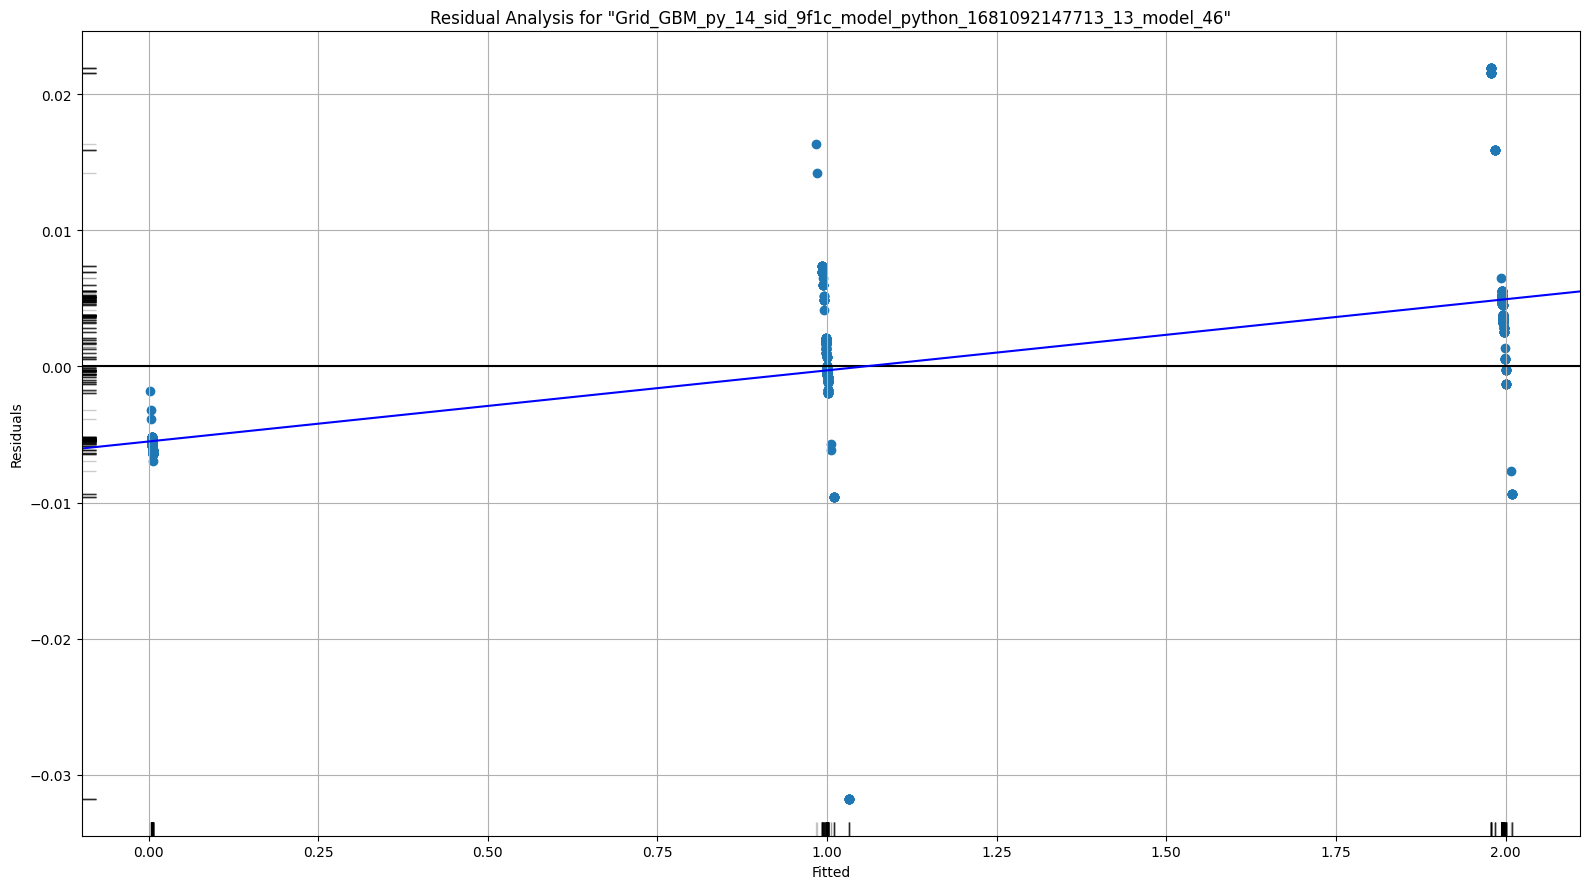

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

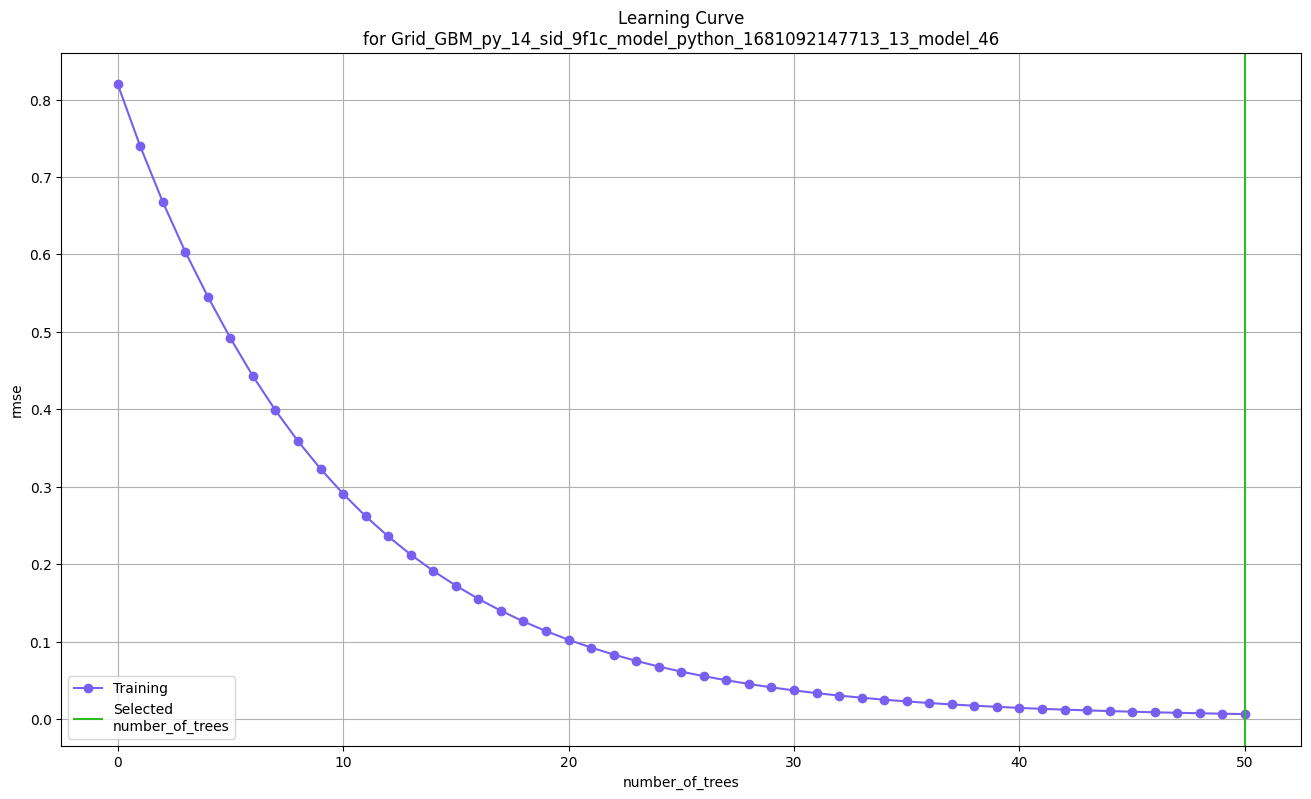

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

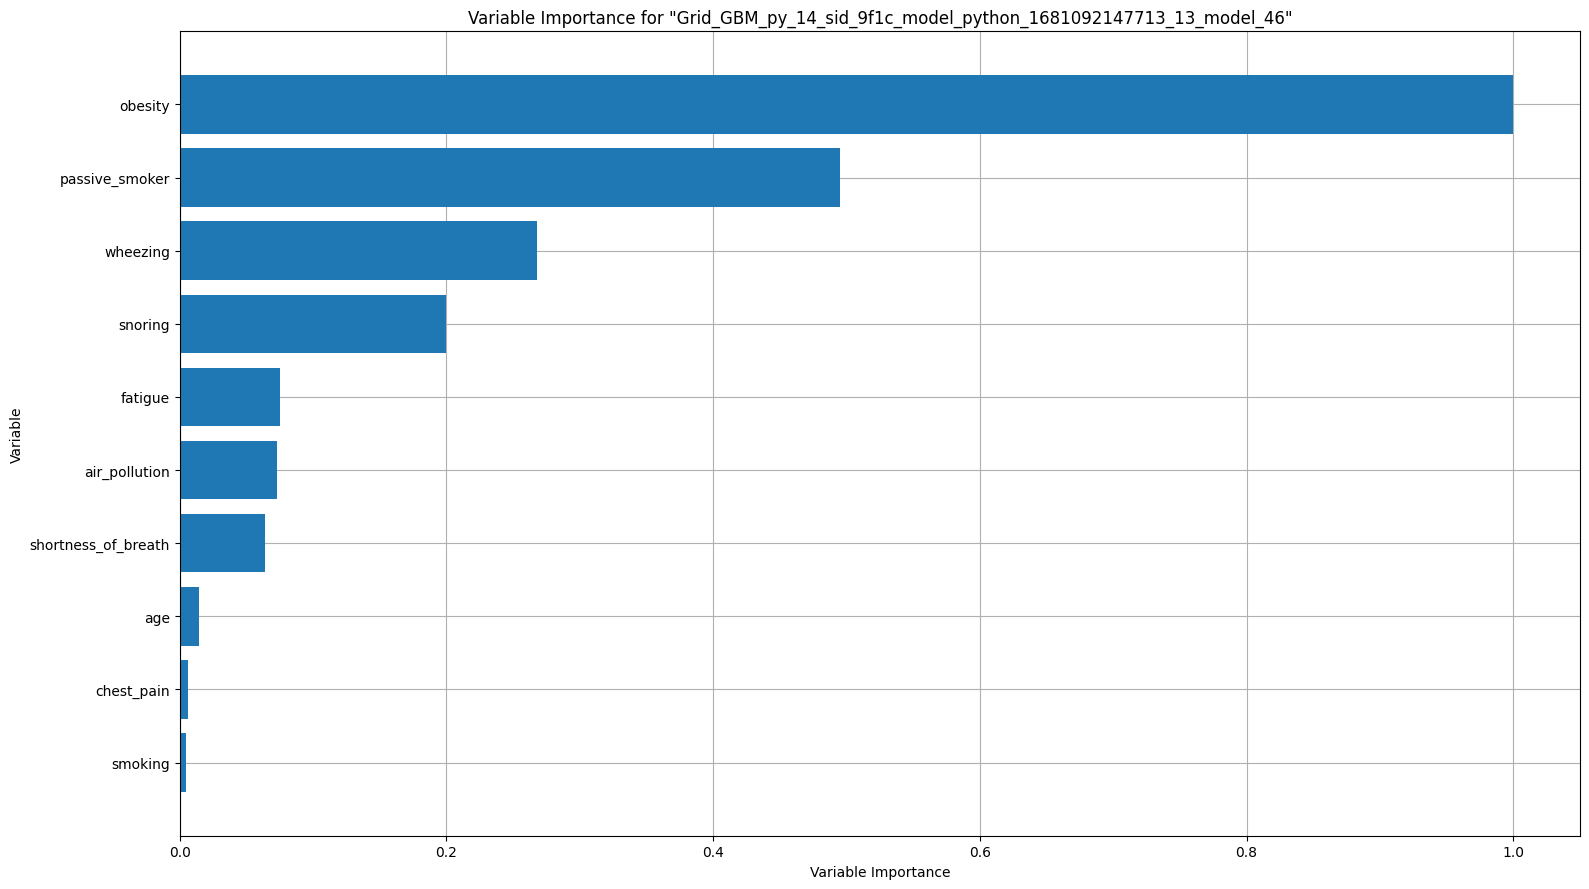

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

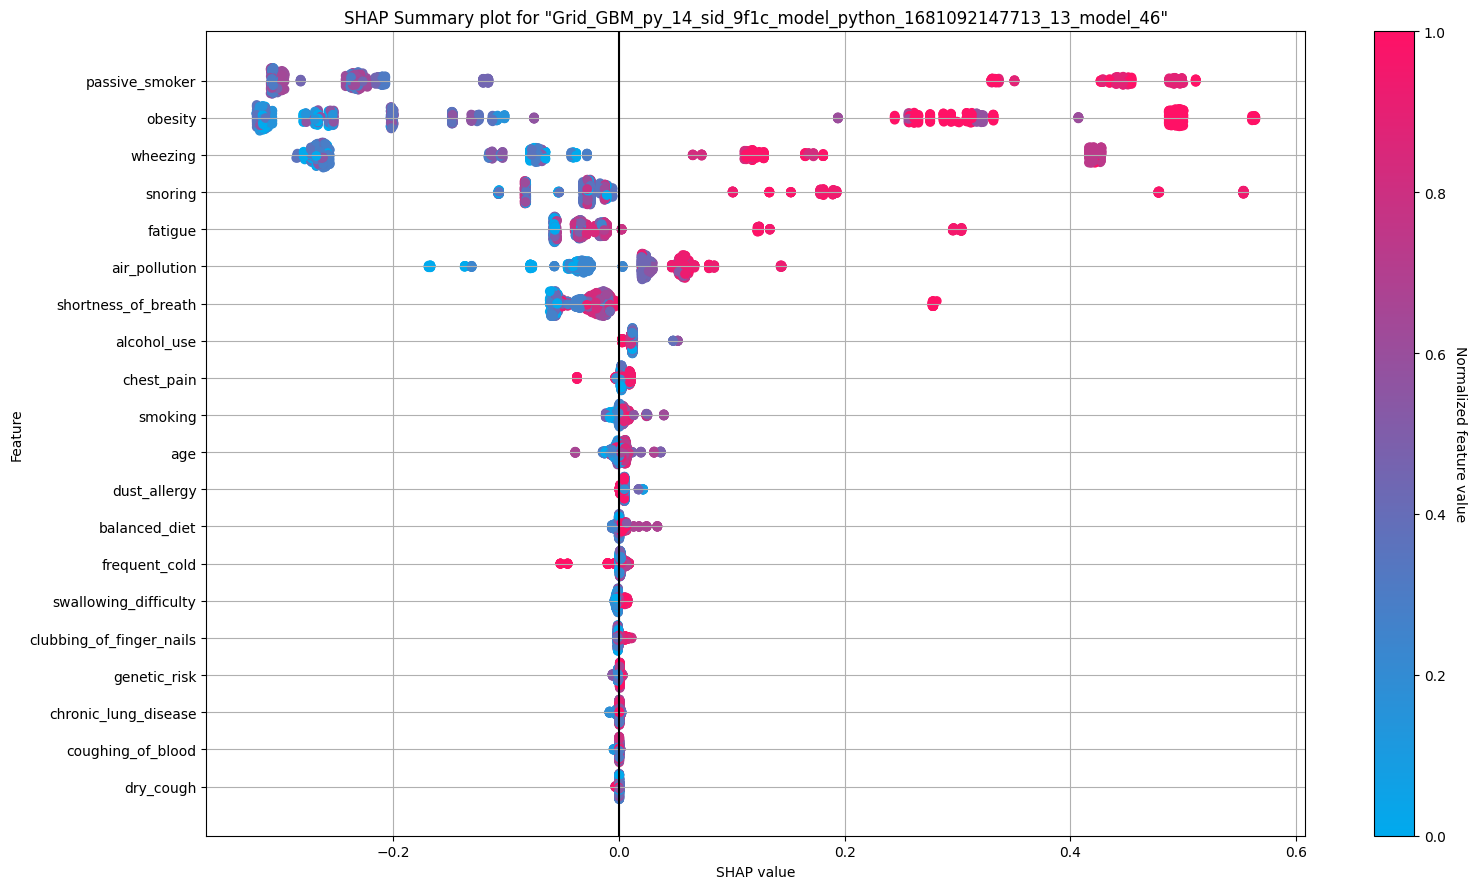

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

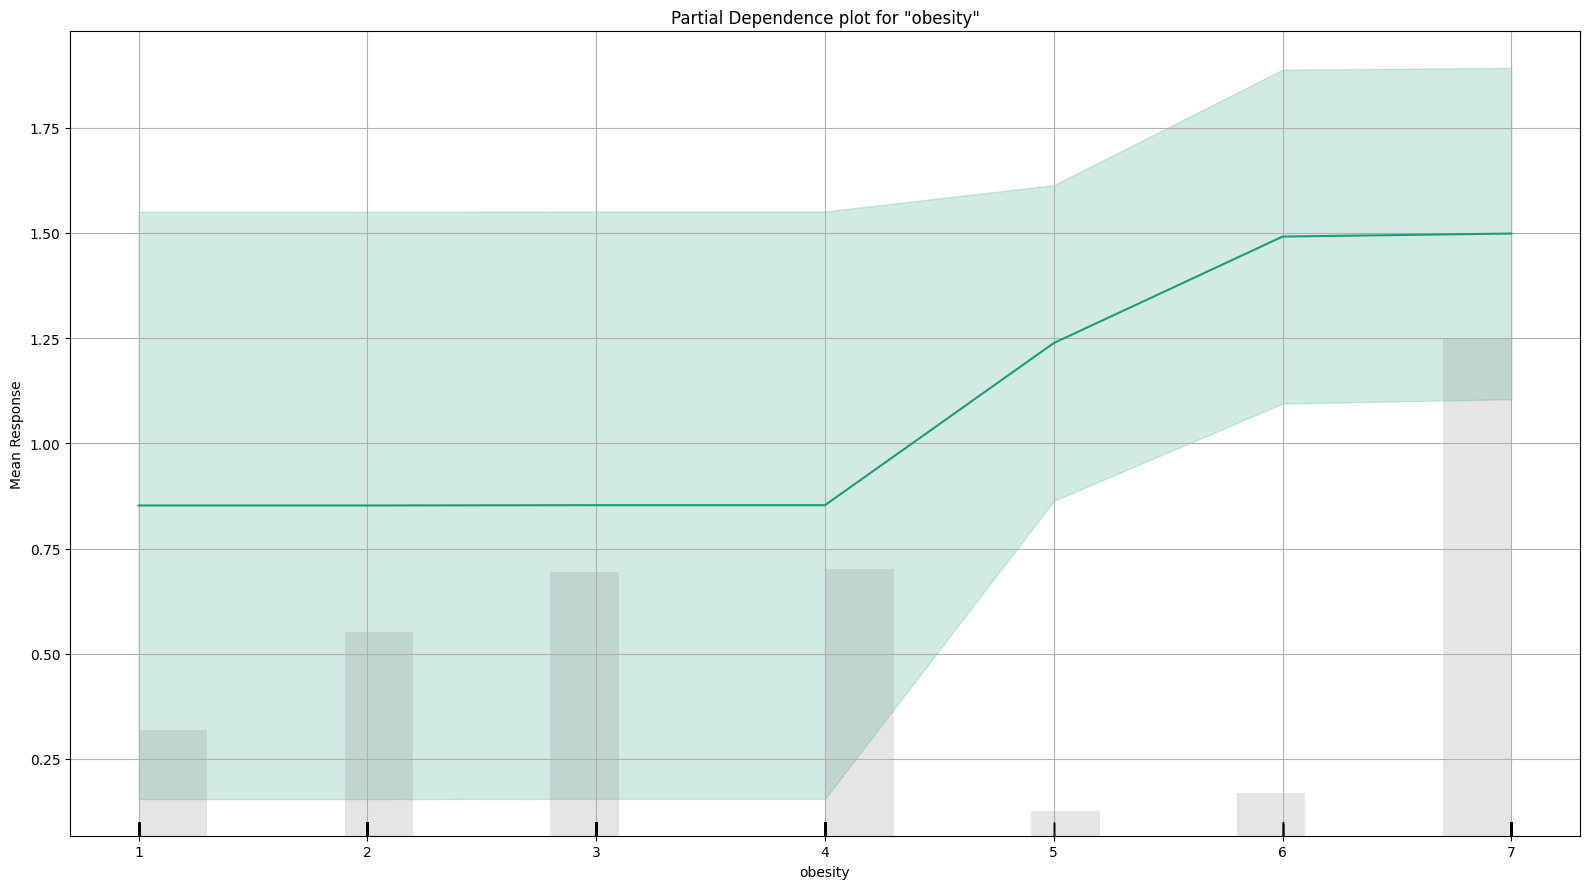

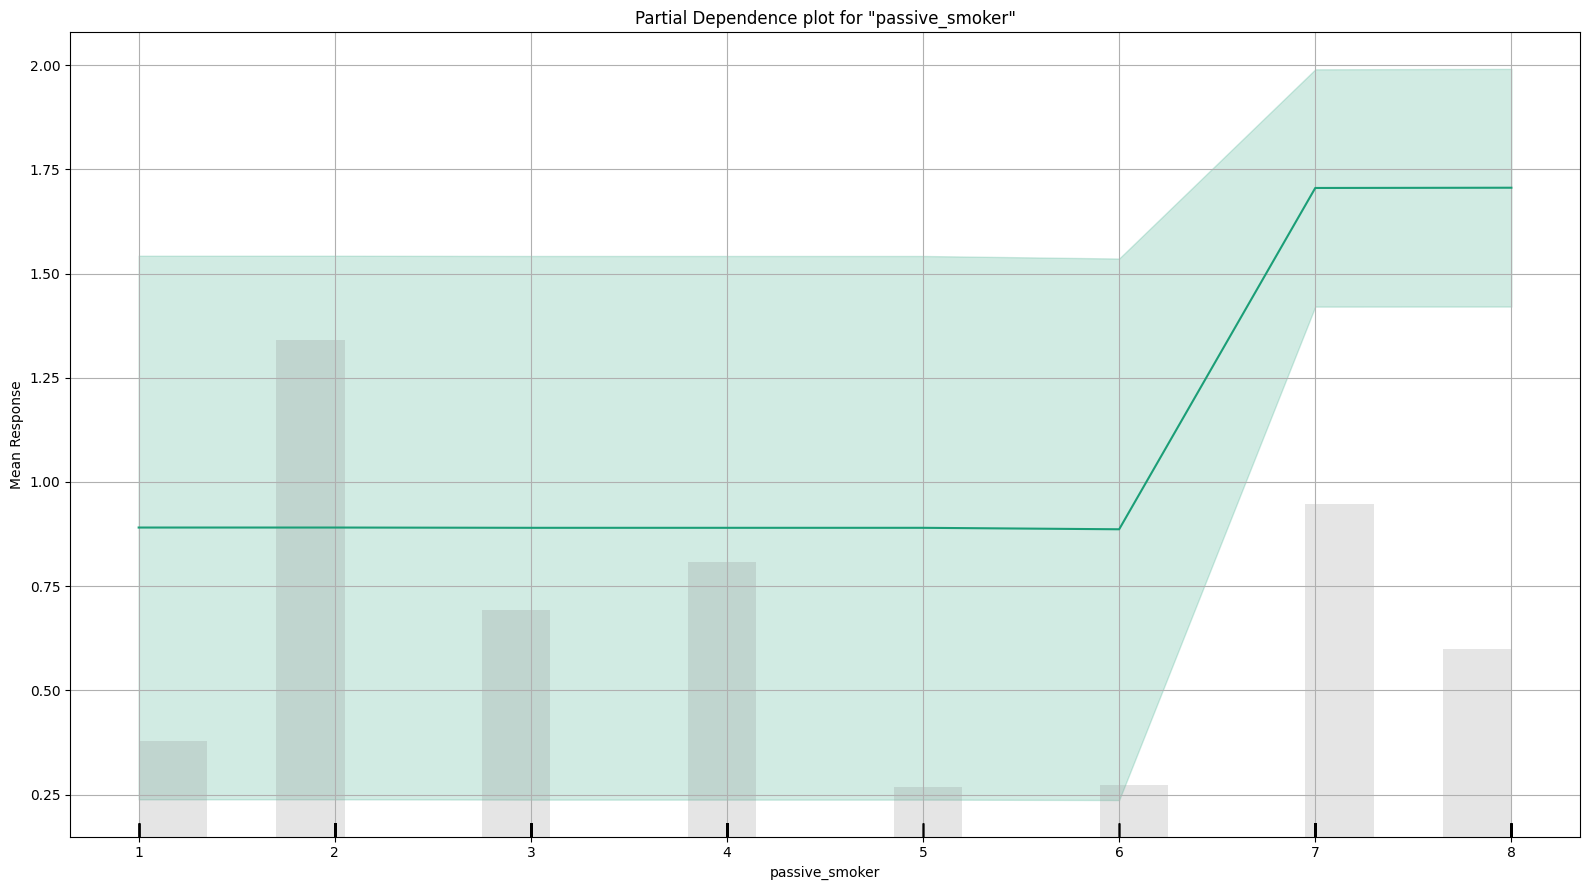

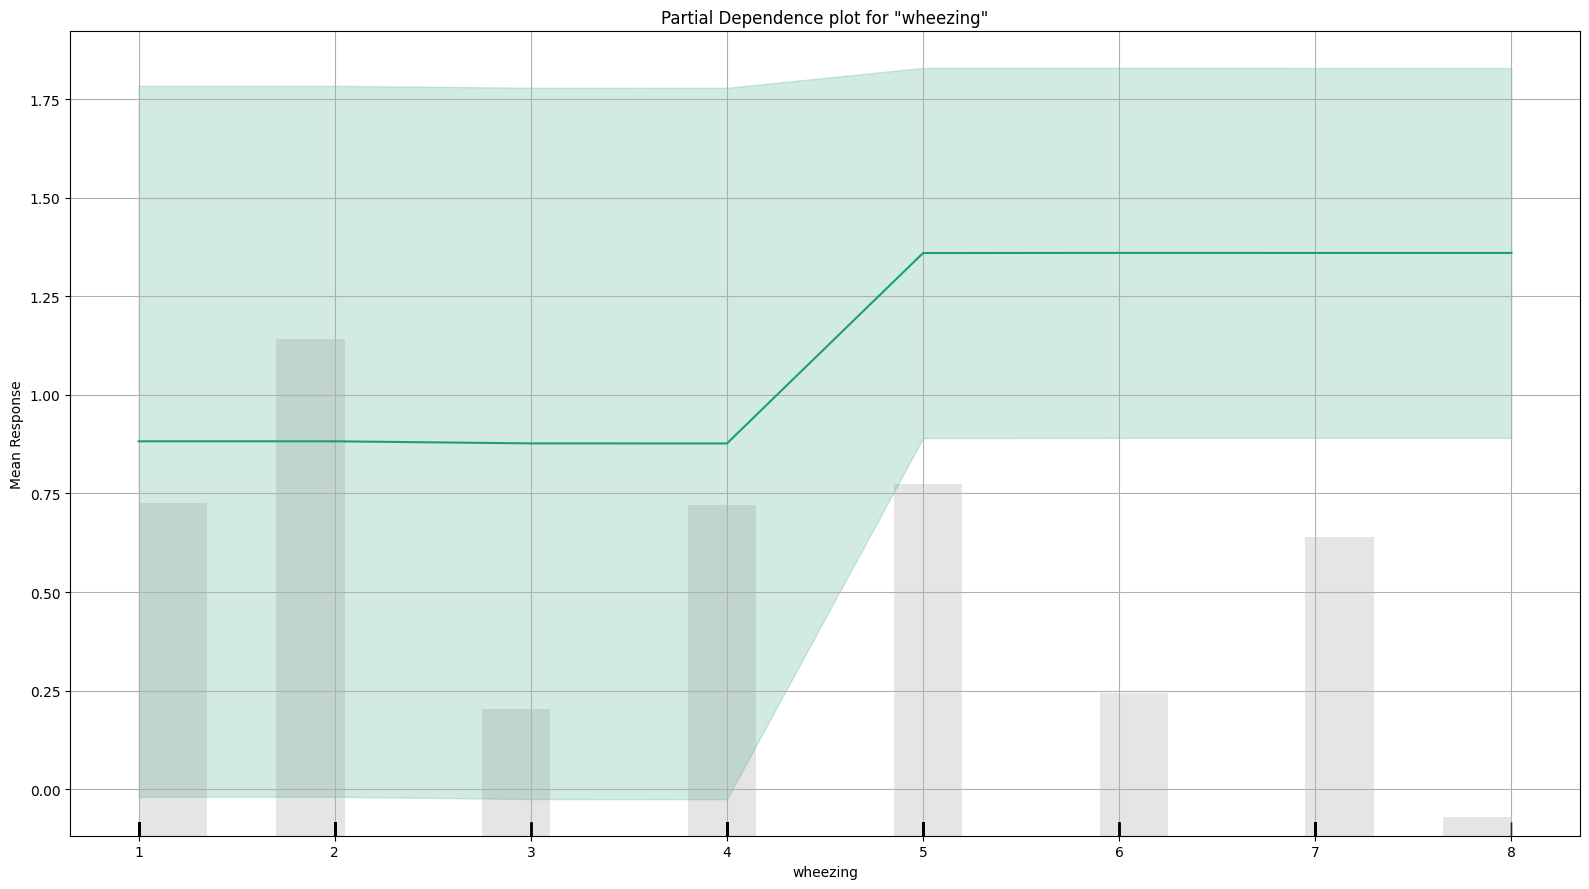

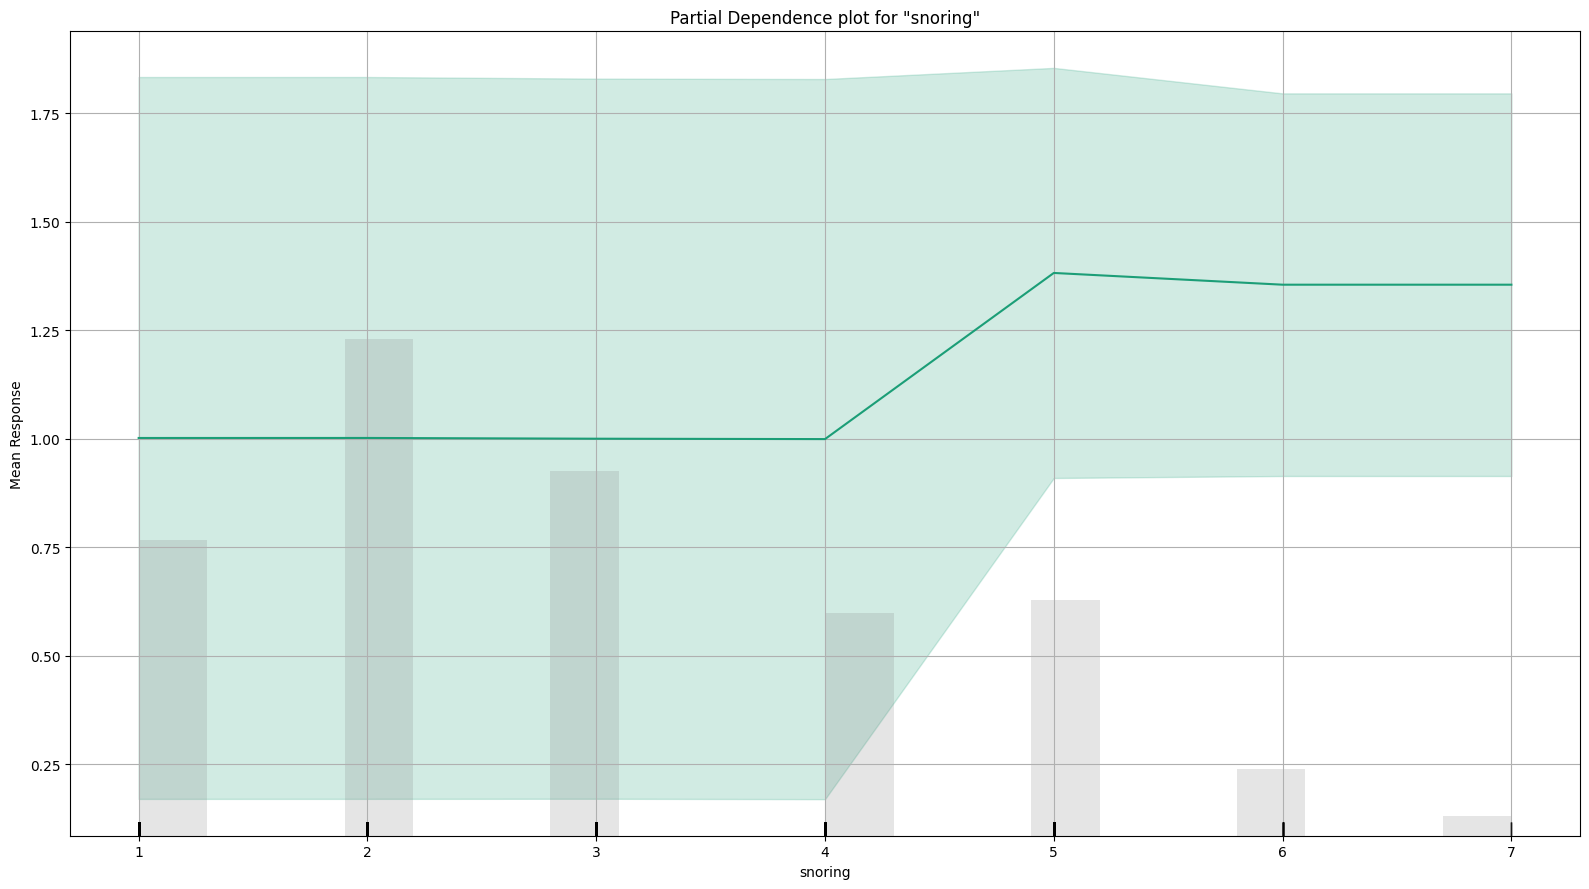

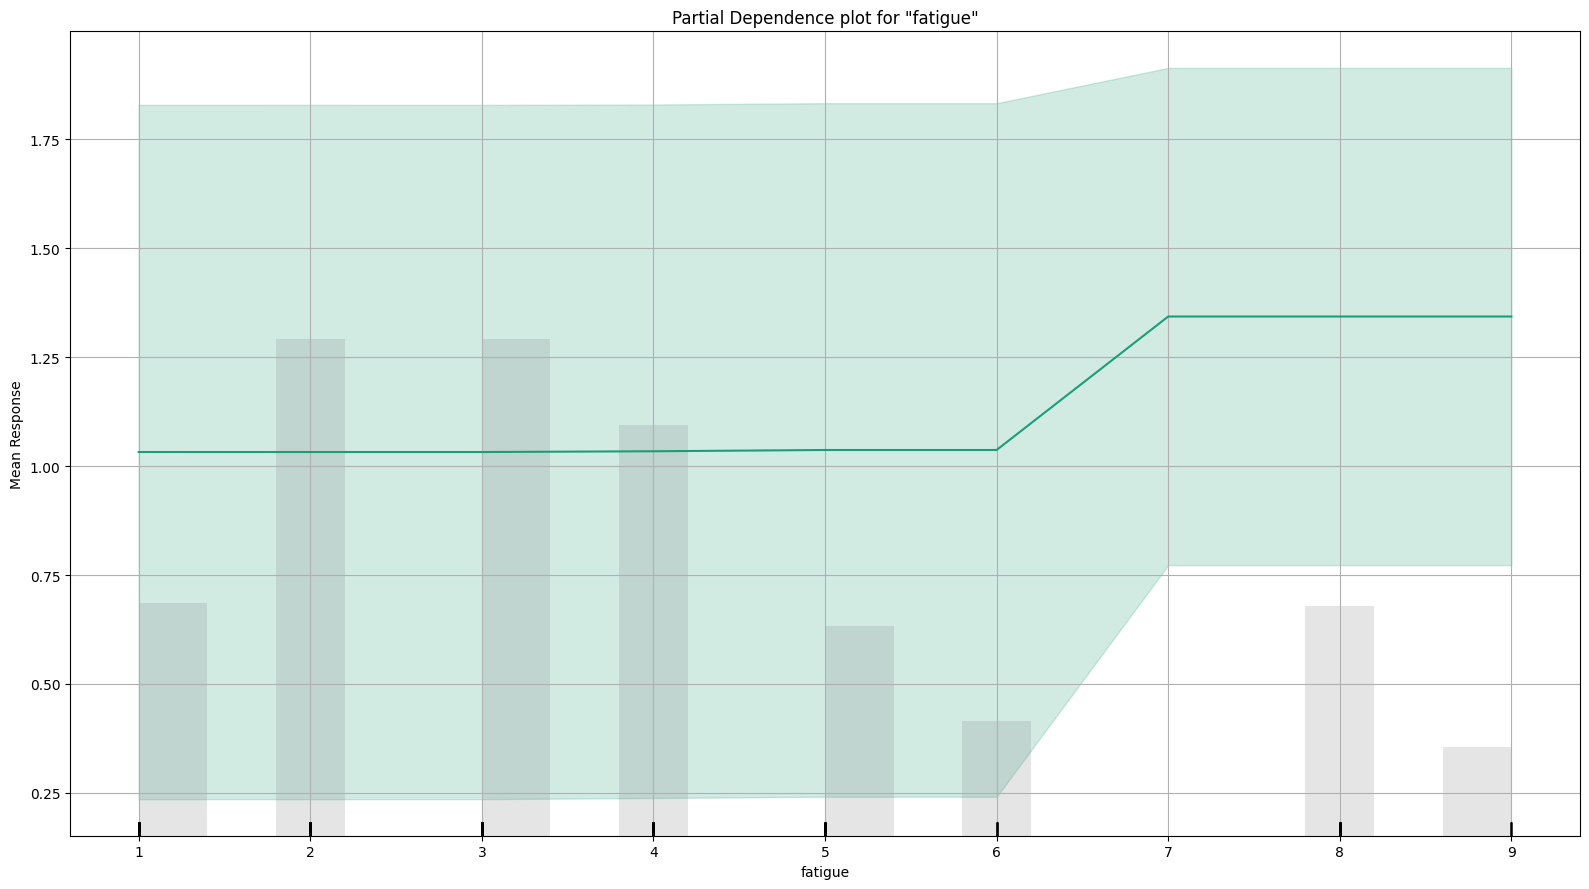

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

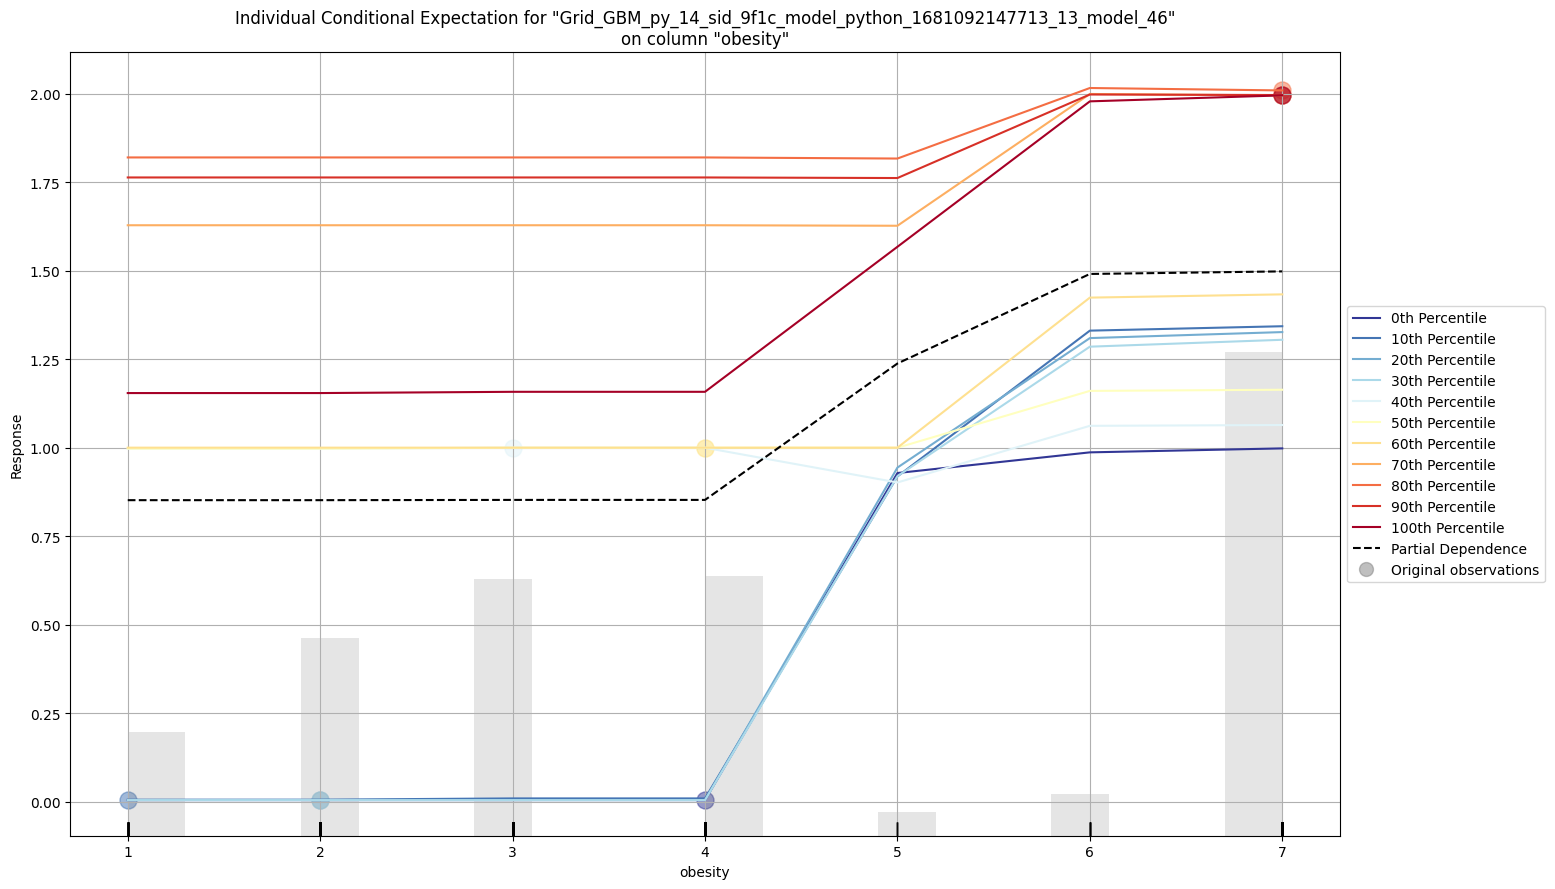

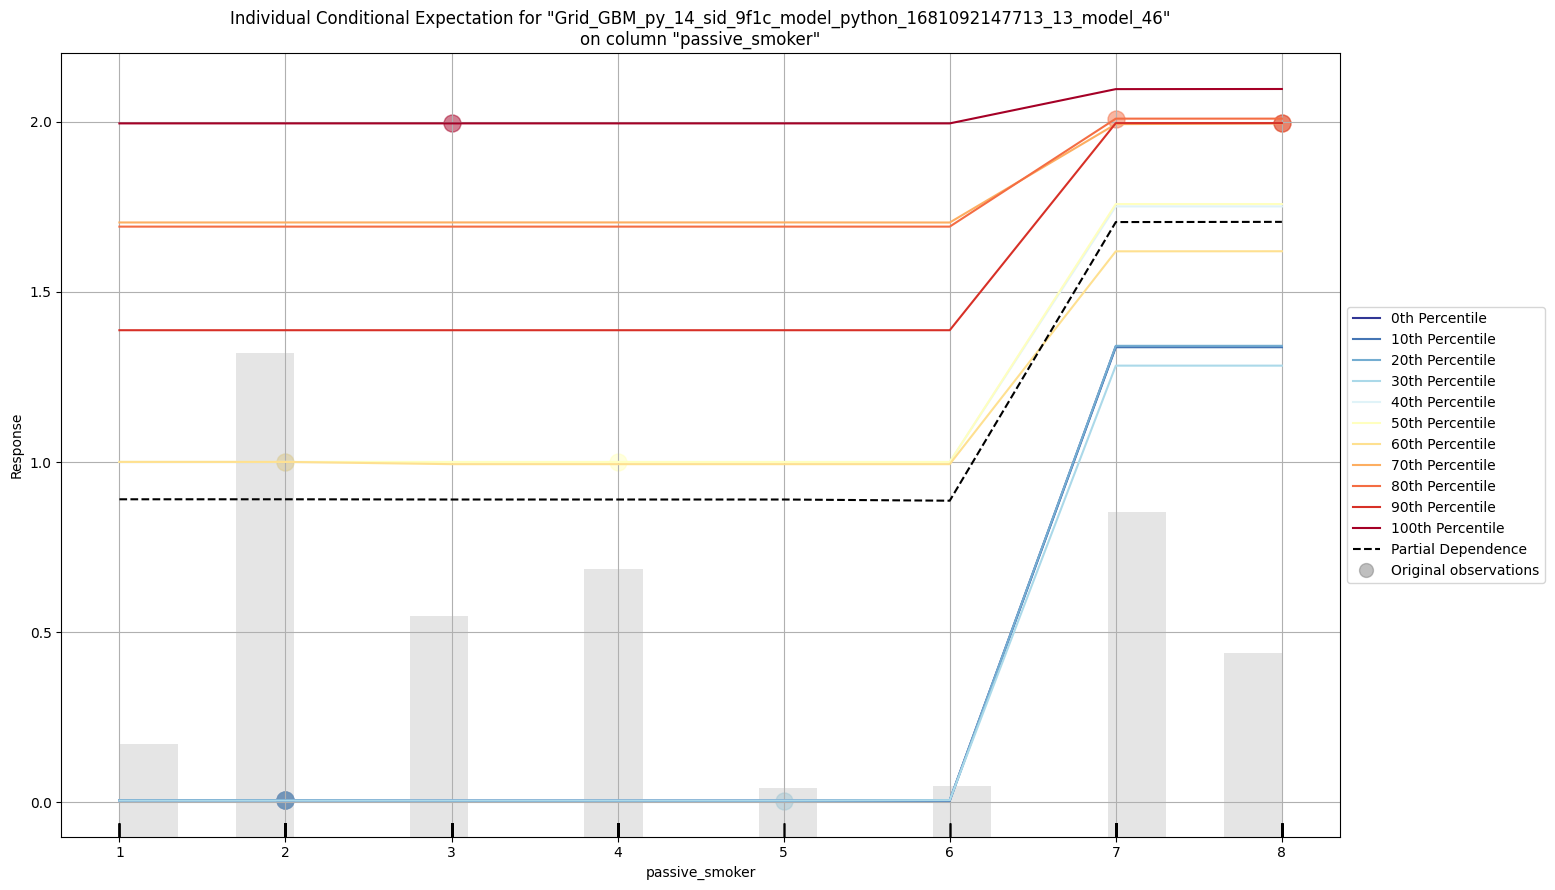

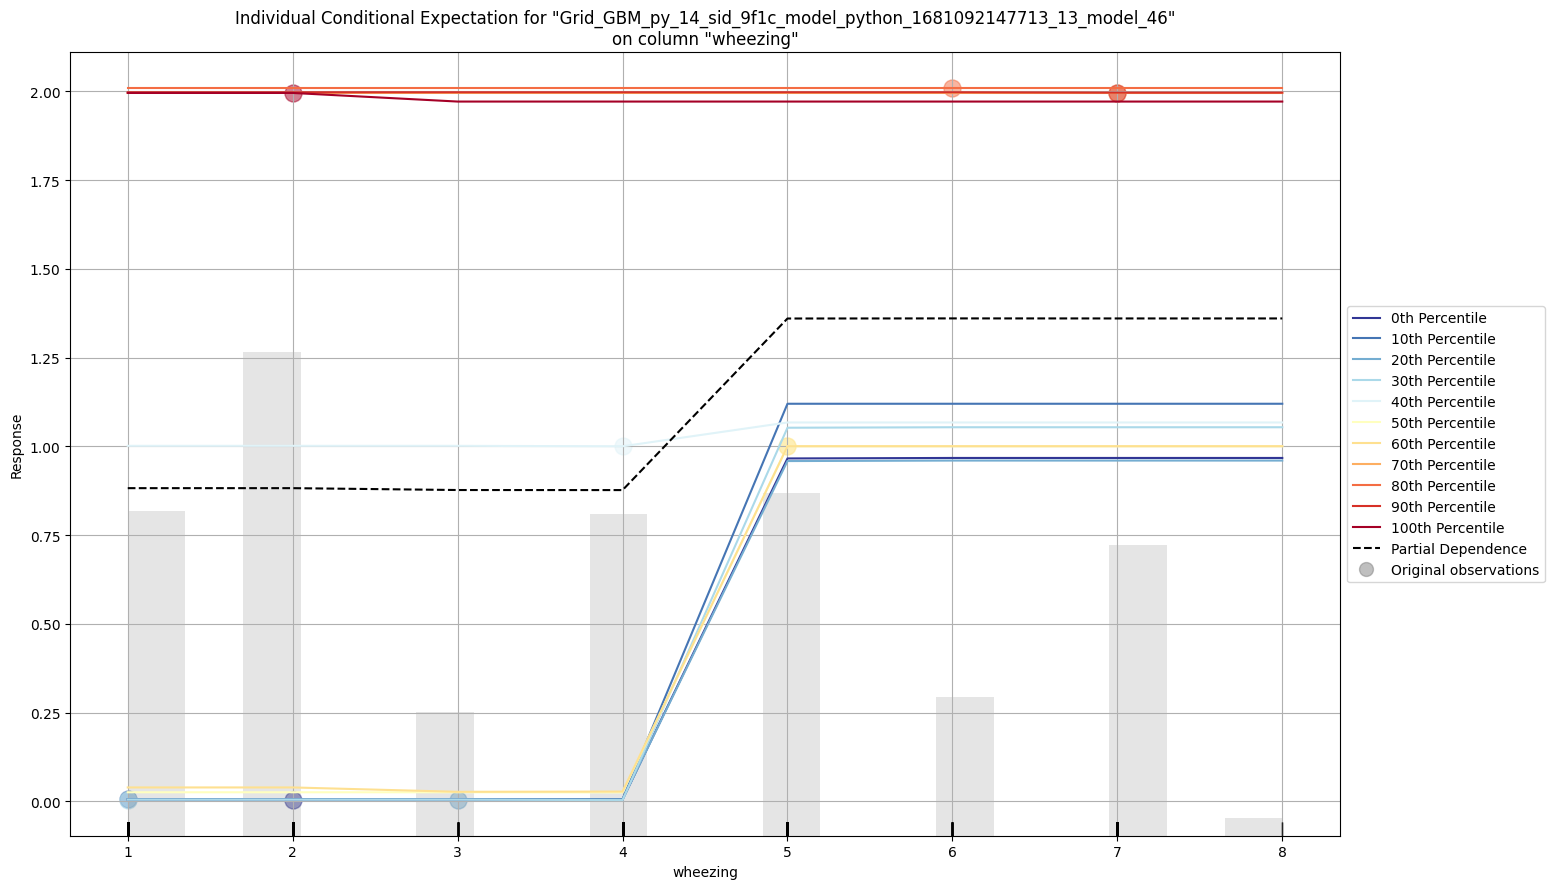

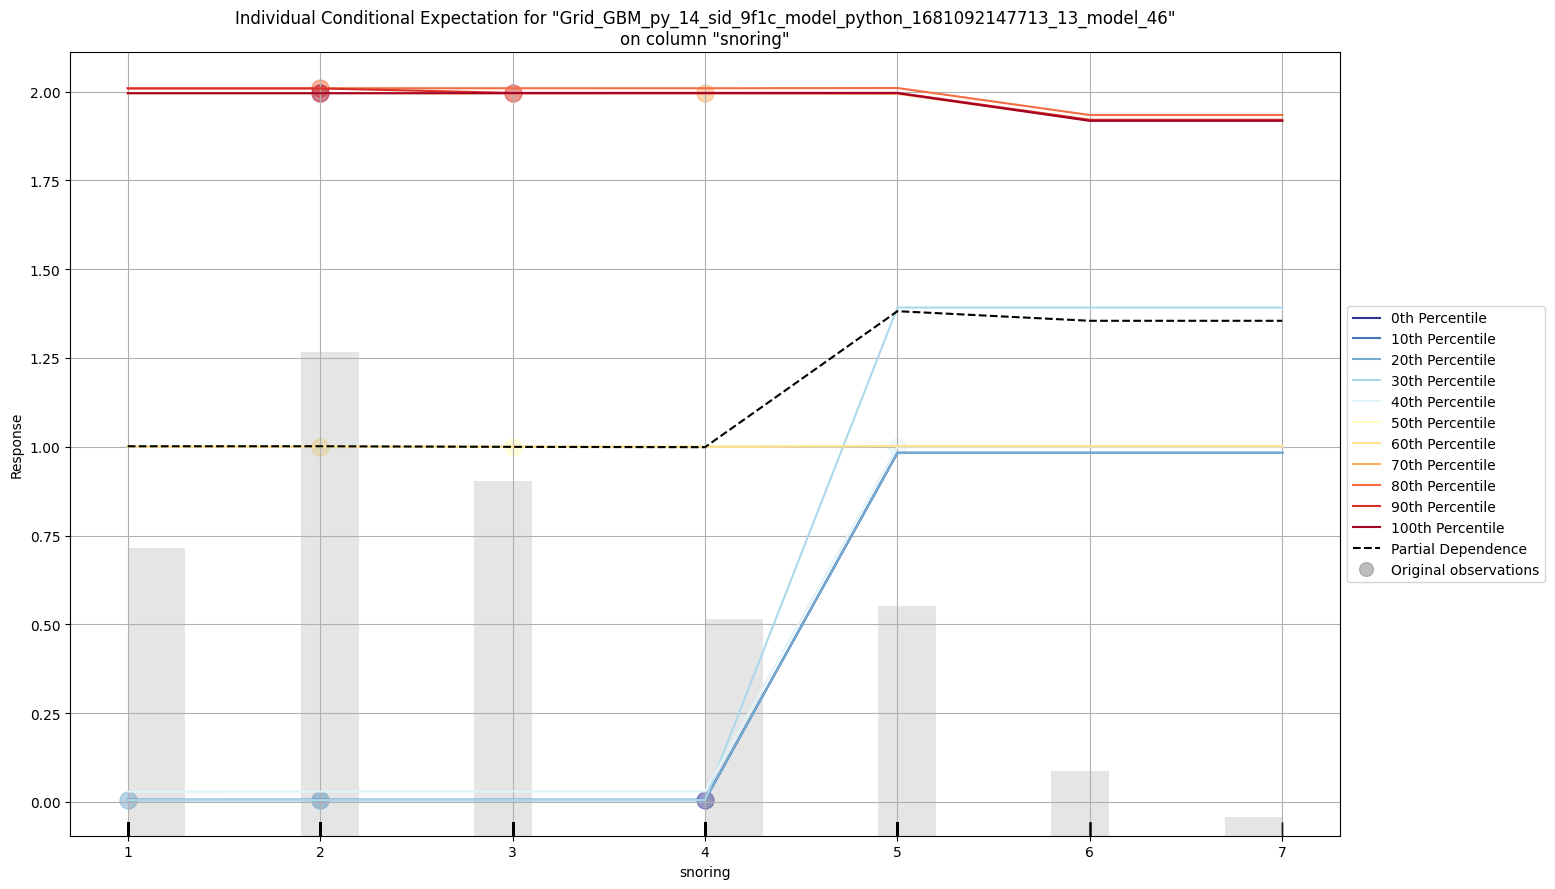

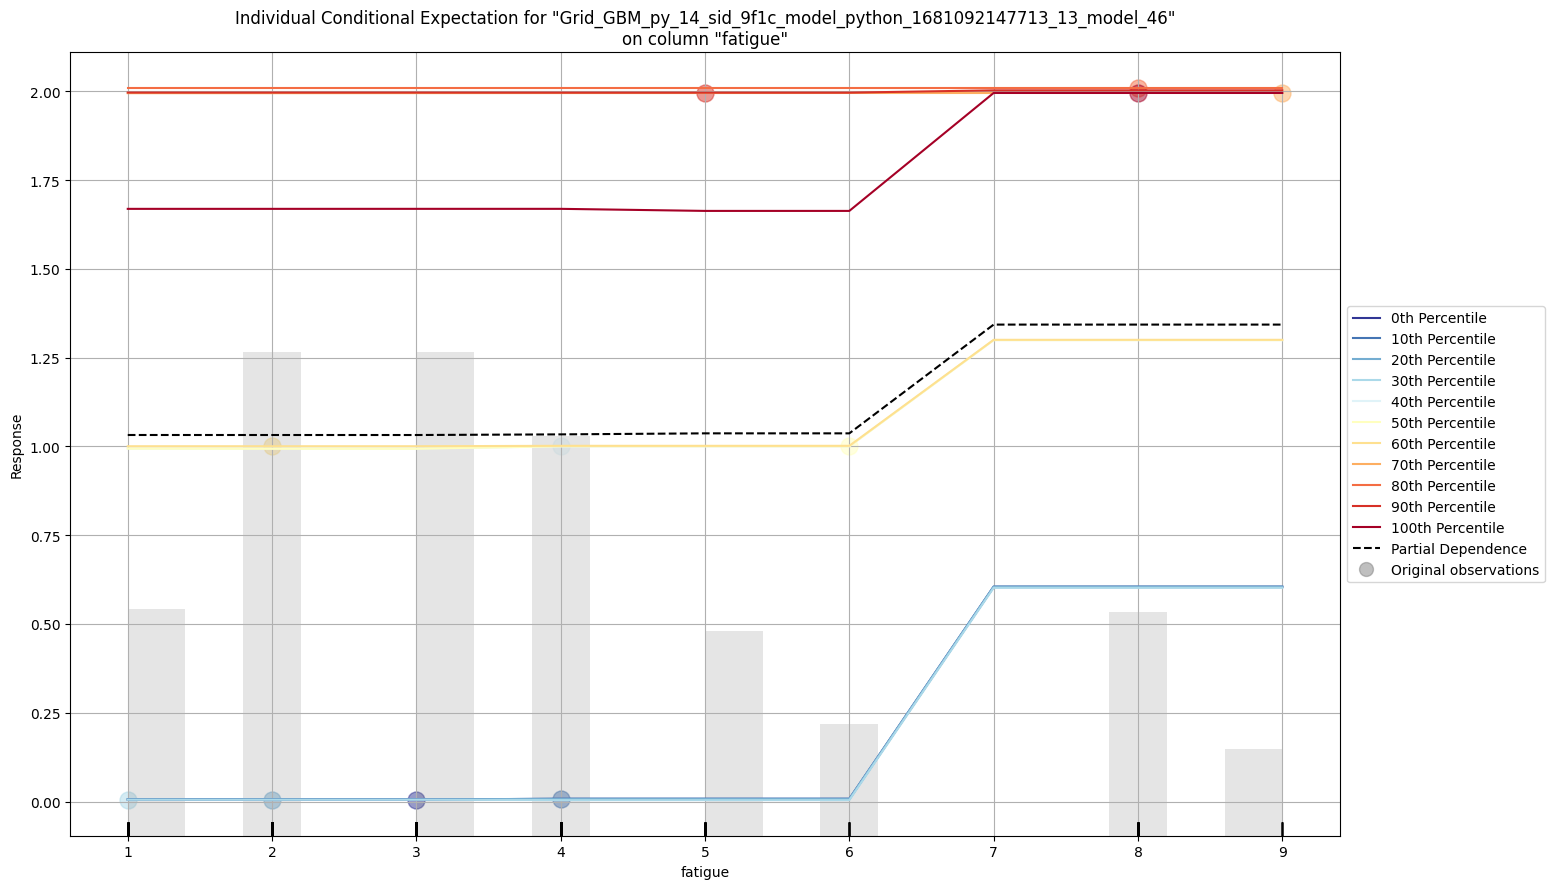

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

In [ ]:
best_gbm.explain(data_train)

# Conclusion

The Random Forest classifier and auto ml's best model with its Hyperparameter's tuned are the top competing models for this task as these show highest accuracy among others. Additionally, we can easily interpret the plots to understand the root of these model's success.

Above we have performed, data preprocessing, exploratory data analysis and further feature engineering. Once this was done we split our data into train-test and fit our training data in a linear, tree based and automl best model. Afterwards, we perfromed hyperparameter tuning on automl's best model to get the most optimized model. Further we identified the best model based on every mode's performance on the test data.

# Learning from this excercise

- Experienced and learned end to end process of a data science project starting from data preprocessing to finalizing model
- Most effort of the project should be invested in data preprocessing, EDA, and feature engineering. These three steps are first step to decide the sucess of any model
- Hyperparamter tuning may help in improving the model and should be considered while finalizing prediction model
- To start with the model selection, one should start with various models from different category and observe which category of model perfroms better then dig further into it

# References    
- https://towardsdatascience.com/feature-selection-using-python-for-classification-problem-b5f00a1c7028
- https://medium.com/@kyawsawhtoon/a-guide-to-knn-imputation-95e2dc496e
- https://towardsdatascience.com/automated-machine-learning-with-h2o-258a2f3a203f
- https://www.analyticsvidhya.com/blog/2016/01/ridge-lasso-regression-python-complete-tutorial/
- https://towardsdatascience.com/interpreting-coefficients-in-linear-and-logistic-regression-6ddf1295f6f1
- https://medium.com/@hjhuney/implementing-a-random-forest-classification-model-in-python-583891c99652
- https://towardsdatascience.com/how-to-visualize-a-decision-tree-from-a-random-forest-in-python-using-scikit-learn-38ad2d75f21c
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html